# Wine Score Prediction | Wine Recommender

***

# Notebook 2: EDA
**Steps to exploratory data analysis.**

&nbsp;

**By: Annika Scholl**

**BrainStation Data Science**

After cleaning the data in Notebook *1_Loading_and_Cleaning*, this notebook is performing a exploratory data analysis (EDA). This will be split into the exploration of categorical data and numerical data and some advanced EDA.

***

## Notebook Contents

1. [**Loading Data**](#b1)<br>

2. [**Exploratory Data Analysis**](#b2)<br>
    2.1 [Categorical Data](#b2.1)<br>
    2.2 [Numerical Data](#b2.2)<br>
    
3. [**Advanced EDA**](#b3)<br>

4. [**EDA Summary**](#b4)<br>
        
5. [**Conclusion**](#b5)<br>

***

In [84]:
# import libraries
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns



In [53]:
# Figure settings matplotlib
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams["figure.dpi"] = 300

In [82]:
# Figure settings plotly
px.defaults.width = 800
px.defaults.height = 600
px.defaults.template = "plotly_dark"

# Loading Data <a id="b1"></a>

In [2]:
# Read data
df = pd.read_csv(f'data/data_clean.csv', index_col=0)

In [3]:
# Dimension of the dataframe
df.shape

(45776, 21)

In [4]:
# Get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45776 entries, 1101361_1992 to 99974_1997
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_id               45776 non-null  int64  
 1   wine_name             45776 non-null  object 
 2   winery                45776 non-null  object 
 3   year                  45776 non-null  int64  
 4   country               45776 non-null  object 
 5   region                45776 non-null  object 
 6   avg_rating_wine       45776 non-null  float64
 7   num_rating_wine       45776 non-null  int64  
 8   avg_rating_wine_year  45776 non-null  float64
 9   num_rating_wine_year  45776 non-null  int64  
 10  price                 45776 non-null  float64
 11  url                   45776 non-null  object 
 12  volume                45776 non-null  int64  
 13  currency              45776 non-null  object 
 14  body                  45776 non-null  float64
 15  taste_in

In [5]:
df.head()

wine_id                         wine_name  \
index                                                     
1101361_1992  1101361       Les Poyeux Saumur Champigny   
1186041_1959  1186041   Clos de Tart Grand Cru Monopole   
1099538_1929  1099538                           Pomerol   
79235_1993      79235                     Vosne-Romanée   
87560_1999      87560  La Pialade  Côtes du Rhône Rouge   

                                winery  year country                  region  \
index                                                                          
1101361_1992             Clos Rougeard  1992  France        Saumur-Champigny   
1186041_1959   Domaine du Clos de Tart  1959  France  Clos de Tart Grand Cru   
1099538_1929  Château Latour à Pomerol  1929  France                 Pomerol   
79235_1993                 Méo-Camuzet  1993  France           Vosne-Romanée   
87560_1999               Château Rayas  1999  France          Côtes-du-Rhône   

              avg_rating_wine  num_rating_wine  avg_rating_wine_year  \
index                                                                  
1101361_1992              4.5             2219                   4.5   
1186041_1959              4.5             5408                   4.5   
1099538_1929              4.3             7005                   4.3   
79235_1993                4.3             2665                   4.3   
87560_1999                4.2             1896                   4.2   

              num_rating_wine_year  ...  \
index                               ...   
1101361_1992                  2219  ...   
1186041_1959                  5408  ...   
1099538_1929                  7005  ...   
79235_1993                    2665  ...   
87560_1999                    1896  ...   

                                                            url volume  \
index                                                                    
1101361_1992  https://www.sodivin.com/clos-rougeard/10184-cl...   1500   
1186041_1959  https://www.sodivin.com/mommessin/8711-mommess...    750   
1099538_1929  https://www.sodivin.com/latour-a-pomerol/8760-...    750   
79235_1993    https://www.sodivin.com/meo-camuzet-domaine/12...    750   
87560_1999    https://www.sodivin.com/rayas/8011-rayas-rouge...    750   

              currency body  taste_intensity  taste_tannin  taste_sweetness  \
index                                                                         
1101361_1992       GBP  3.0         3.250090      3.475009         2.186149   
1186041_1959       GBP  3.0         3.094230      2.708399         1.796174   
1099538_1929       GBP  4.0         4.124983      3.436851         1.677245   
79235_1993         GBP  3.0         2.965793      2.549722         1.676296   
87560_1999         GBP  4.0         3.151294      2.824329         1.805076   

              taste_acidity  taste_fizziness  \
index                                          
1101361_1992       3.935772              0.0   
1186041_1959       4.161411              0.0   
1099538_1929       3.367577              0.0   
79235_1993         4.049462              0.0   
87560_1999         3.473748              0.0   

                                                    description  
index                                                            
1101361_1992                                            unknown  
1186041_1959                                            unknown  
1099538_1929  Bordeaux Pomerol wines are rich, decadent reds...  
79235_1993                                              unknown  
87560_1999    The Southern Rhône is situated in a large, spr...  

[5 rows x 21 columns]

***

# Exploratory Data Analysis <a id="b2"></a>

## Categorical Data <a id="b2.1"></a>

In [6]:
cat_df = df.select_dtypes('object').copy()

In [7]:
cat_df.head()

wine_name                    winery  \
index                                                                      
1101361_1992       Les Poyeux Saumur Champigny             Clos Rougeard   
1186041_1959   Clos de Tart Grand Cru Monopole   Domaine du Clos de Tart   
1099538_1929                           Pomerol  Château Latour à Pomerol   
79235_1993                       Vosne-Romanée               Méo-Camuzet   
87560_1999    La Pialade  Côtes du Rhône Rouge             Château Rayas   

             country                  region  \
index                                          
1101361_1992  France        Saumur-Champigny   
1186041_1959  France  Clos de Tart Grand Cru   
1099538_1929  France                 Pomerol   
79235_1993    France           Vosne-Romanée   
87560_1999    France          Côtes-du-Rhône   

                                                            url currency  \
index                                                                      
1101361_1992  https://www.sodivin.com/clos-rougeard/10184-cl...      GBP   
1186041_1959  https://www.sodivin.com/mommessin/8711-mommess...      GBP   
1099538_1929  https://www.sodivin.com/latour-a-pomerol/8760-...      GBP   
79235_1993    https://www.sodivin.com/meo-camuzet-domaine/12...      GBP   
87560_1999    https://www.sodivin.com/rayas/8011-rayas-rouge...      GBP   

                                                    description  
index                                                            
1101361_1992                                            unknown  
1186041_1959                                            unknown  
1099538_1929  Bordeaux Pomerol wines are rich, decadent reds...  
79235_1993                                              unknown  
87560_1999    The Southern Rhône is situated in a large, spr...

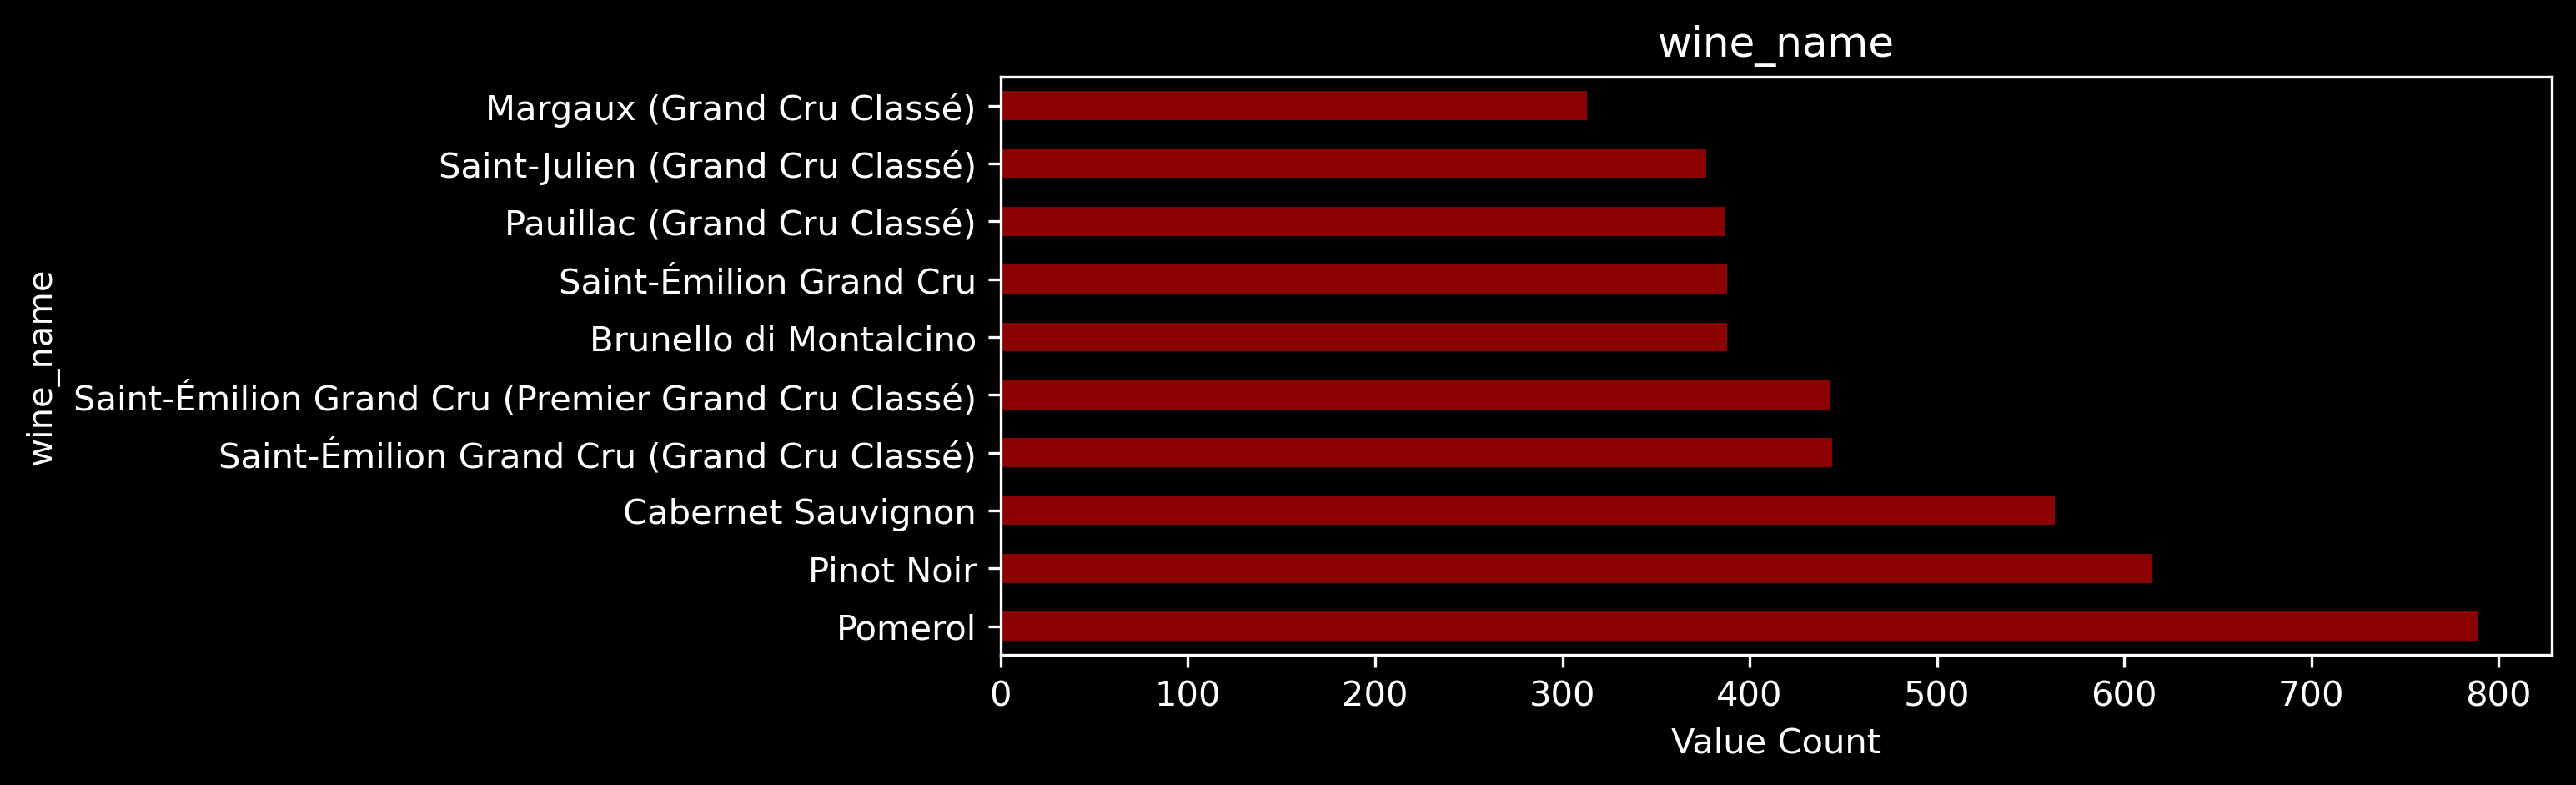

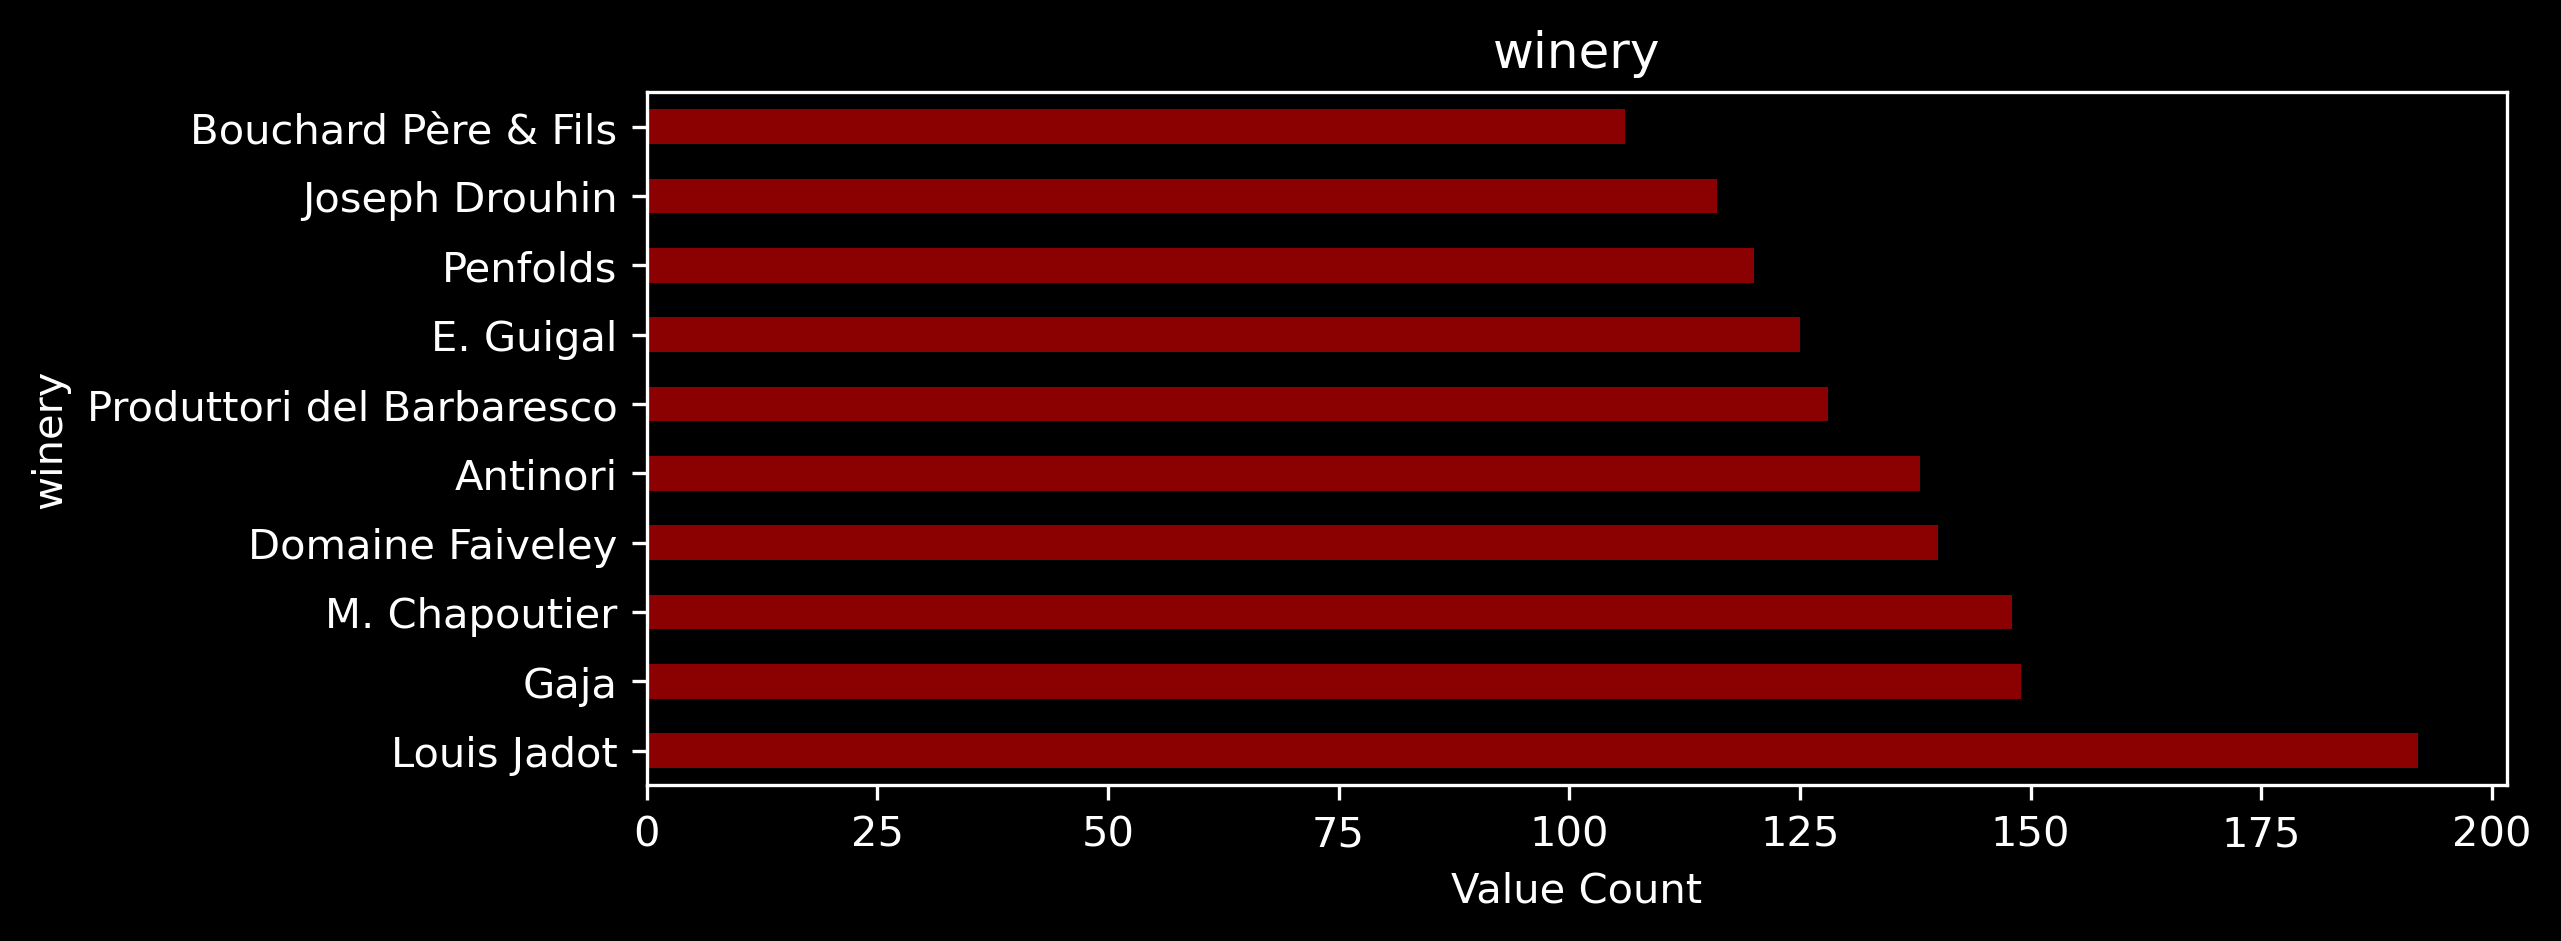

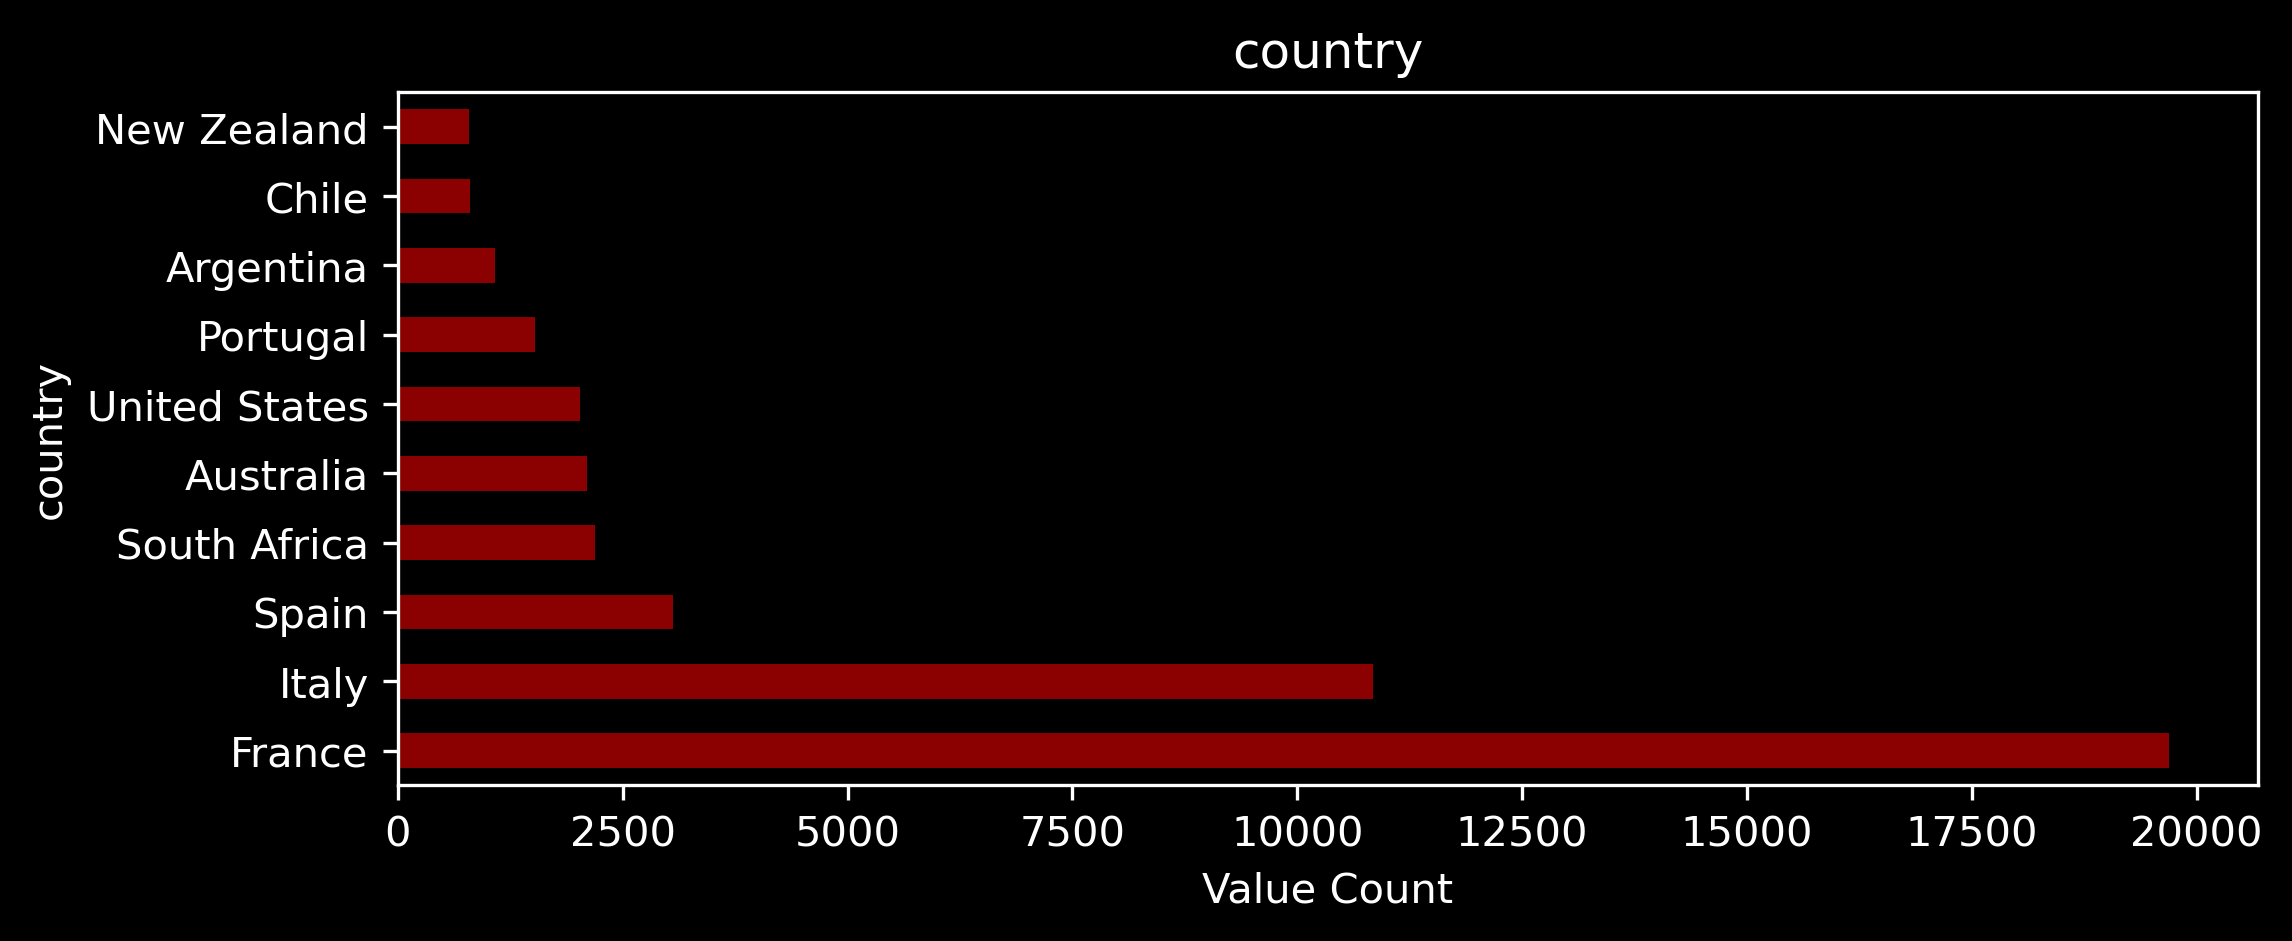

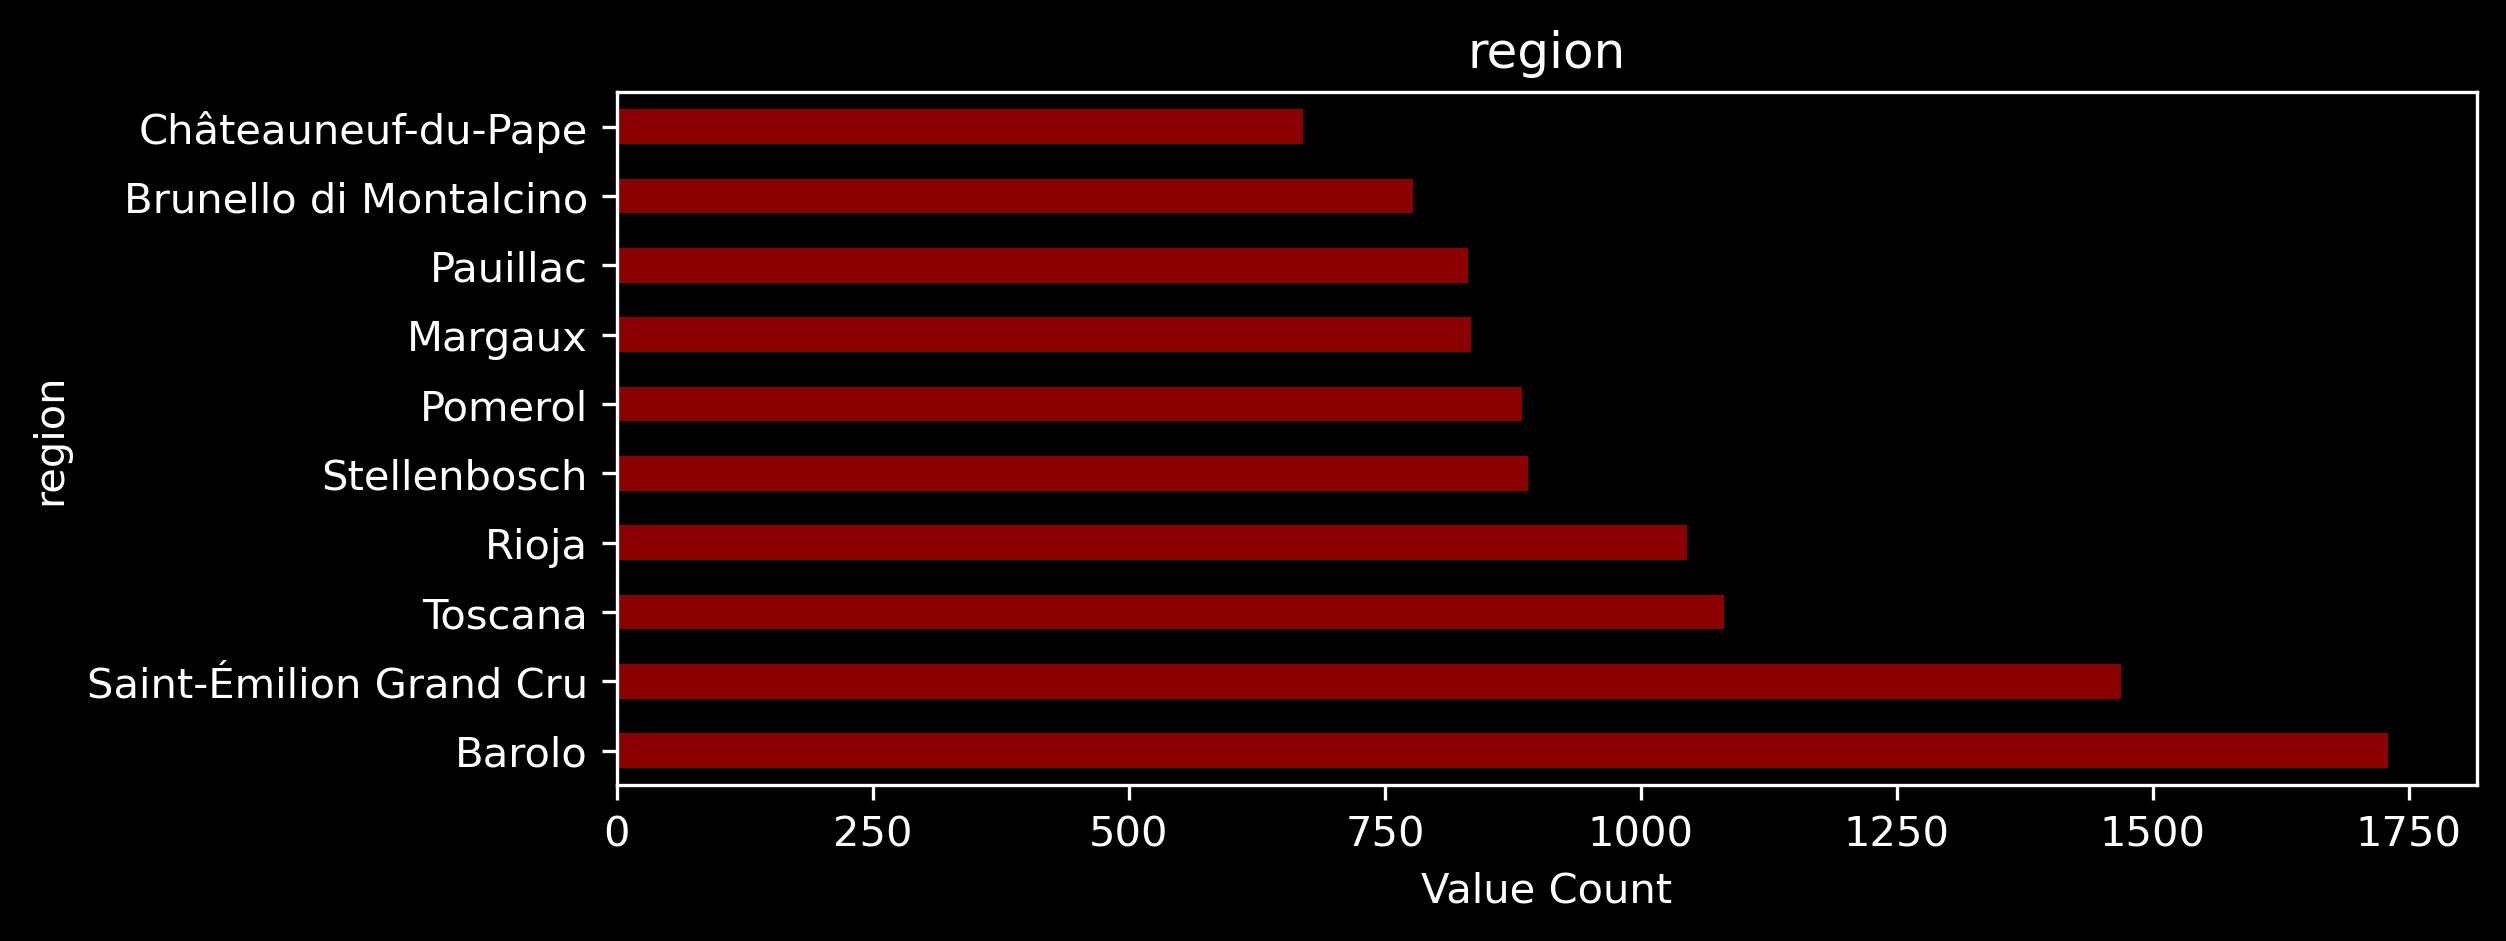

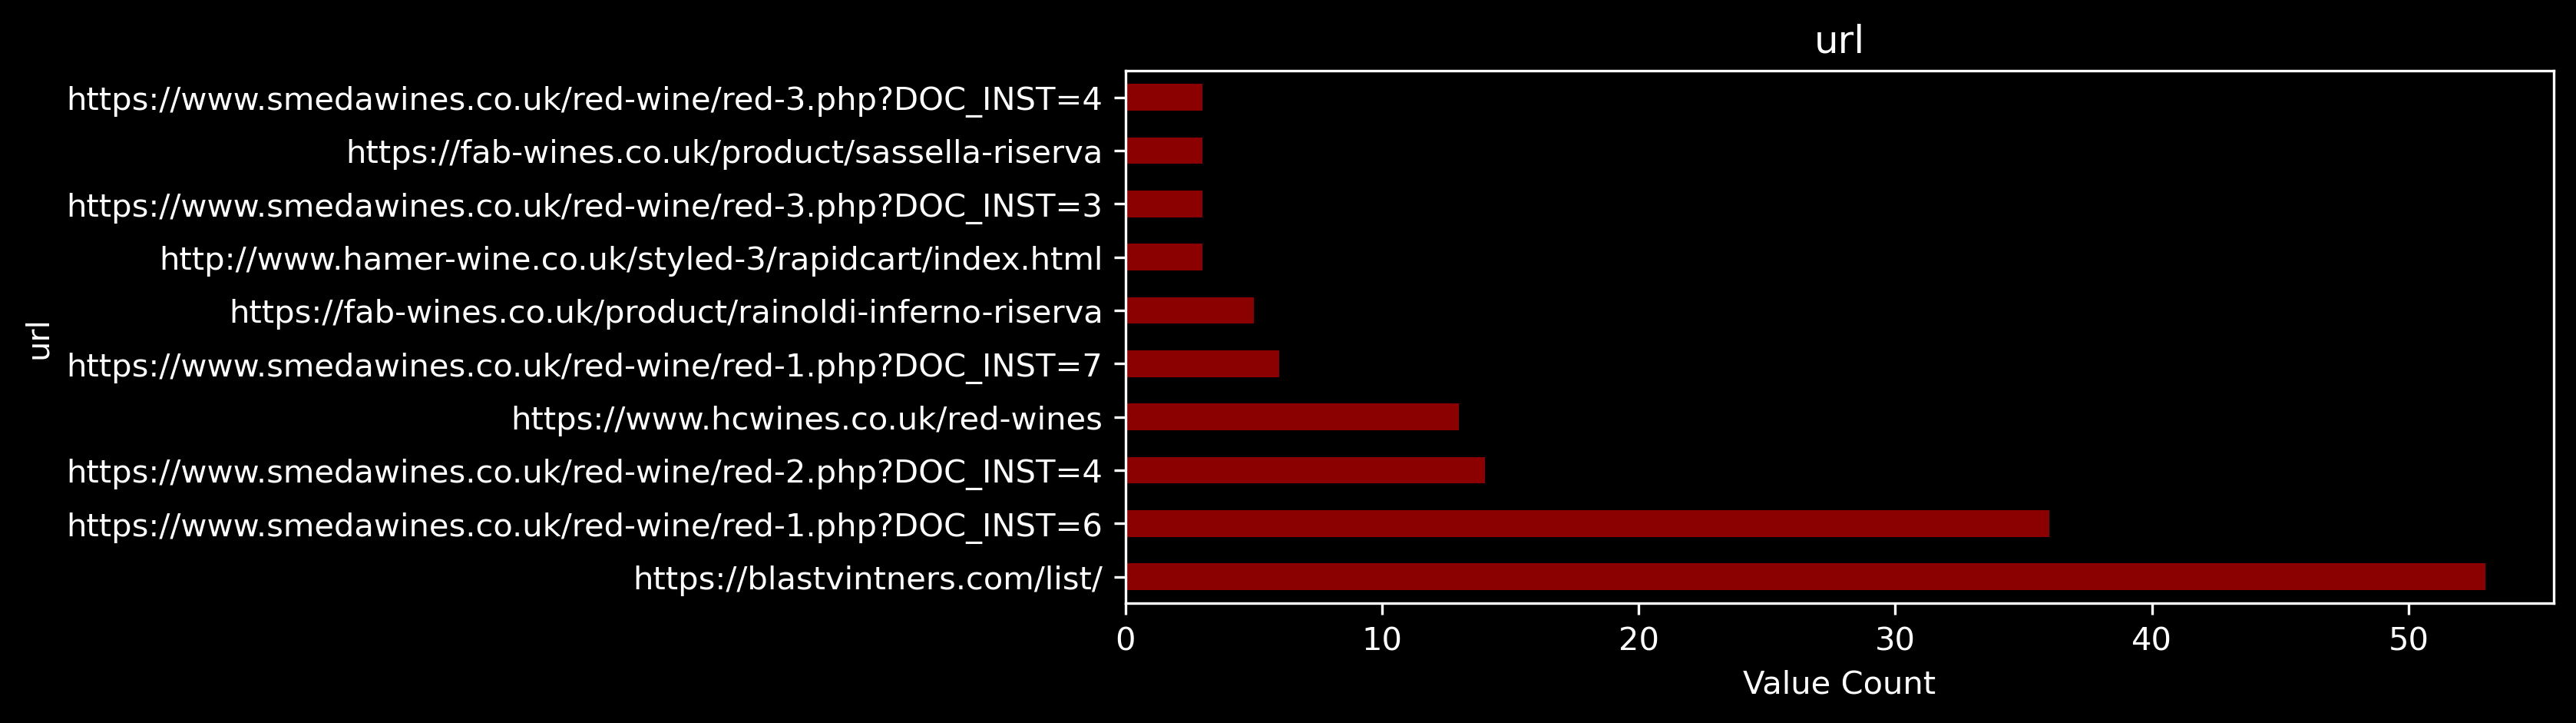

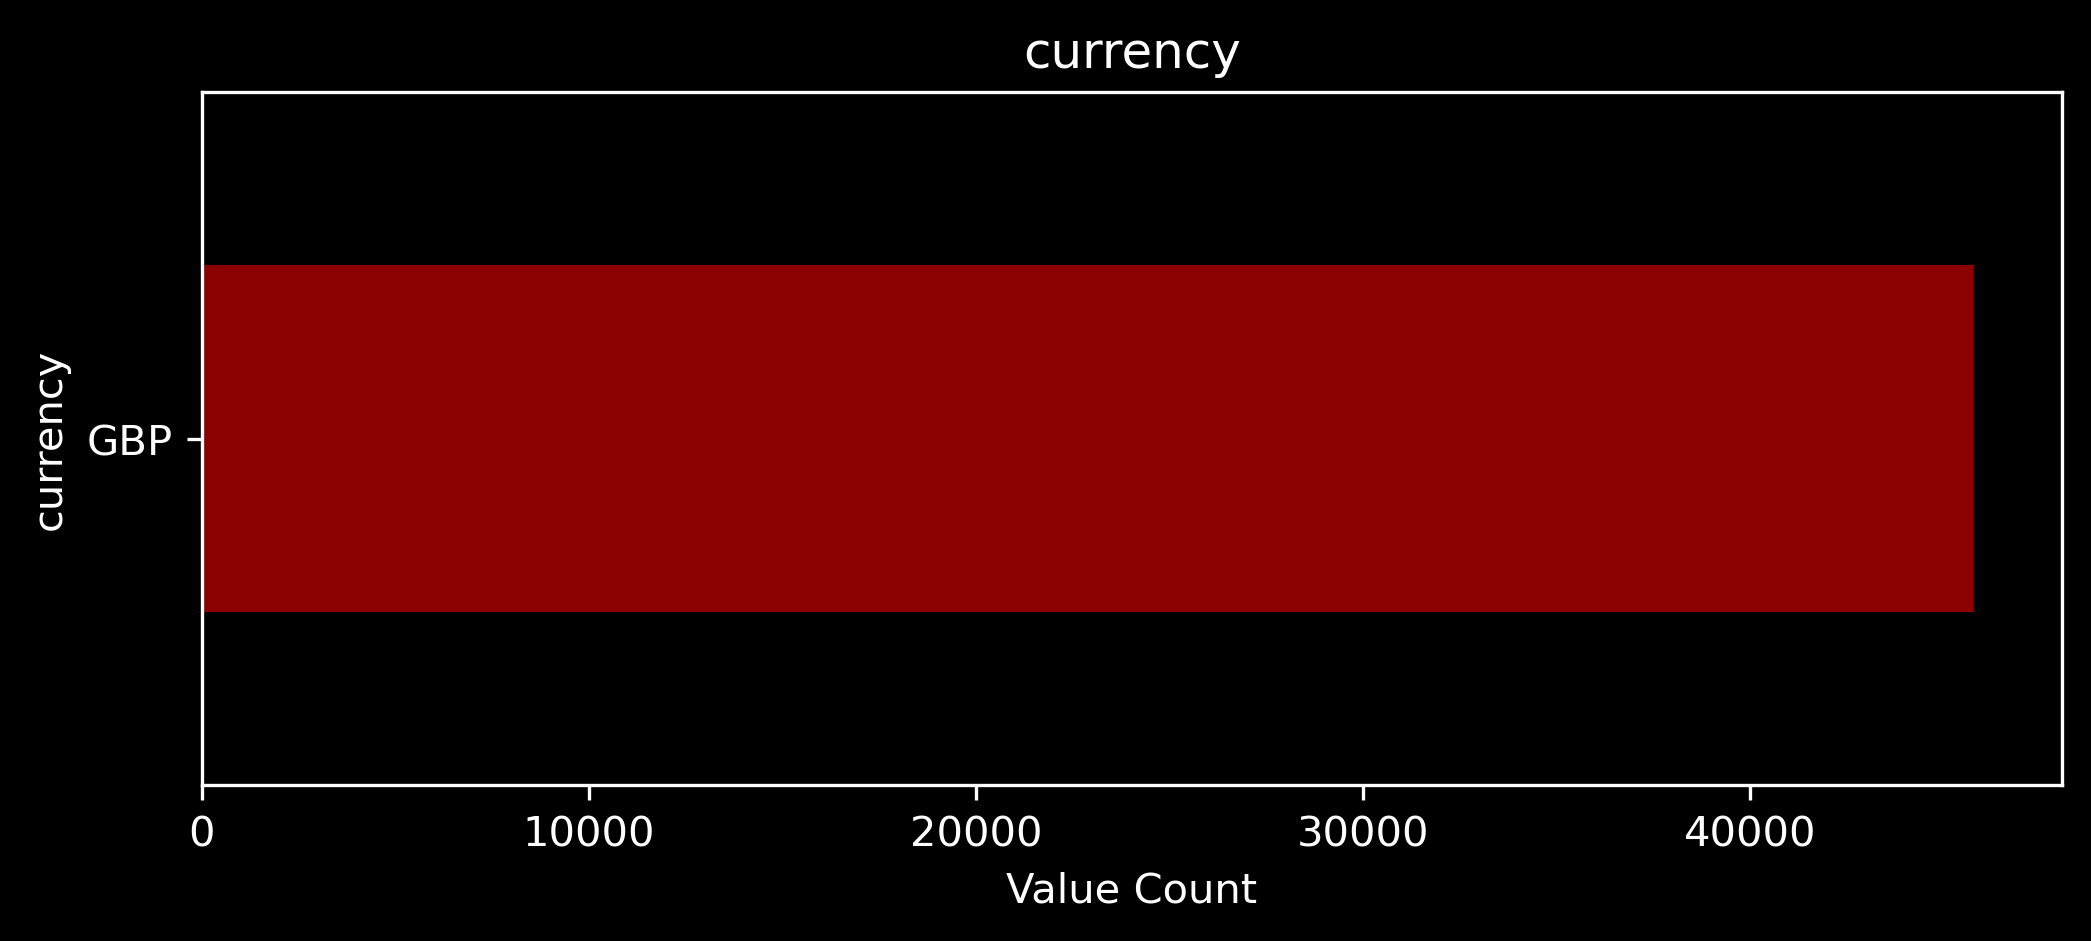

In [54]:
for column in cat_df.columns[:-1]:
    
    # Visualize a summary of each
    cat_df[column].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', color='darkred')
    plt.xlabel('Value Count')
    plt.title(column)
    plt.show()

In [9]:
for column in cat_df.columns[:-1]:
    
    # Visualize a summary of each
    print(f' {column} has {cat_df[column].nunique()} unique values.')
    print(f' The top 10 with the highest value counts are the following {cat_df[column].value_counts().sort_values(ascending=False).head(10)}:')
    print('\n')

 wine_name has 15411 unique values.
 The top 10 with the highest value counts are the following wine_name
Pomerol                                               789
Pinot Noir                                            615
Cabernet Sauvignon                                    563
Saint-Émilion Grand Cru (Grand Cru Classé)            444
Saint-Émilion Grand Cru (Premier Grand Cru Classé)    443
Brunello di Montalcino                                388
Saint-Émilion Grand Cru                               388
Pauillac (Grand Cru Classé)                           387
Saint-Julien (Grand Cru Classé)                       377
Margaux (Grand Cru Classé)                            313
Name: count, dtype: int64:


 winery has 9076 unique values.
 The top 10 with the highest value counts are the following winery
Louis Jadot                  192
Gaja                         149
M. Chapoutier                148
Domaine Faiveley             140
Antinori                     138
Produttori del Barbar

**Analysis:**

`wine_name`:
- There are over 15k different wine names in this dataset. 
- Over 780 wines in this dataset are called 'Pomerol'.


`winery`:
- In total, there are over 9k different wineries in this dataset.


`country`:
- There are 31 countries in the dataset where more red wines are from France and Italy.


`region`:
- There are 1421 different regions.
- Most wines are from the region Barolo.


`currency`:
- All prices are in the currency GBP (pounds).


### Add on: Food Data

In [22]:
# Load food data
food_df = pd.read_csv(f'data/food_df.csv', index_col=0)

In [24]:
# Number of wines per food
wines_food = food_df.sum().sort_values(ascending=False)
wines_food

Beef                      42874
Game                      31918
Poultry                   31445
Lamb                      30519
Veal                      18652
Pasta                     11634
Cured Meat                 3390
Pork                       3114
Mature and hard cheese     1067
Mushrooms                  1055
Blue cheese                 730
Mild and soft cheese        280
Spicy food                   69
Appetizers                   55
Rich fish                    29
Lean fish                    22
Goat cheese                   0
Aperitif                      0
Fruity dessert                0
Shellfish                     0
Sweet dessert                 0
Junk food                     0
dtype: int64

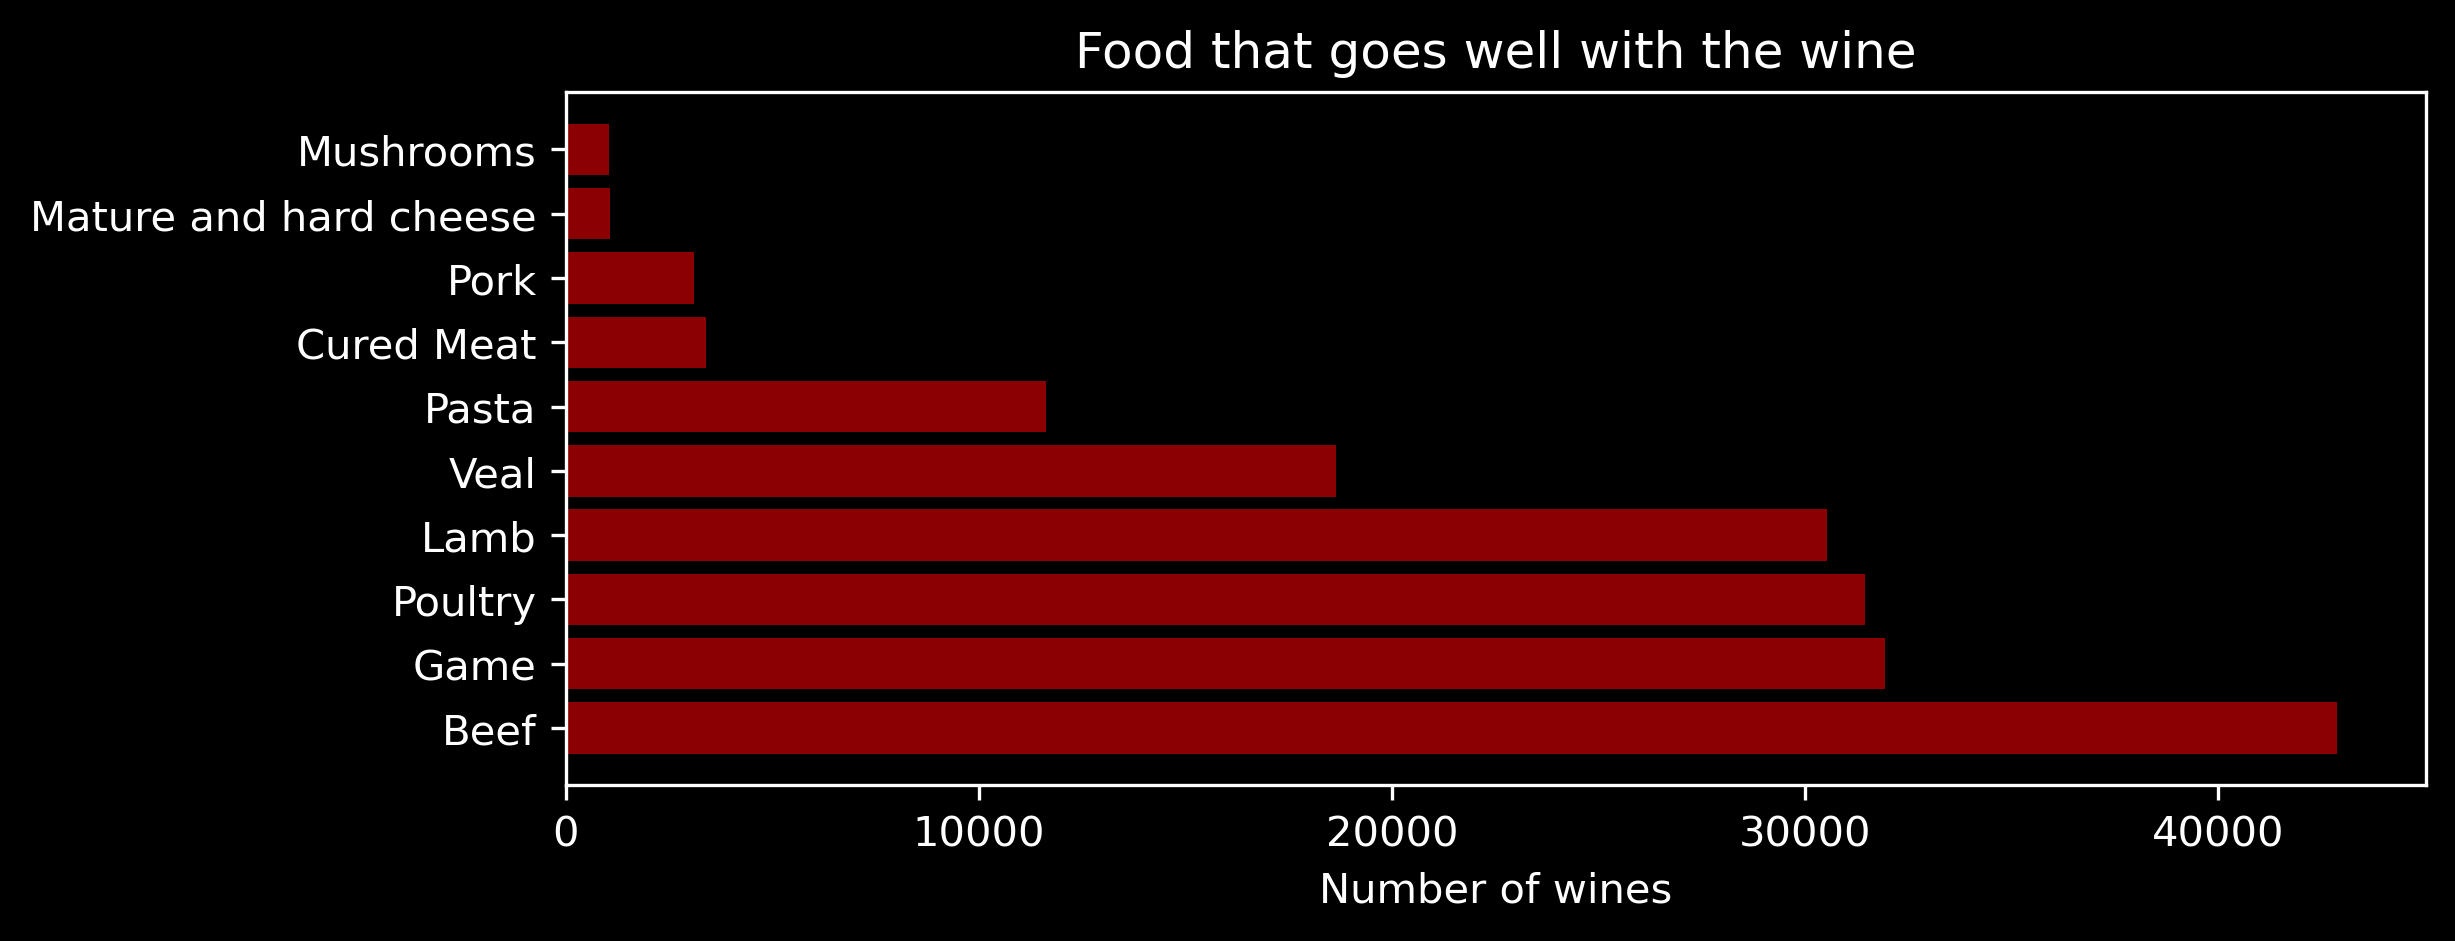

In [55]:
# Plot top 10

plt.figure()
plt.barh(wines_food.head(10).index, wines_food.head(10).values, color = 'darkred')
plt.xlabel('Number of wines')
plt.title('Food that goes well with the wine')
plt.show()

**Analysis:**

`food`:
- Most red wines go well with beef, poultry and game.
- There are no red wines in this dataset that go well with fruity desserts, shellfish, goat cheese, sweet desserts, junk food or as an aperitif.


## Numerical Data <a id="b2.1"></a>

In [26]:
num_df = df.select_dtypes(['int64', 'float64']).copy()
num_df.head()

wine_id  year  avg_rating_wine  num_rating_wine  \
index                                                           
1101361_1992  1101361  1992              4.5             2219   
1186041_1959  1186041  1959              4.5             5408   
1099538_1929  1099538  1929              4.3             7005   
79235_1993      79235  1993              4.3             2665   
87560_1999      87560  1999              4.2             1896   

              avg_rating_wine_year  num_rating_wine_year  price  volume  body  \
index                                                                           
1101361_1992                   4.5                  2219   0.98    1500   3.0   
1186041_1959                   4.5                  5408   1.07     750   3.0   
1099538_1929                   4.3                  7005   1.84     750   4.0   
79235_1993                     4.3                  2665   1.11     750   3.0   
87560_1999                     4.2                  1896   1.84     750   4.0   

              taste_intensity  taste_tannin  taste_sweetness  taste_acidity  \
index                                                                         
1101361_1992         3.250090      3.475009         2.186149       3.935772   
1186041_1959         3.094230      2.708399         1.796174       4.161411   
1099538_1929         4.124983      3.436851         1.677245       3.367577   
79235_1993           2.965793      2.549722         1.676296       4.049462   
87560_1999           3.151294      2.824329         1.805076       3.473748   

              taste_fizziness  
index                          
1101361_1992              0.0  
1186041_1959              0.0  
1099538_1929              0.0  
79235_1993                0.0  
87560_1999                0.0

A distribution of the wine id does not make sense and is represented by the wine names in the categorical analysis. Therefore, I am going to drop this column.

In [27]:
# Drop wine_id column for analysis
num_df.drop(columns='wine_id', inplace = True)

In [28]:
num_df.describe()

year  avg_rating_wine  num_rating_wine  avg_rating_wine_year  \
count  45776.000000     45776.000000     45776.000000          45776.000000   
mean    2014.126726         3.963498      5857.073729              3.984688   
std       11.565250         0.623534     12738.397755              0.624620   
min     1891.000000         0.000000         0.000000              0.000000   
25%     2014.000000         3.800000       417.000000              3.800000   
50%     2018.000000         4.000000      1446.000000              4.100000   
75%     2020.000000         4.200000      5006.000000              4.300000   
max     2023.000000         4.800000    225978.000000              4.900000   

       num_rating_wine_year         price        volume          body  \
count          45776.000000  45776.000000  45776.000000  45776.000000   
mean             912.171509    103.161246    766.720006      3.765598   
std             3622.020835    220.900217    127.828441      0.840988   
min                0.000000      0.980000    375.000000      1.000000   
25%               69.000000     18.600000    750.000000      3.000000   
50%              186.500000     35.050000    750.000000      4.000000   
75%              551.000000     81.140000    750.000000      4.000000   
max           122620.000000   2510.000000   1500.000000      5.000000   

       taste_intensity  taste_tannin  taste_sweetness  taste_acidity  \
count     45776.000000  45776.000000     45776.000000   45776.000000   
mean          3.687541      3.215973         1.711915       3.598664   
std           0.688514      0.665522         0.346926       0.604757   
min           1.000000      1.000000         1.000000       1.454222   
25%           3.194421      2.742248         1.515252       3.152320   
50%           3.821617      3.238554         1.659718       3.639496   
75%           4.177712      3.657508         1.853035       4.079612   
max           5.000000      5.000000         3.590168       5.000000   

       taste_fizziness  
count          45776.0  
mean               0.0  
std                0.0  
min                0.0  
25%                0.0  
50%                0.0  
75%                0.0  
max                0.0

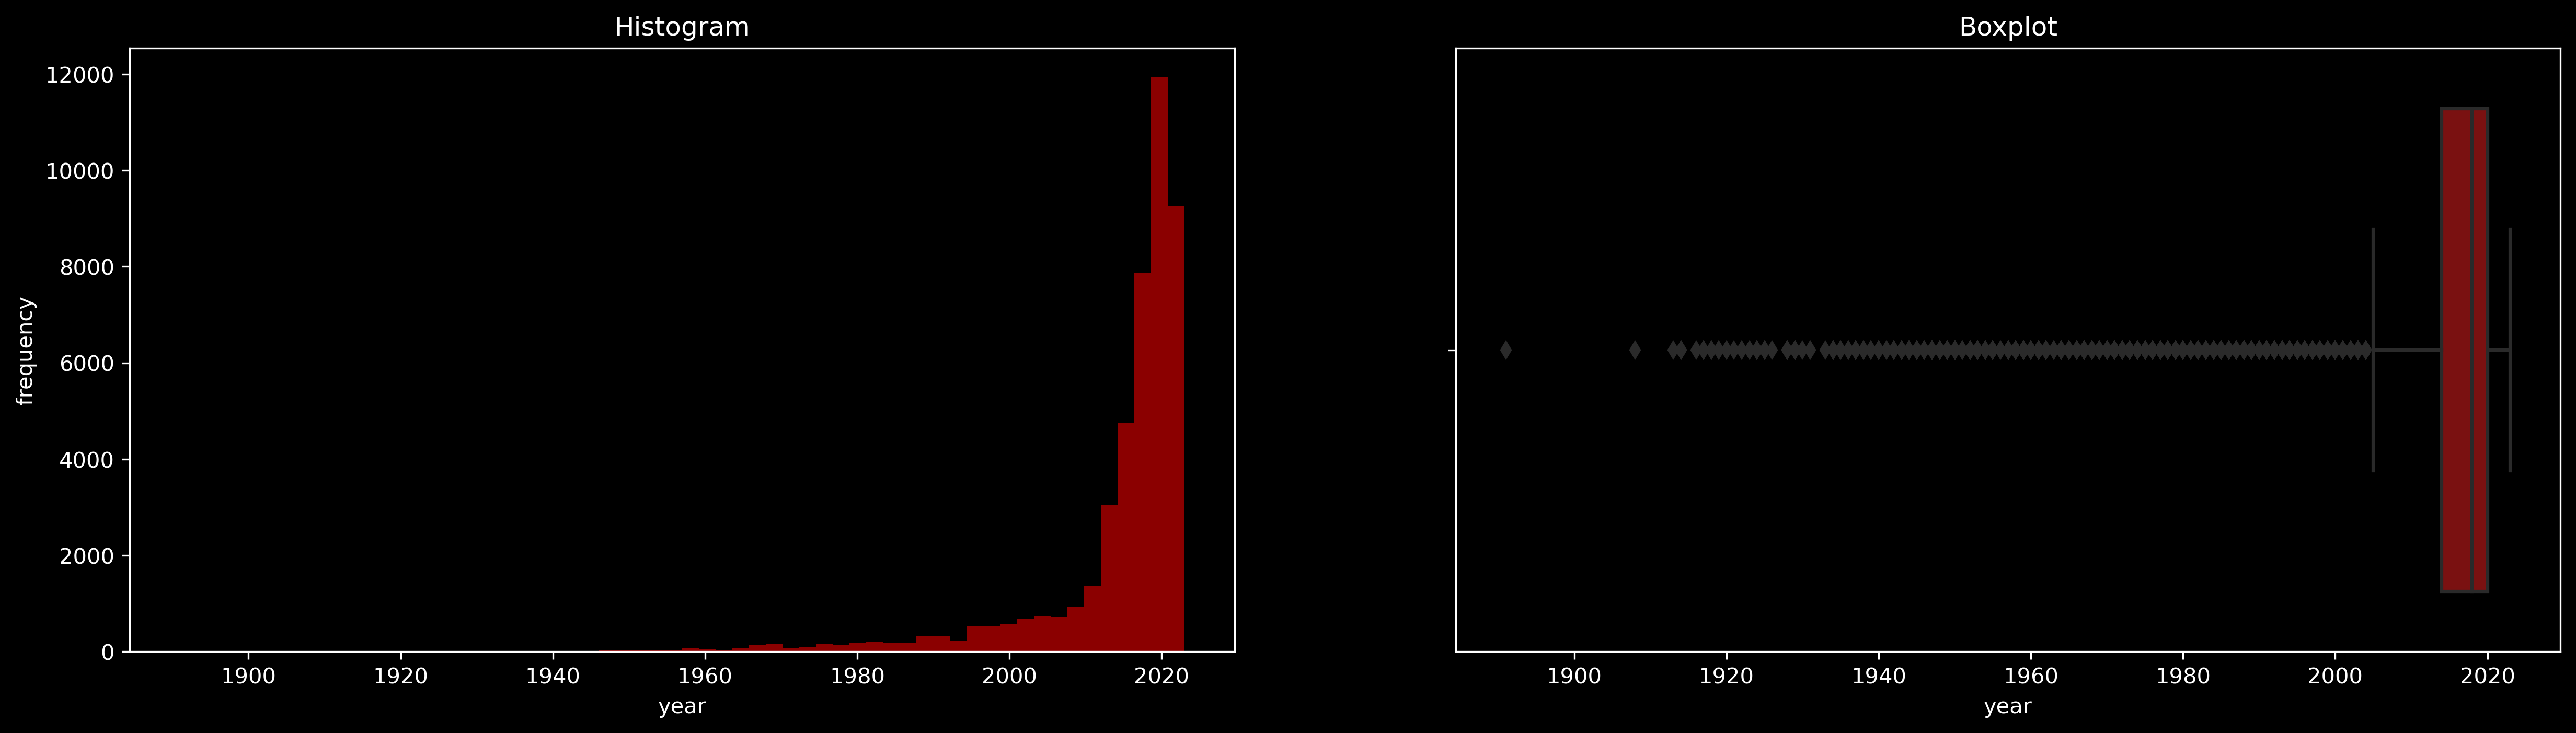

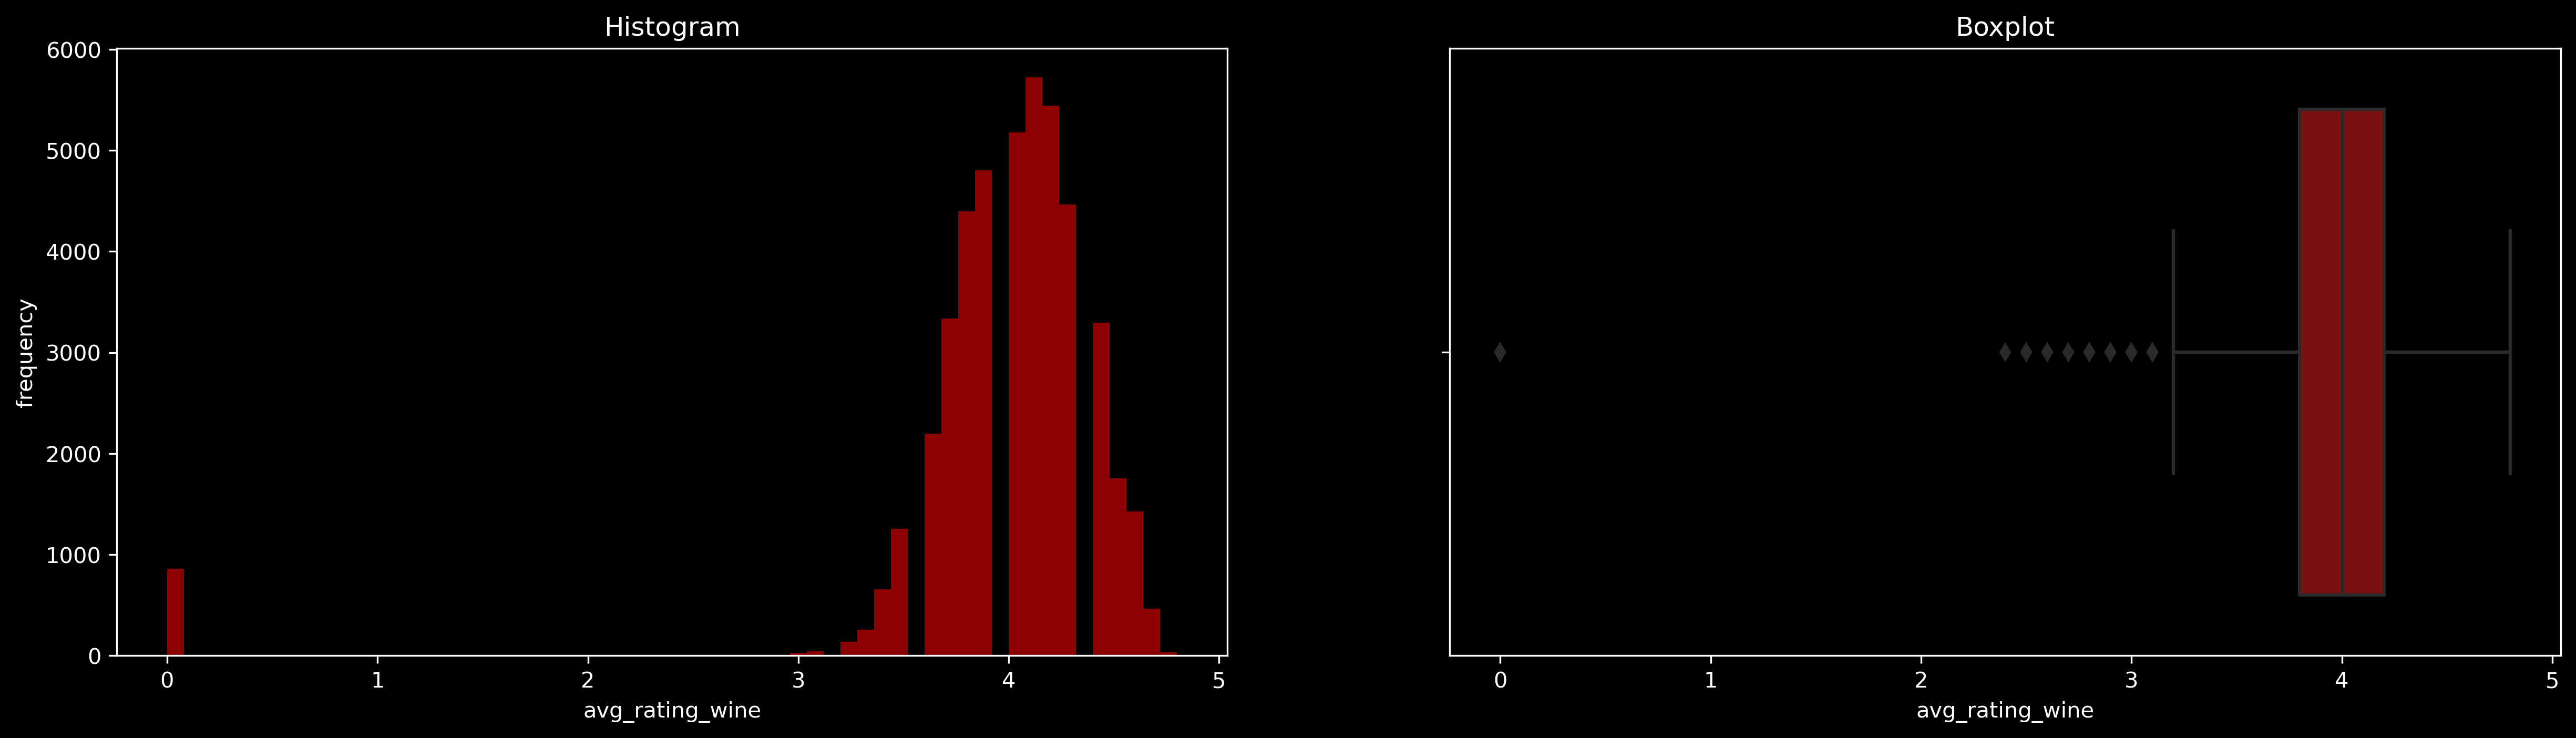

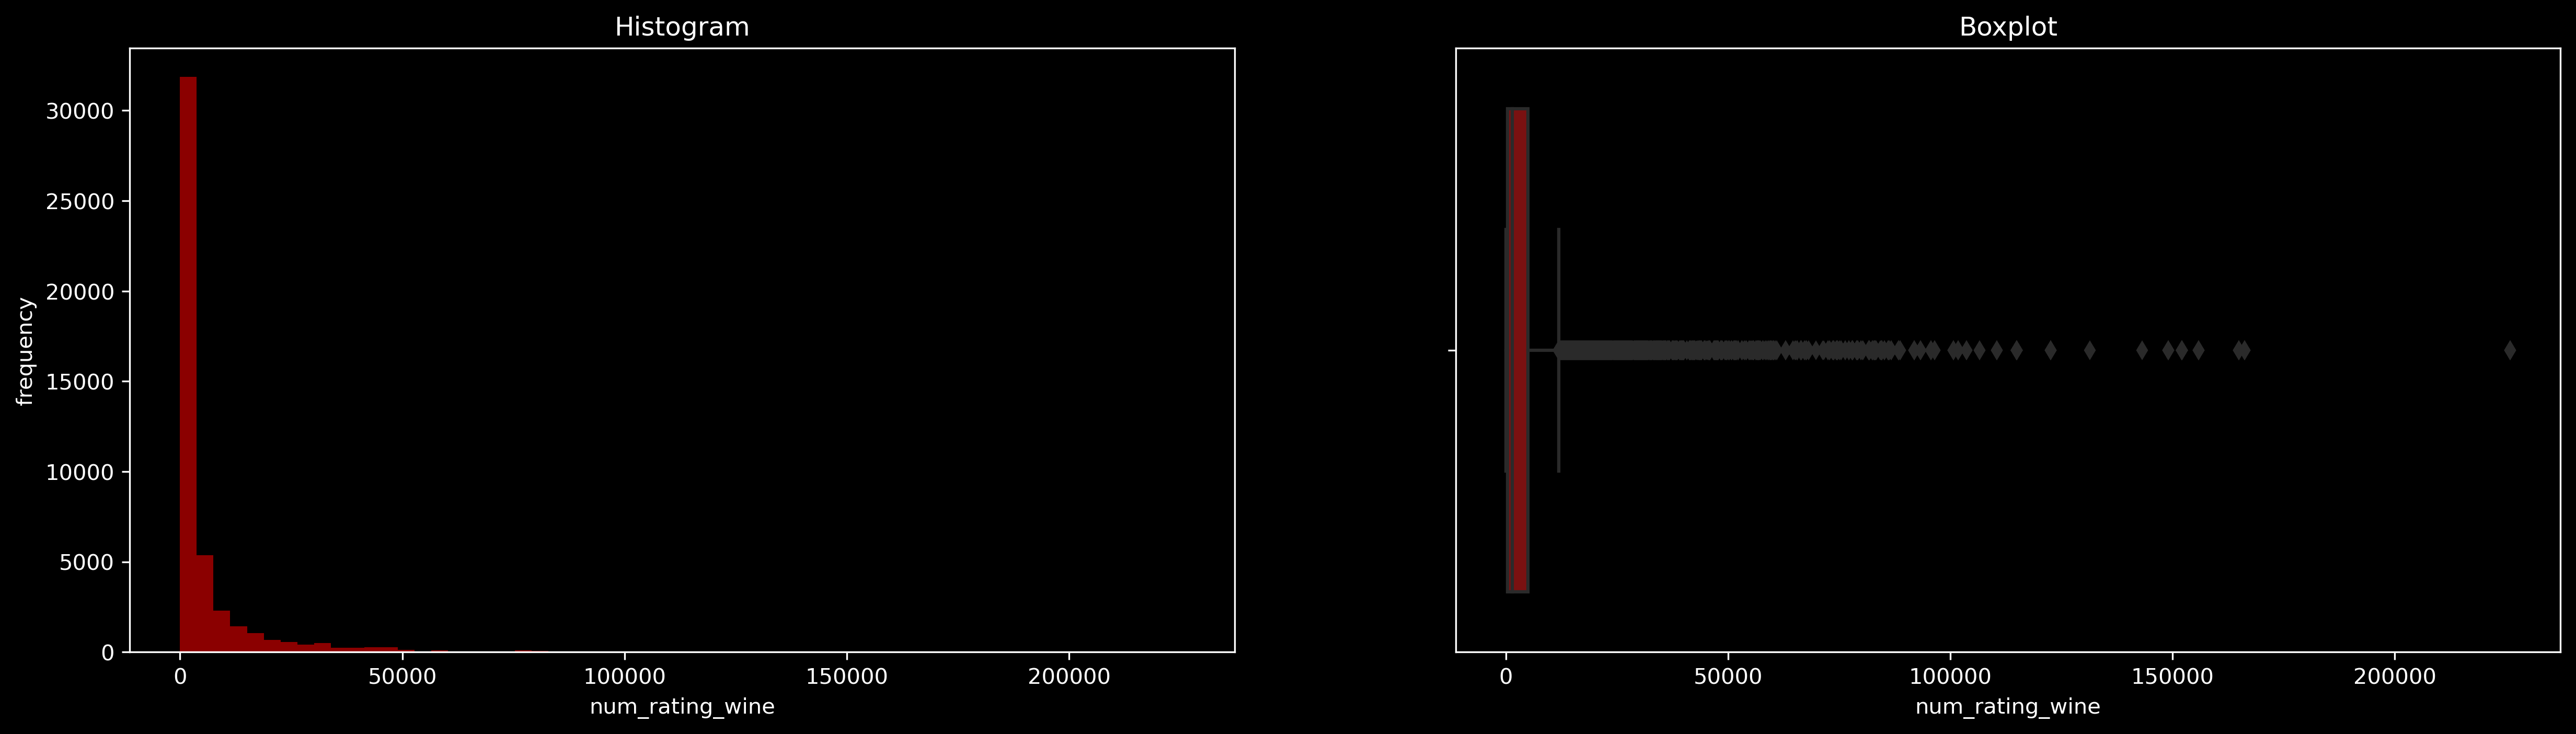

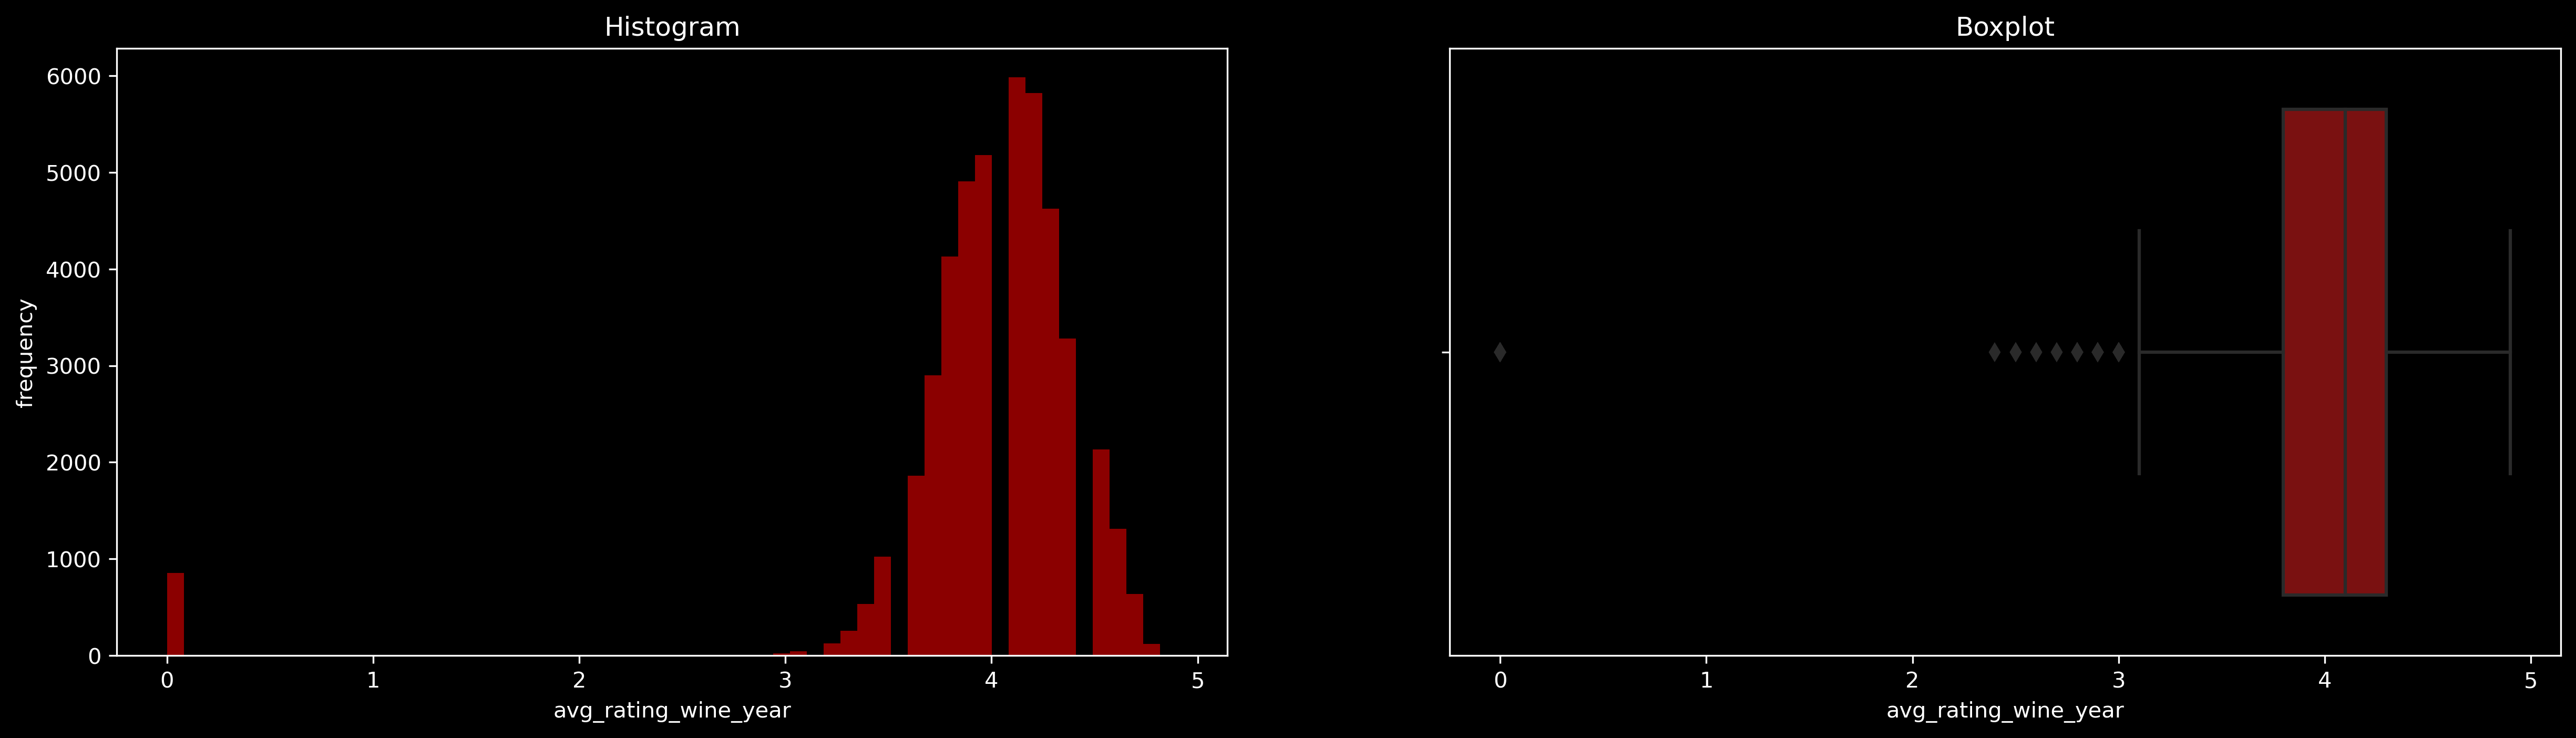

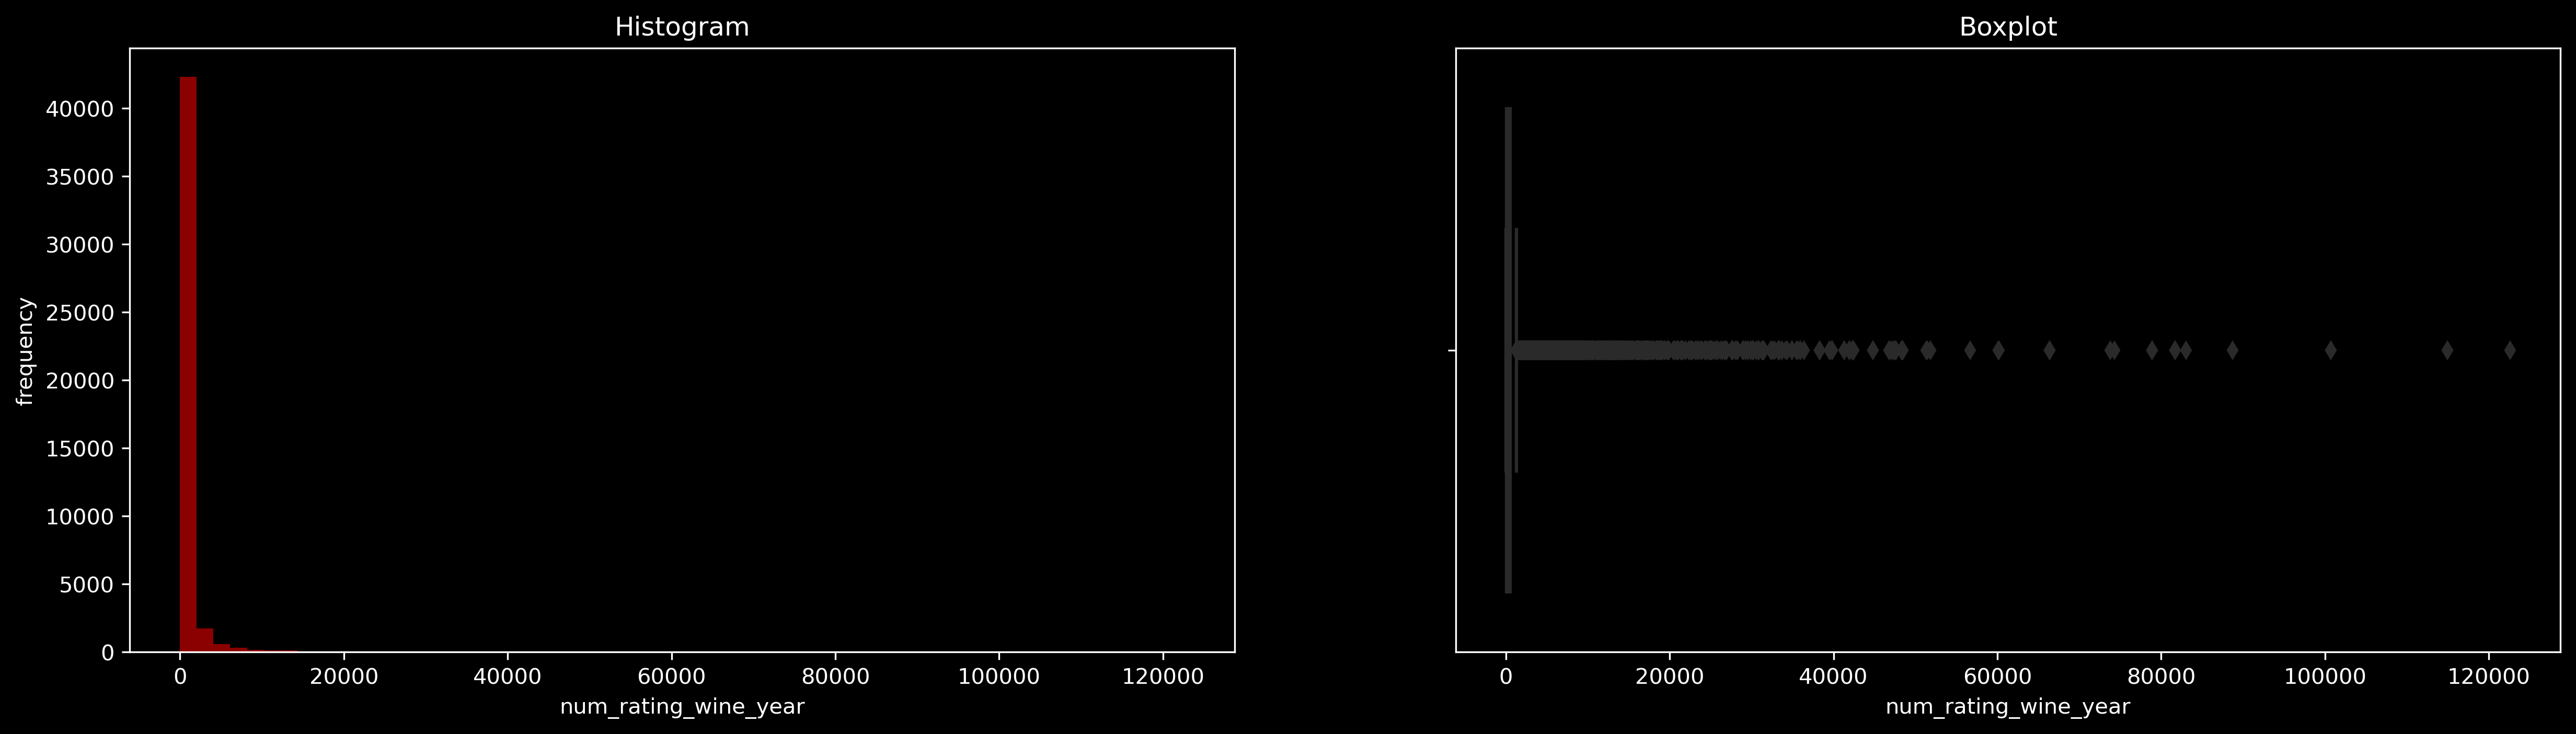

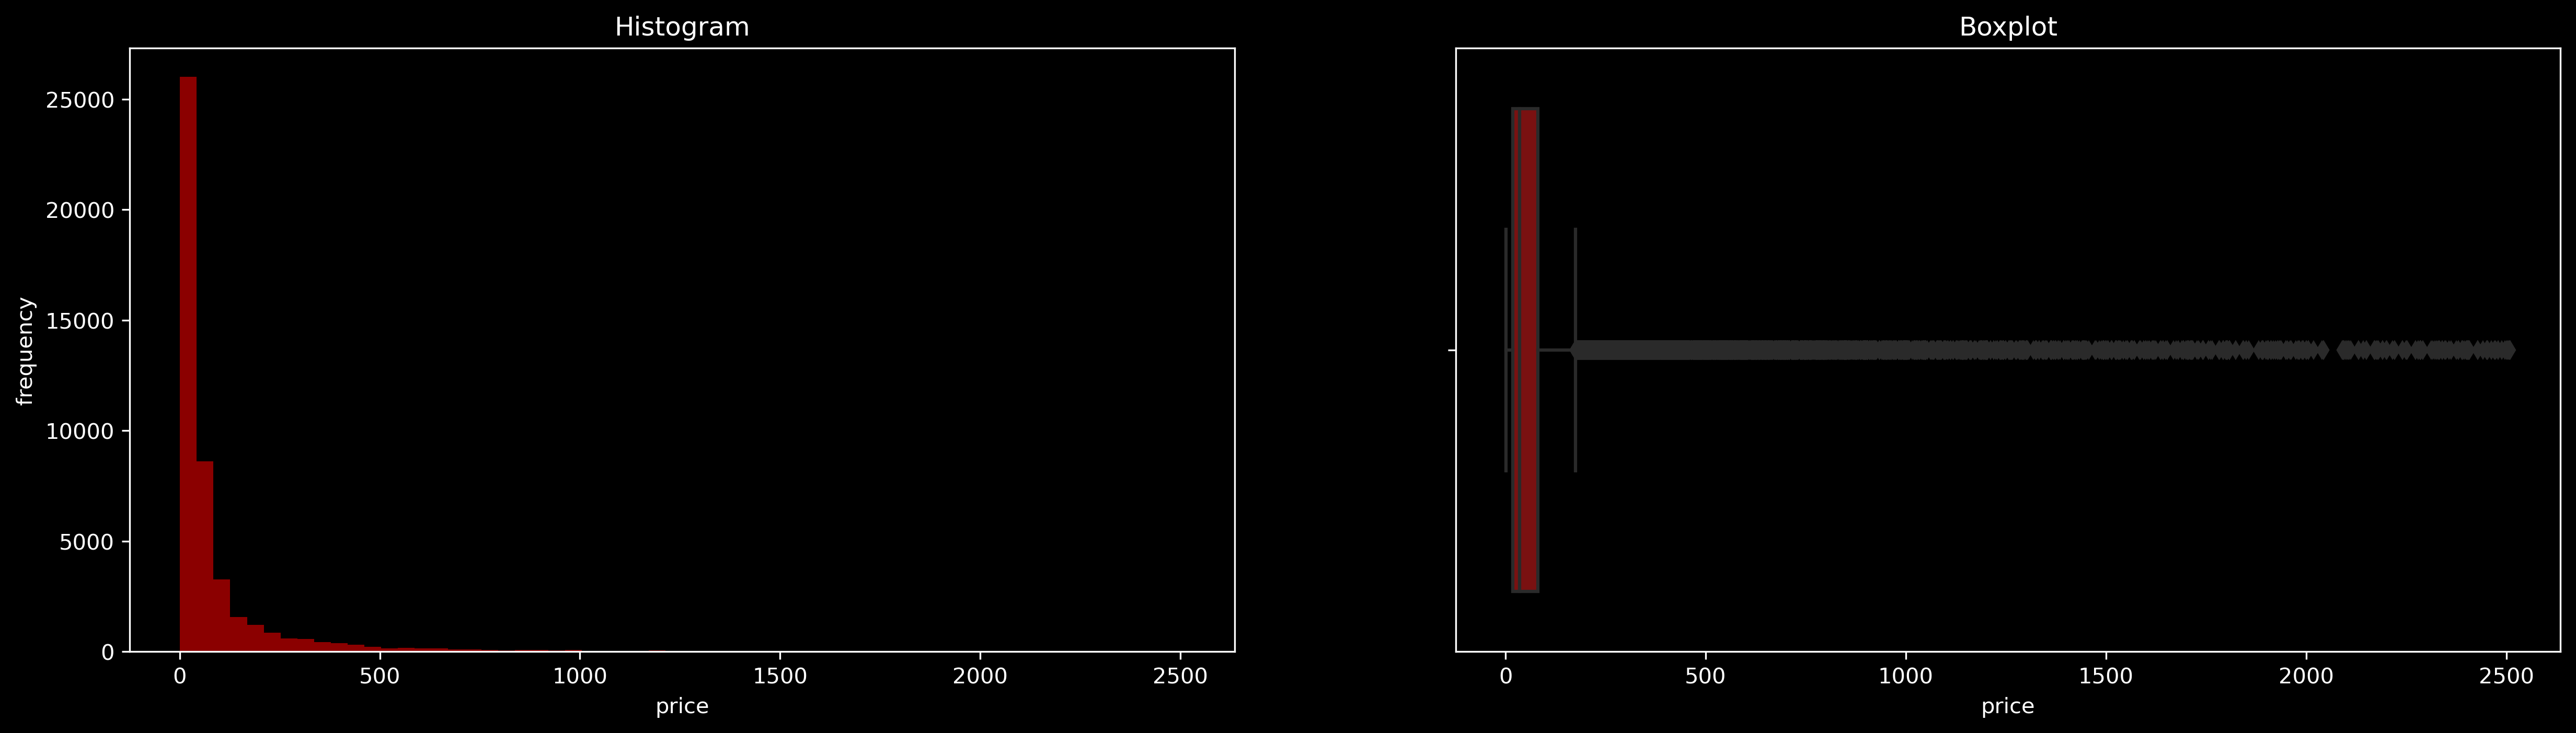

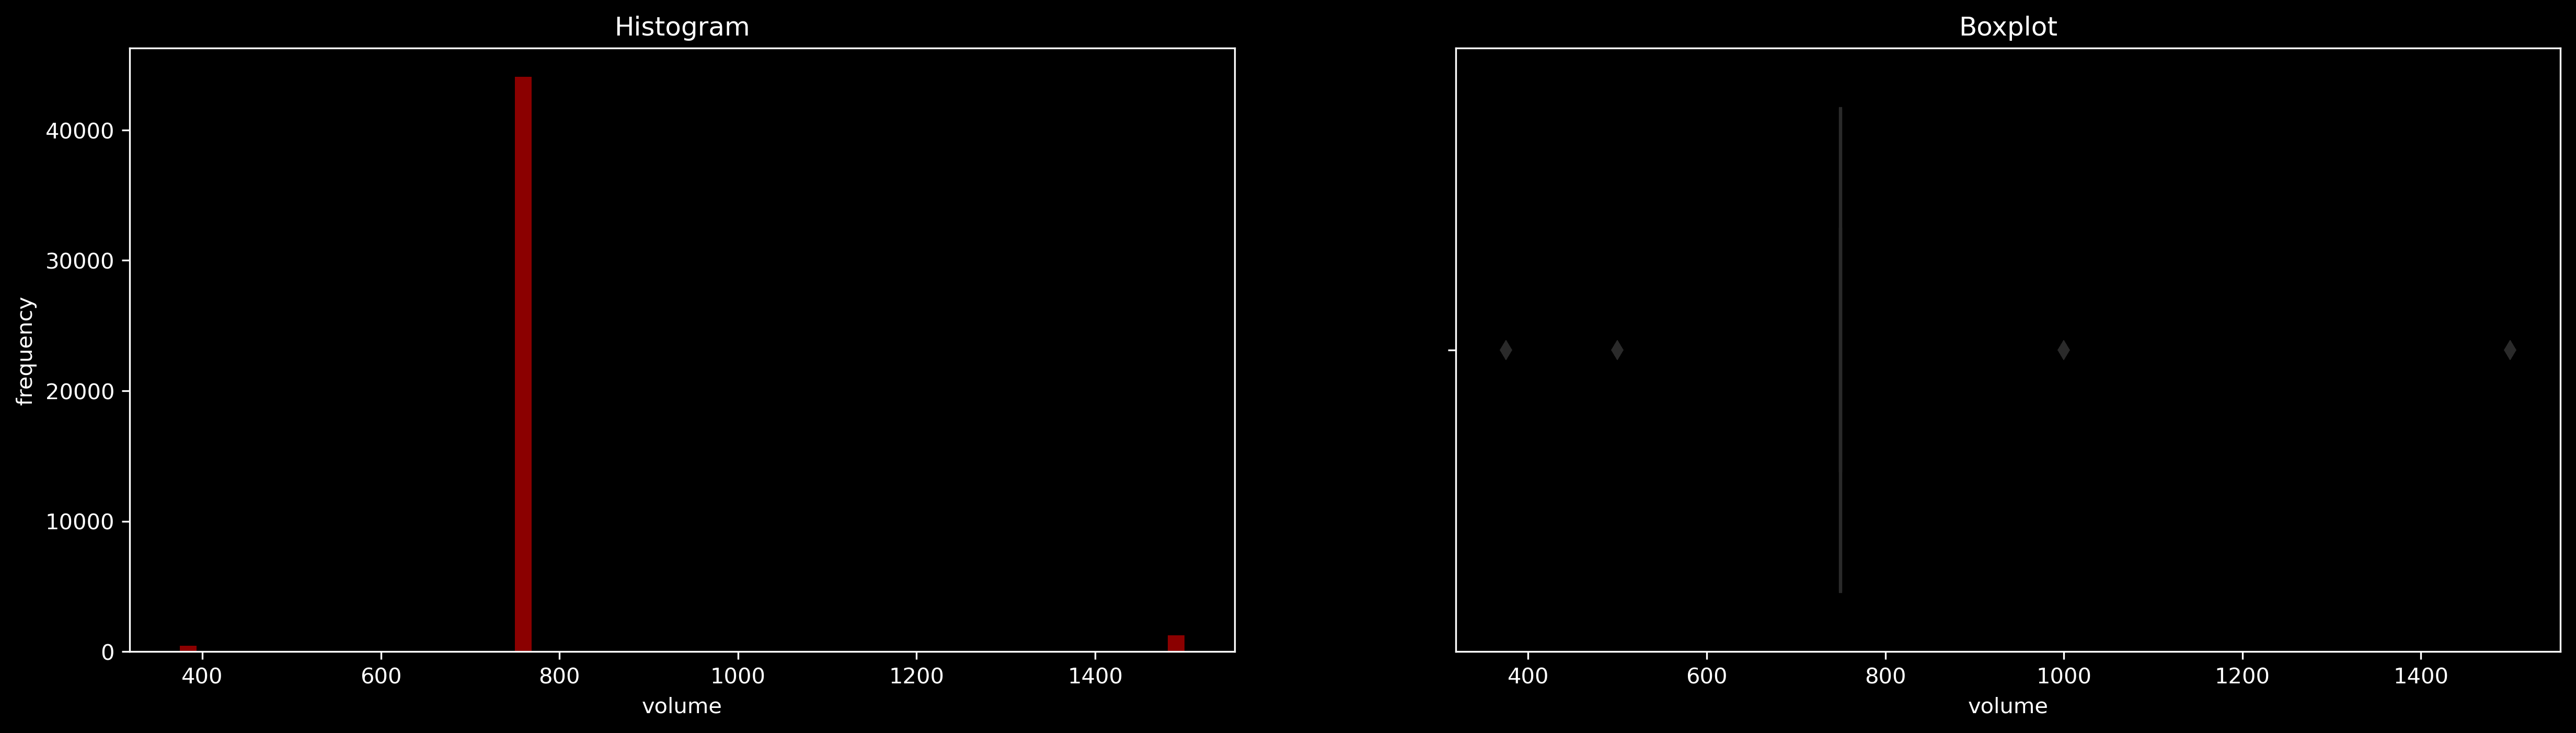

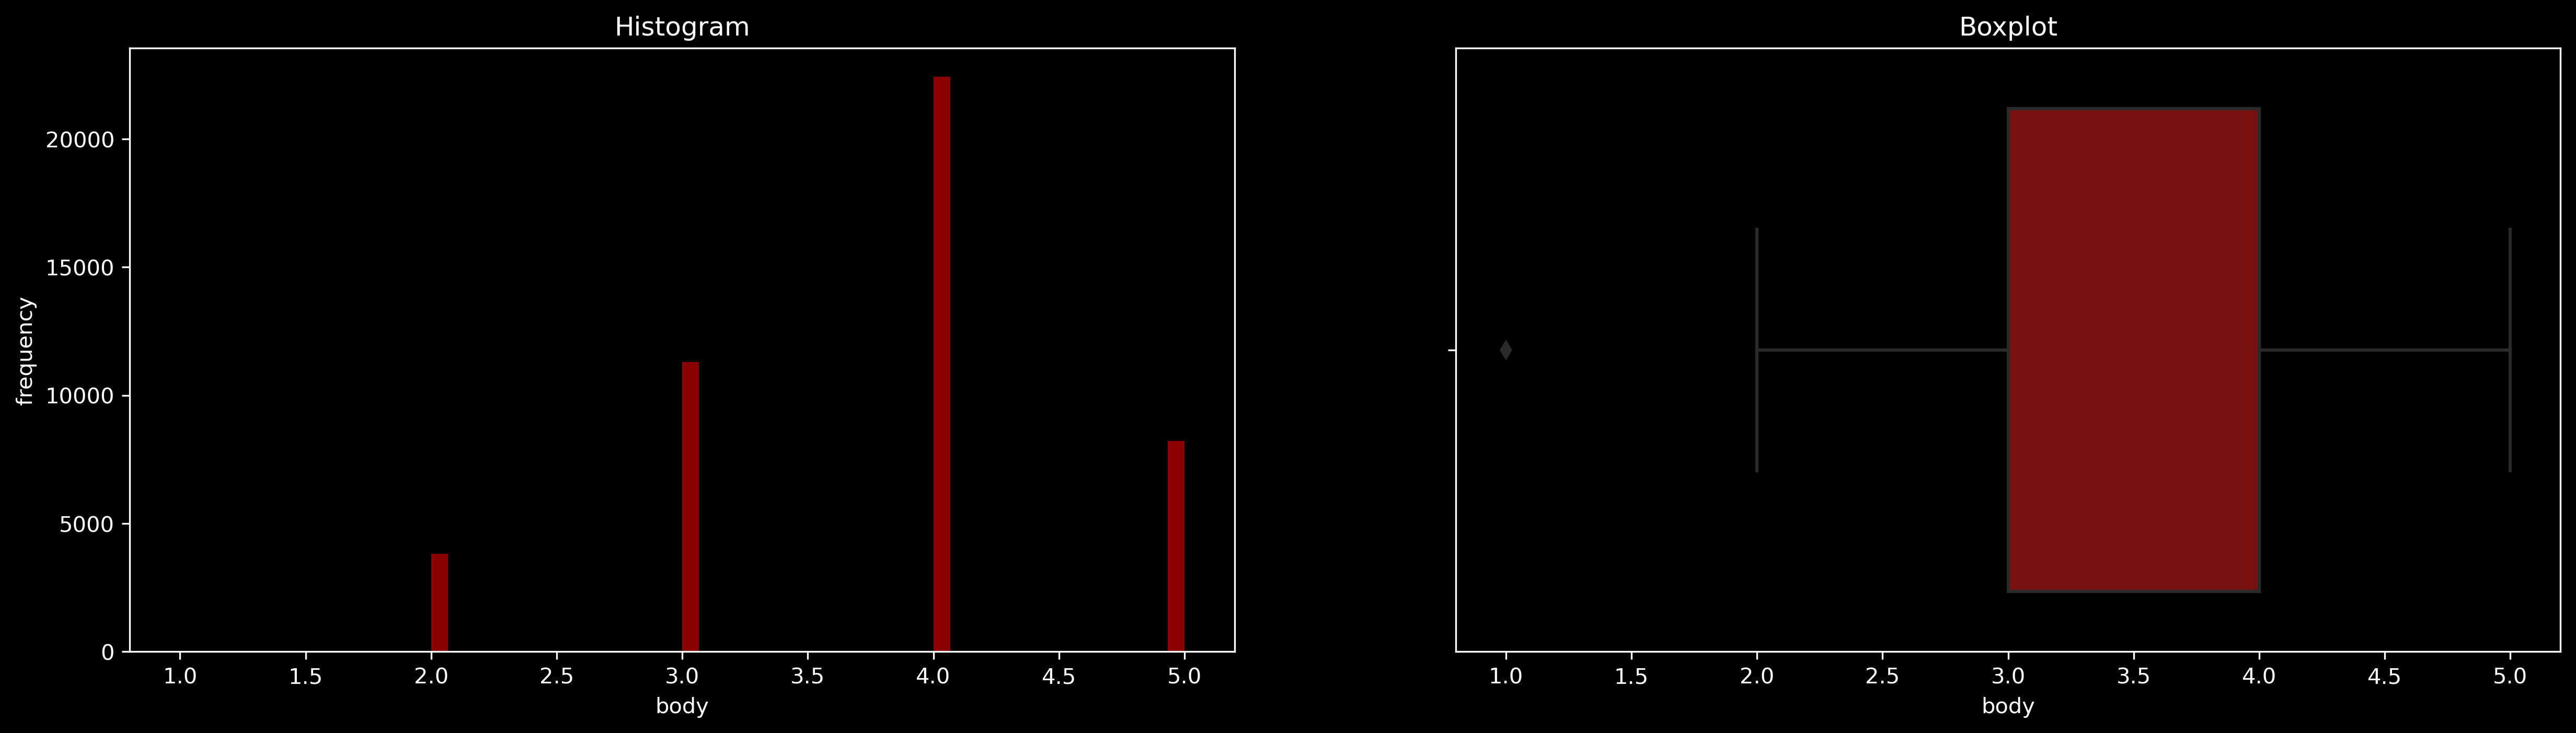

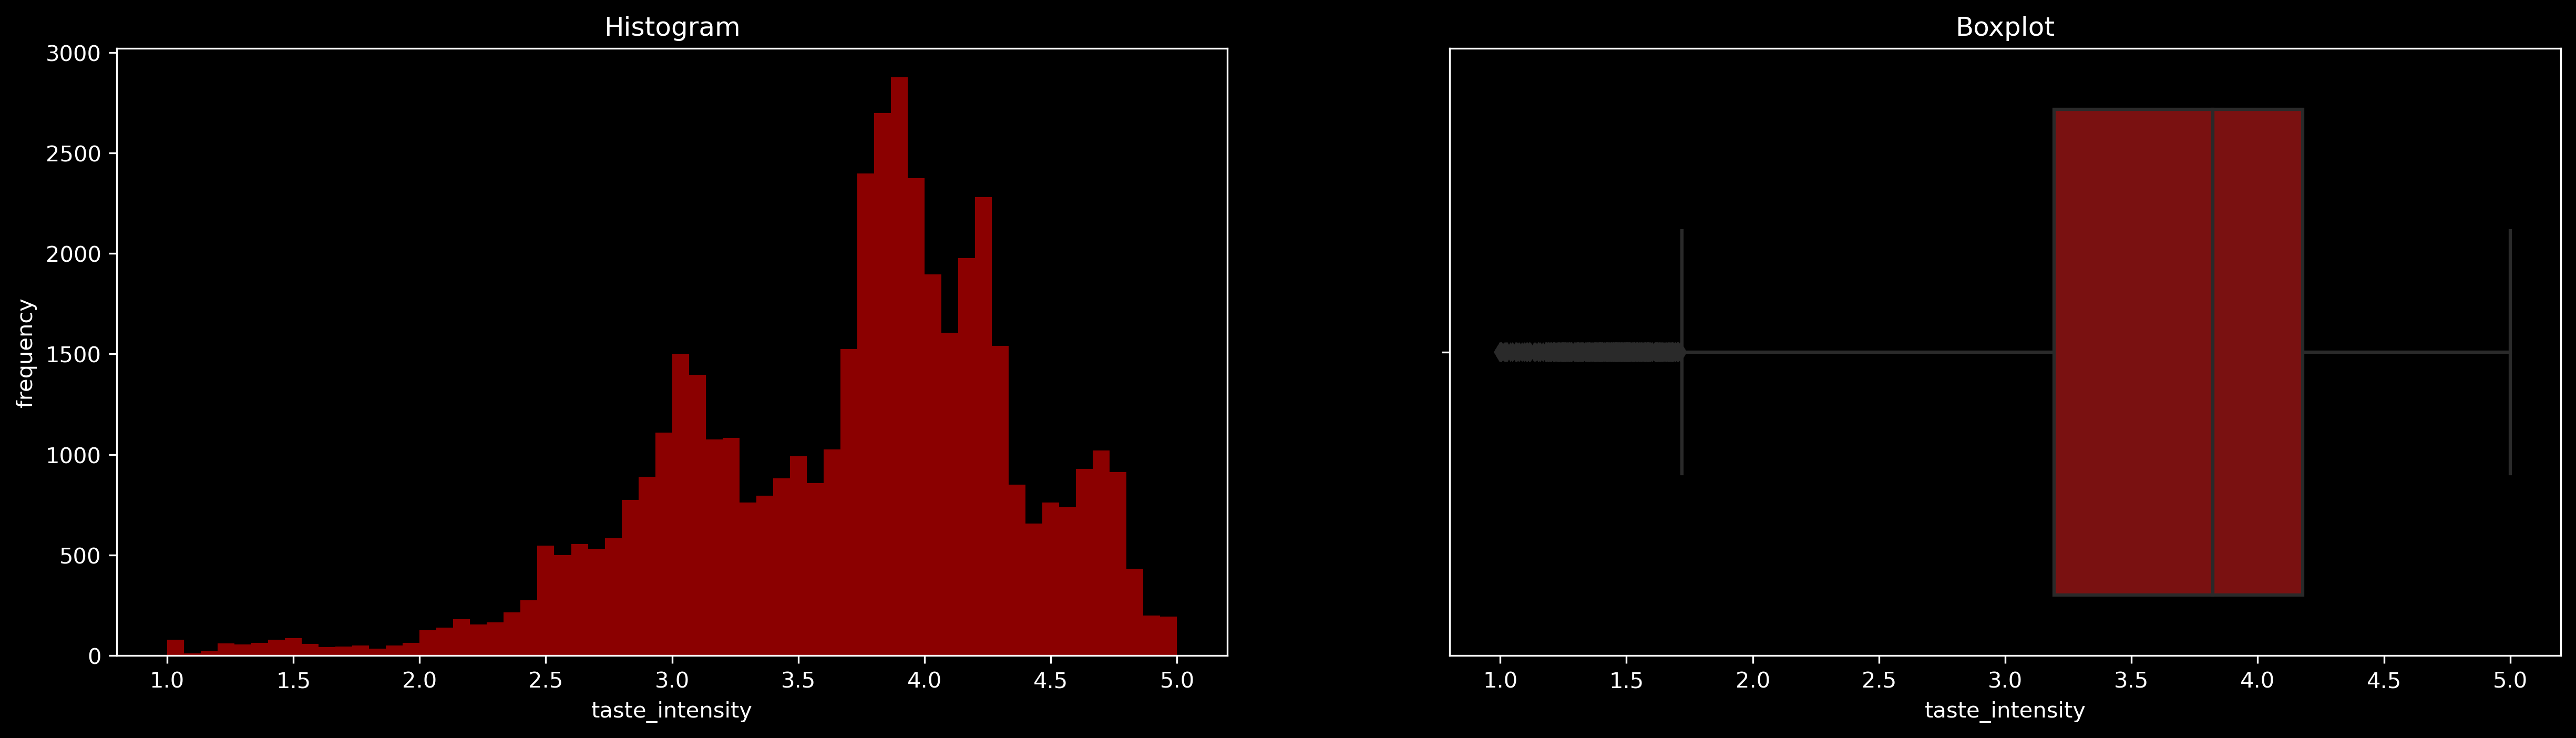

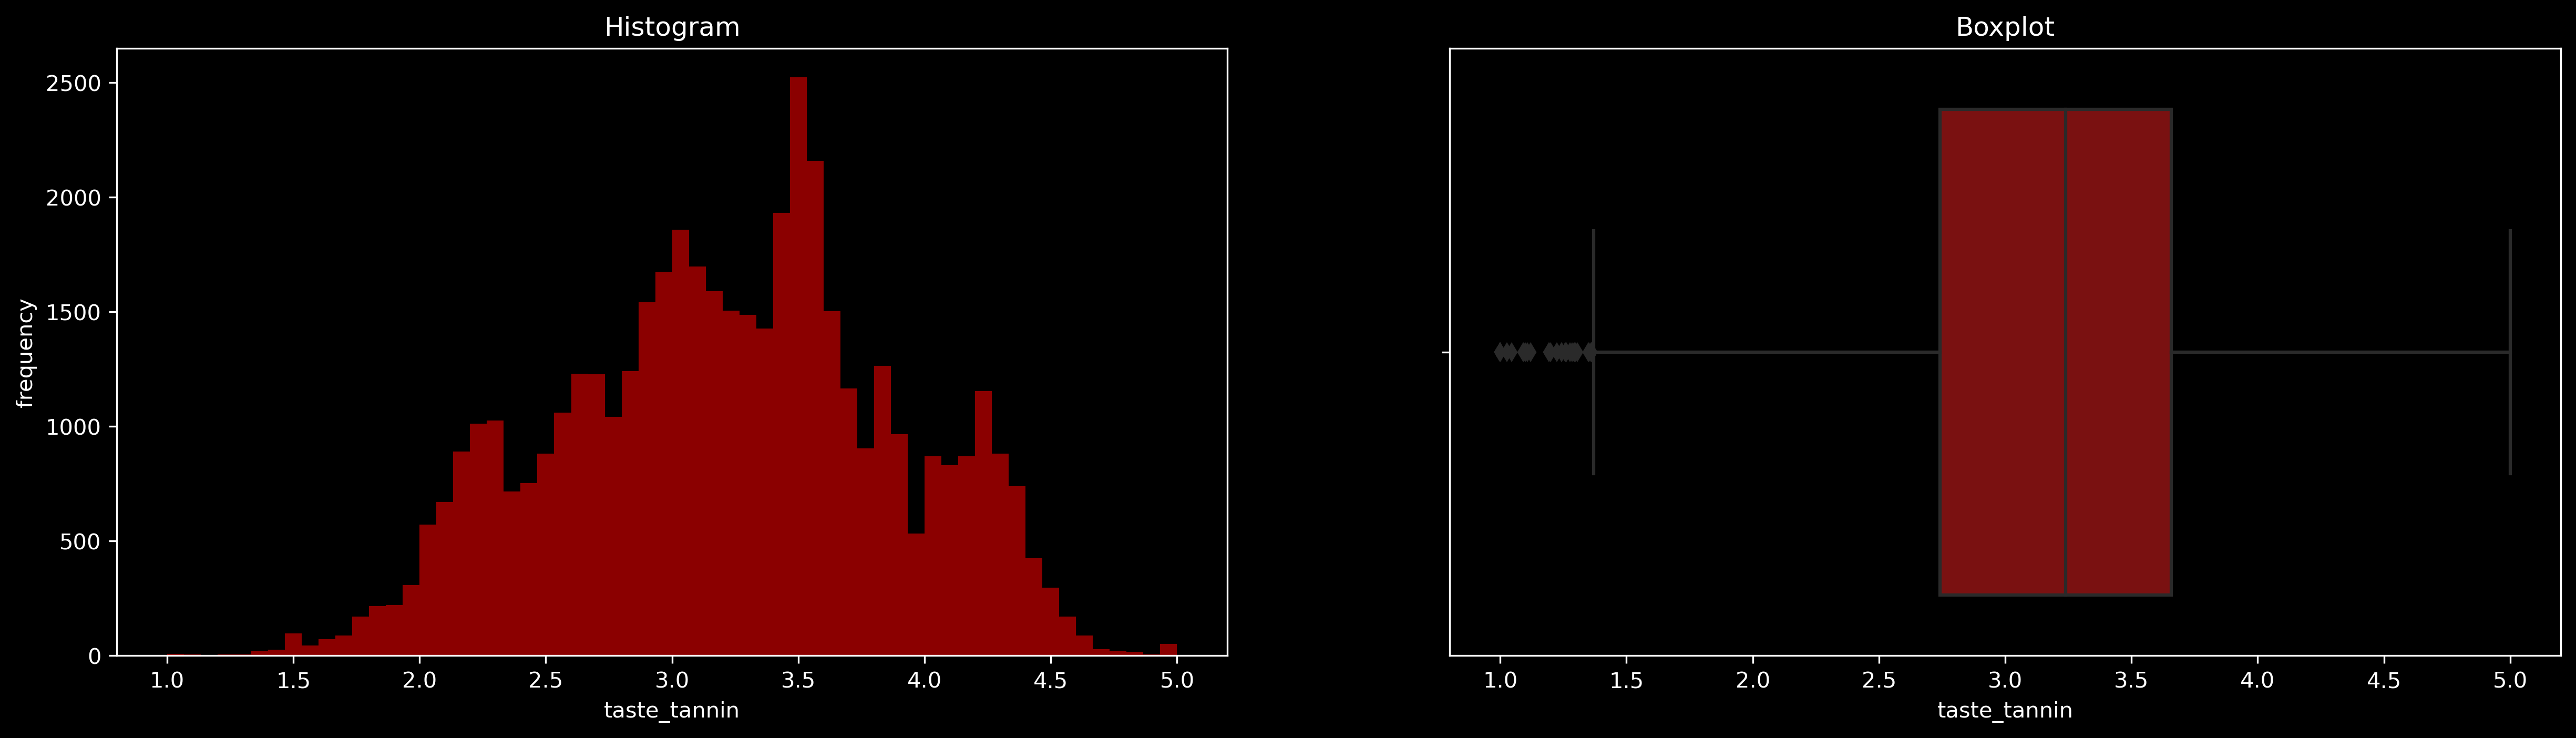

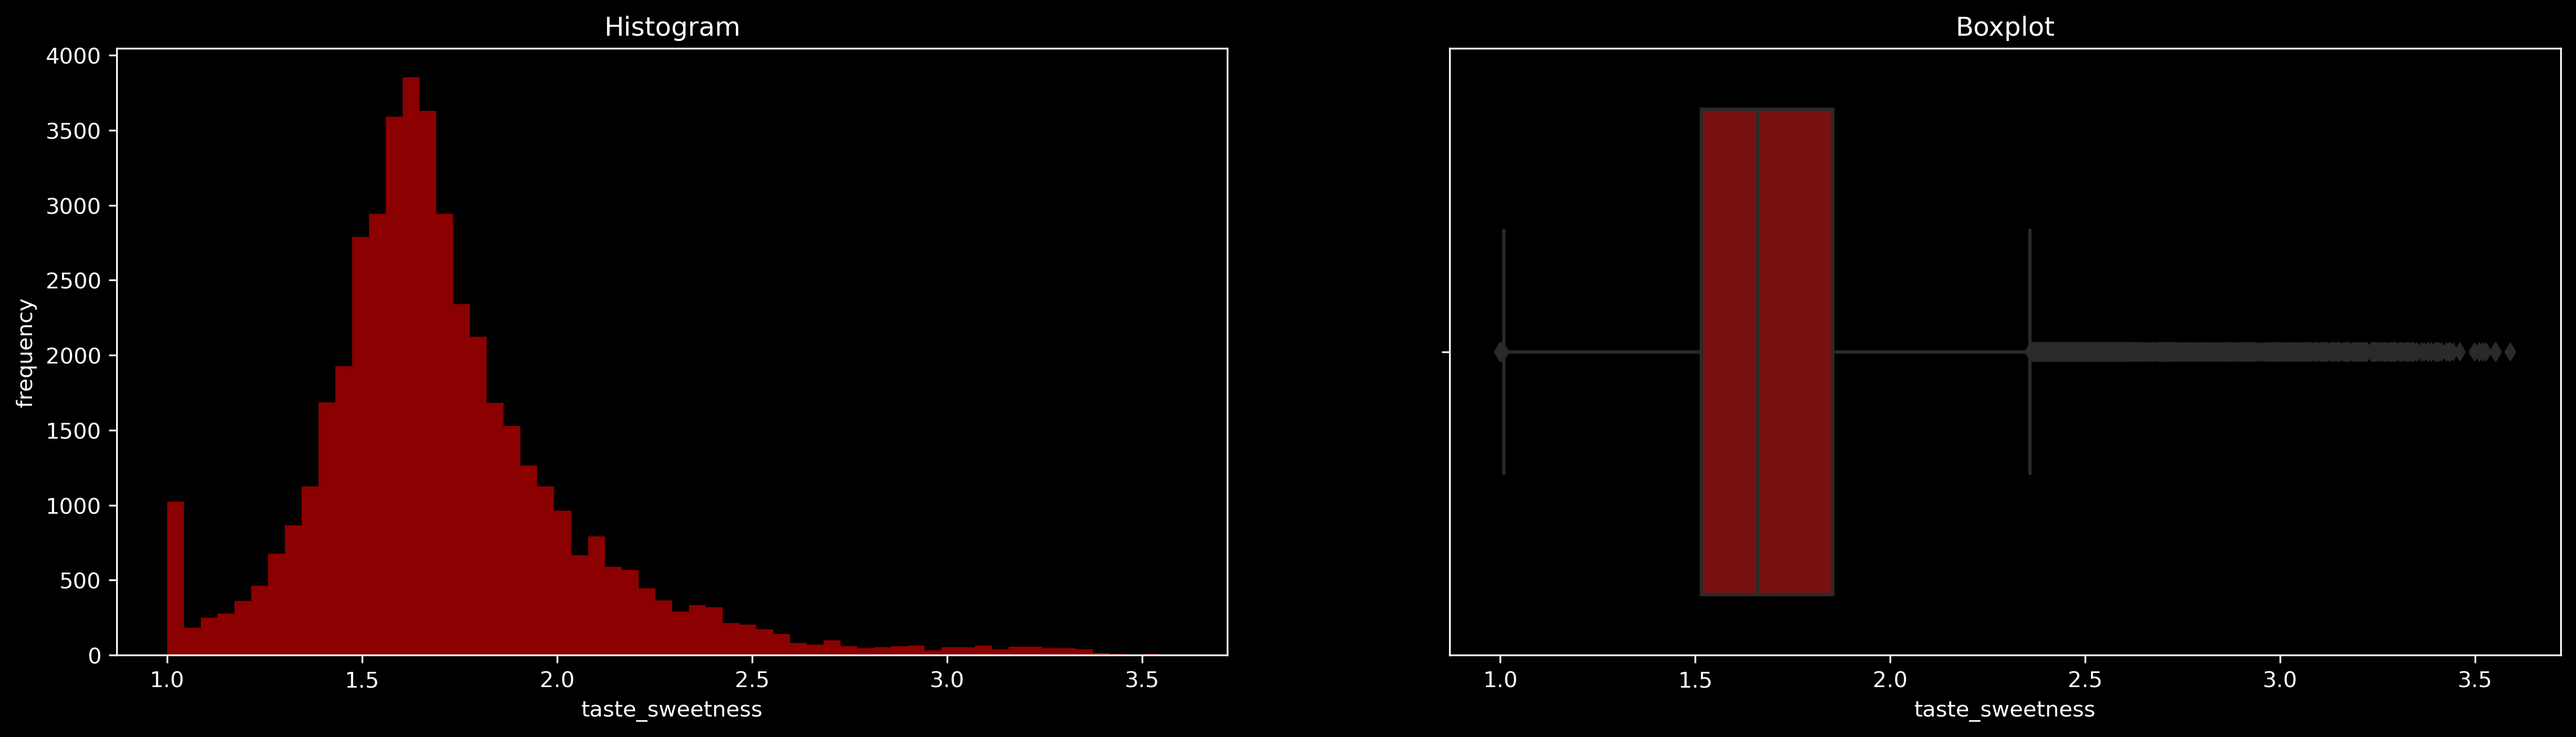

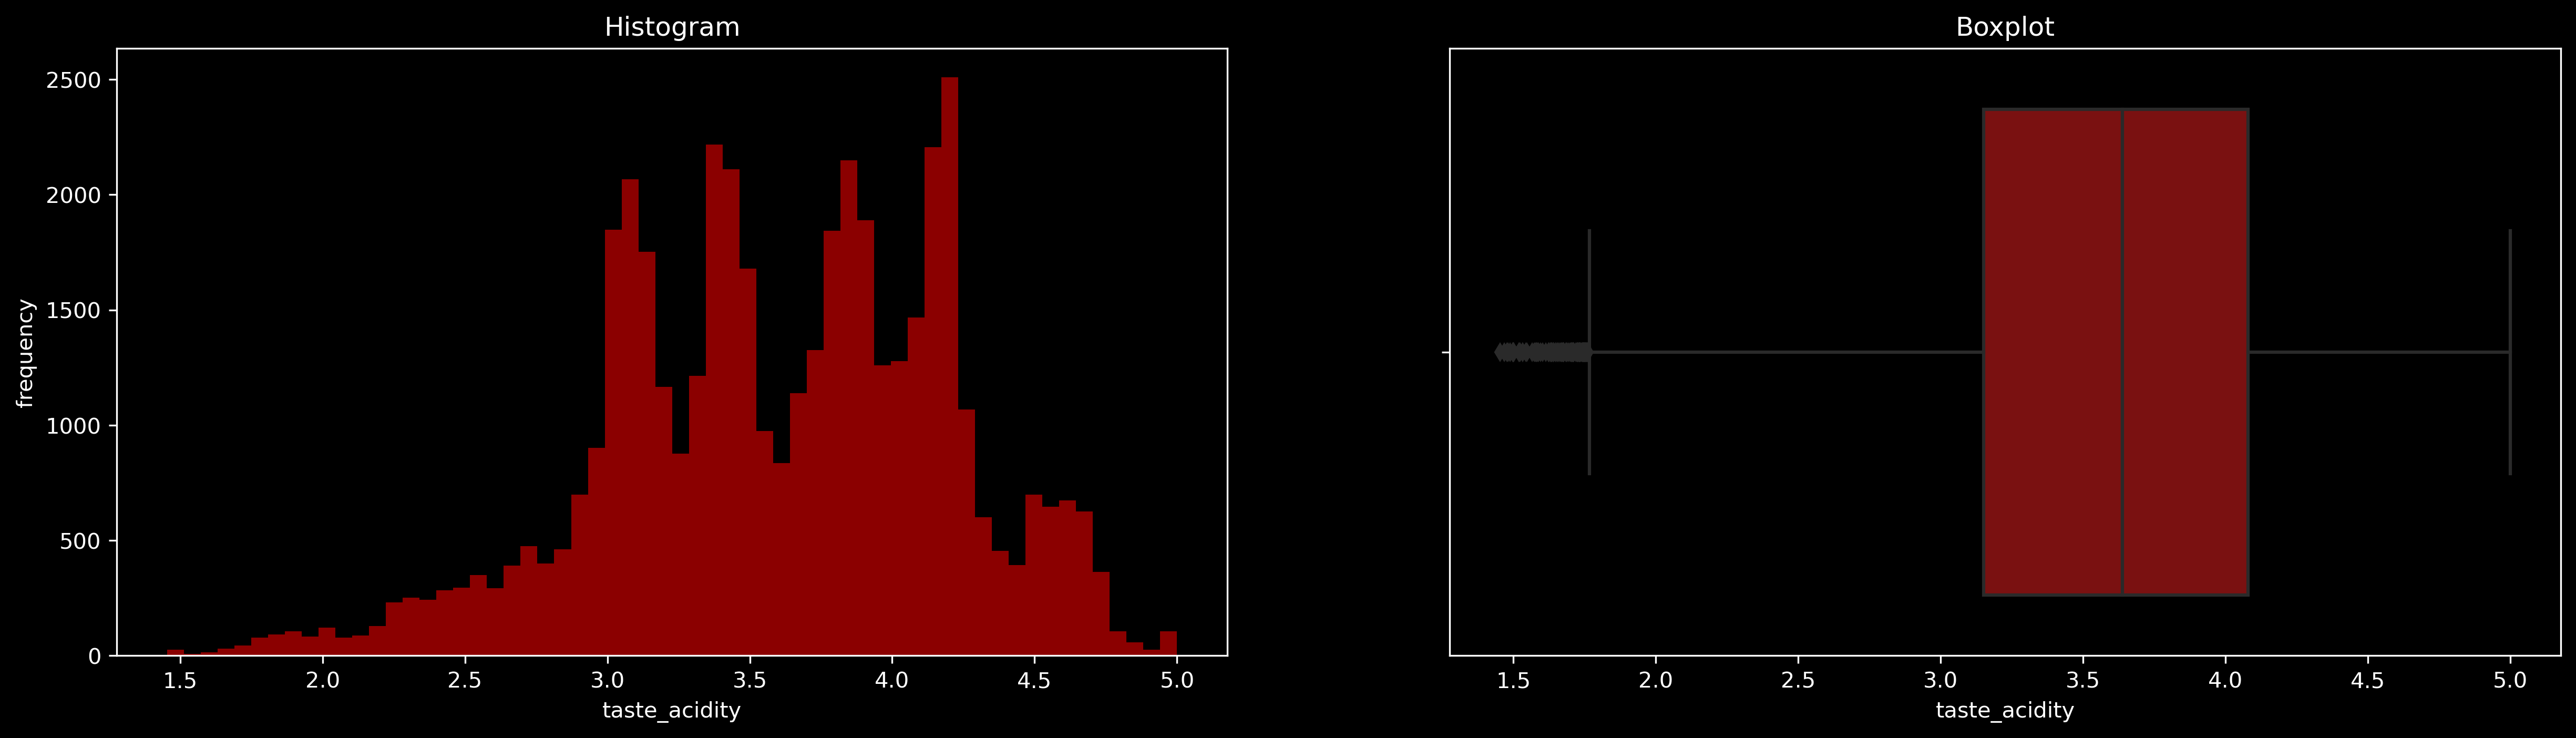

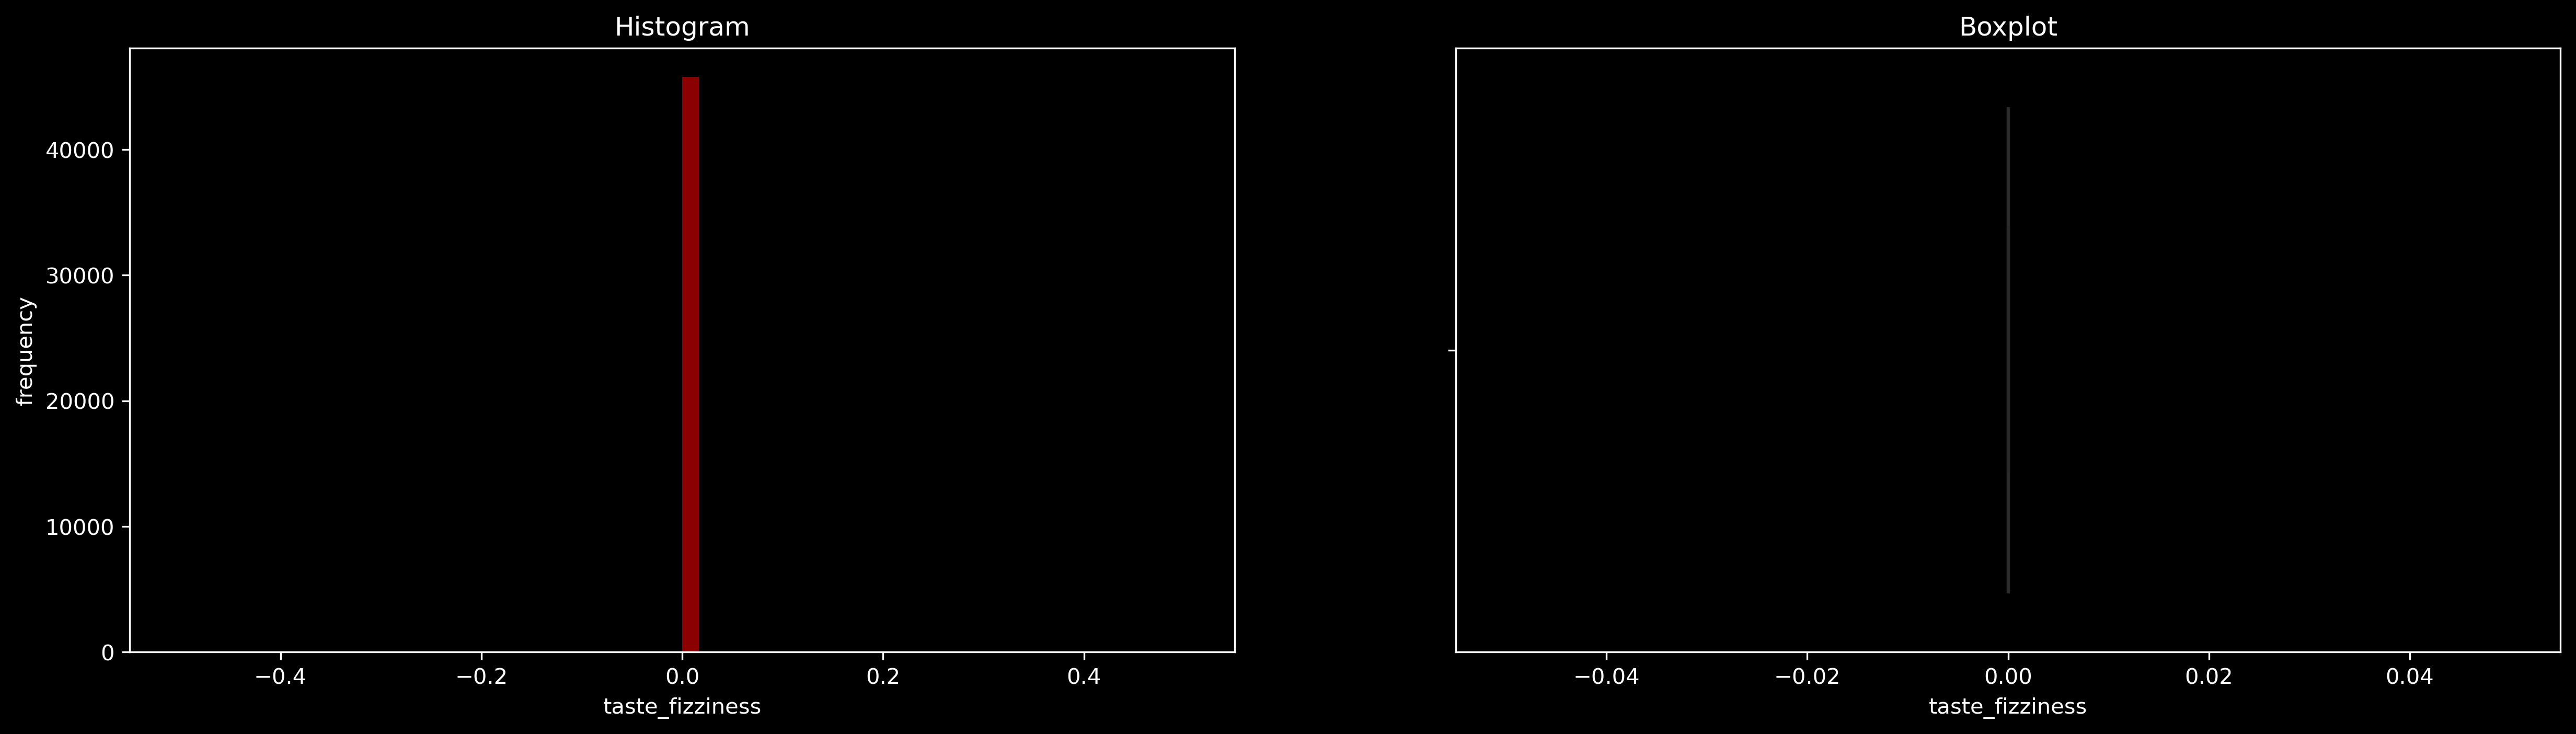

In [29]:
for col in num_df:
    plt.subplots(1, 2, figsize=(20, 5))

    # Plot out the histogram
    plt.subplot(1, 2, 1)
    plt.hist(num_df[col], bins=60, color="darkred")
    plt.title('Histogram')
    plt.xlabel(f'{col}')
    plt.ylabel('frequency')

    # Plot the boxplot. We can use the seaborn boxplot code for this.
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_df[col], color="darkred")
    plt.title('Boxplot')


    plt.show()

In [31]:
num_df['volume'].value_counts()/num_df.shape[0]

volume
750     0.962732
1500    0.027088
375     0.009546
500     0.000350
1000    0.000284
Name: count, dtype: float64

In [20]:
num_df['body'].value_counts()

body
4.0    22426
3.0    11296
5.0     8229
2.0     3812
1.0       13
Name: count, dtype: int64

In [32]:
num_df.columns

Index(['year', 'avg_rating_wine', 'num_rating_wine', 'avg_rating_wine_year',
       'num_rating_wine_year', 'price', 'volume', 'body', 'taste_intensity',
       'taste_tannin', 'taste_sweetness', 'taste_acidity', 'taste_fizziness'],
      dtype='object')

**Analysis:**

`year`:
- The dataset includes wines ranging from 1891 to 2023, with an average age of 10 years (as of 2014). The median wine year is higher with 2018. 
- The distribution of the years follows an almost exponential pattern, with a higher number of wines from recent years and a lower number of older wines (long tail on the left).

`avg_rating_wine`:
- The overall wine rating ranges from 0 to 4.8, with a mean of 3.96 and a median of 4.2.
- The distribution of ratings is skewed to the left, with a long tail on the left side and a peak at 0. This peak may be due to the fact that the number of ratings for these wines is zero or very low.

`num_rating_wine`:
- The wine ratings range from 0 to 225,978, with an average of almost 6k and a median of only 1,446. 
- The number of wine ratings follow an exponential distribution, with a large number of wines having only a few ratings and a small number of wines having many ratings. This creates a long tail to the right.

`avg_rating_wine_year`:
- The overall wine rating of the specific wine ranges from 0 to 4.9, with a mean of 3.98 and a median of 4.1.
- The distribution of the ratings is skewed to the left, with a long tail on the left side and a high peak at 0. This peak may be due to the fact that the number of ratings for these specific wines is zero or very low.

`num_rating_wine_year`:
- The number of ratings for the specific wine ranges from 0 to over 120k with an average of 912 and a median of only 186.
- The number of wine ratings per year of the wine follow an exponential distribution, with a large number of wines having only a few ratings and a small number of wines having many ratings. This creates a long tail to the right.

`price`:
- The wines are priced between 0.97 and 2510 pounds, with an average price of 103 pounds and a median price of 35 pounds.
- The pricing of wines follows an exponential distribution, with a majority of wines priced between 0 and around 50 pounds, and a small number of wines priced higher.

`volume`:
- 96% of the bottles have a volume of 750ml. Only 1% of the bottles have a smaller volume of 375ml or 500ml and 3% of the bottles have a higher volume of 1000 and 1500ml.

`body`:
- The body range of the wines in this dataset is between 1 and 5, with a median score of 4. The average body score is slightly lower at 3.8.
- The distribution looks left skewed.

`taste_intensity`:
- The taste intensity has a range of 1 to 5. The average intensity is at 3.69. 
- The distribution of taste intensity has two big peaks. The higher peak is around 4.2 and the smaller peak is aound 3. Furthermore, there is a small peak around 4.6.

`taste_tannin`:
- The taste tannin has a range between 1 and 5 with an average at 3.2 and a median at 3.2. The peak of tannin is at 3.5 and the distribution is slightly left skewed.

`taste_sweetness`:
- The sweetness ranges from 1 to 3.6, with an average and median of 1.7. 
- The distribution is slightly skewed to the right, with a peak between 1.5 and 1.8 and a longer tail on the right. There is also a high peak on the left at sweetness level 1.

`taste_acidity`:
- The acidity of the sample ranges from 0.6 to 5, with an average and median of 3.6. The distribution shows four peaks, with the largest at around 4.2, the second and thrid at around 3.8 and 3.4, and a small peak at 3.1.

`taste_fizziness`:
- The fizziness of all red wines in this dataset is 0.


### Deep Dive: Target Column `avg_rating_wine_year`

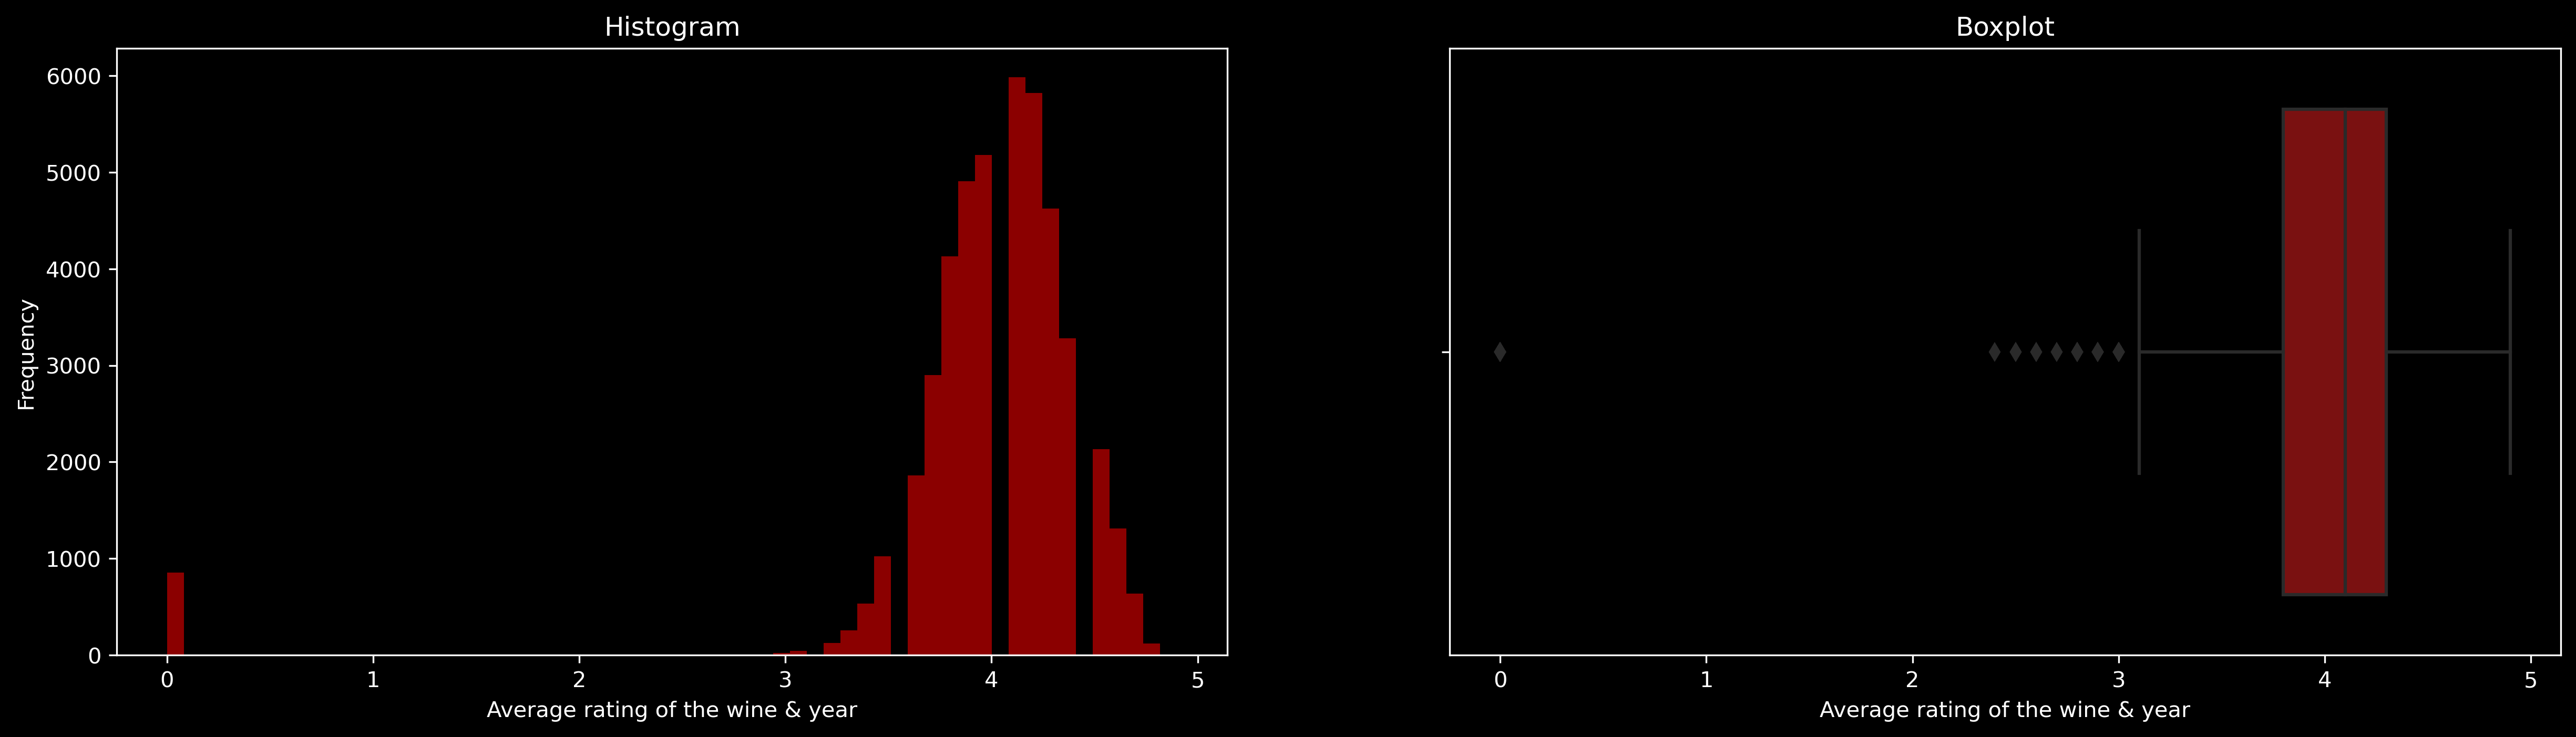

In [33]:
rating = num_df['avg_rating_wine_year']

plt.subplots(1, 2, figsize=(20, 5), dpi=300)

# Plot out the histogram
plt.subplot(1, 2, 1)
plt.hist(rating, bins=60, color="darkred")
plt.title('Histogram')
plt.xlabel('Average rating of the wine & year')
plt.ylabel('Frequency')

# Plot the boxplot. We can use the seaborn boxplot code for this.
plt.subplot(1, 2, 2)
sns.boxplot(x=rating, color="darkred")
plt.xlabel('Average rating of the wine & year')
plt.title('Boxplot')


plt.show()

In [34]:
num_df_50 = num_df[num_df['num_rating_wine_year'] > 50]

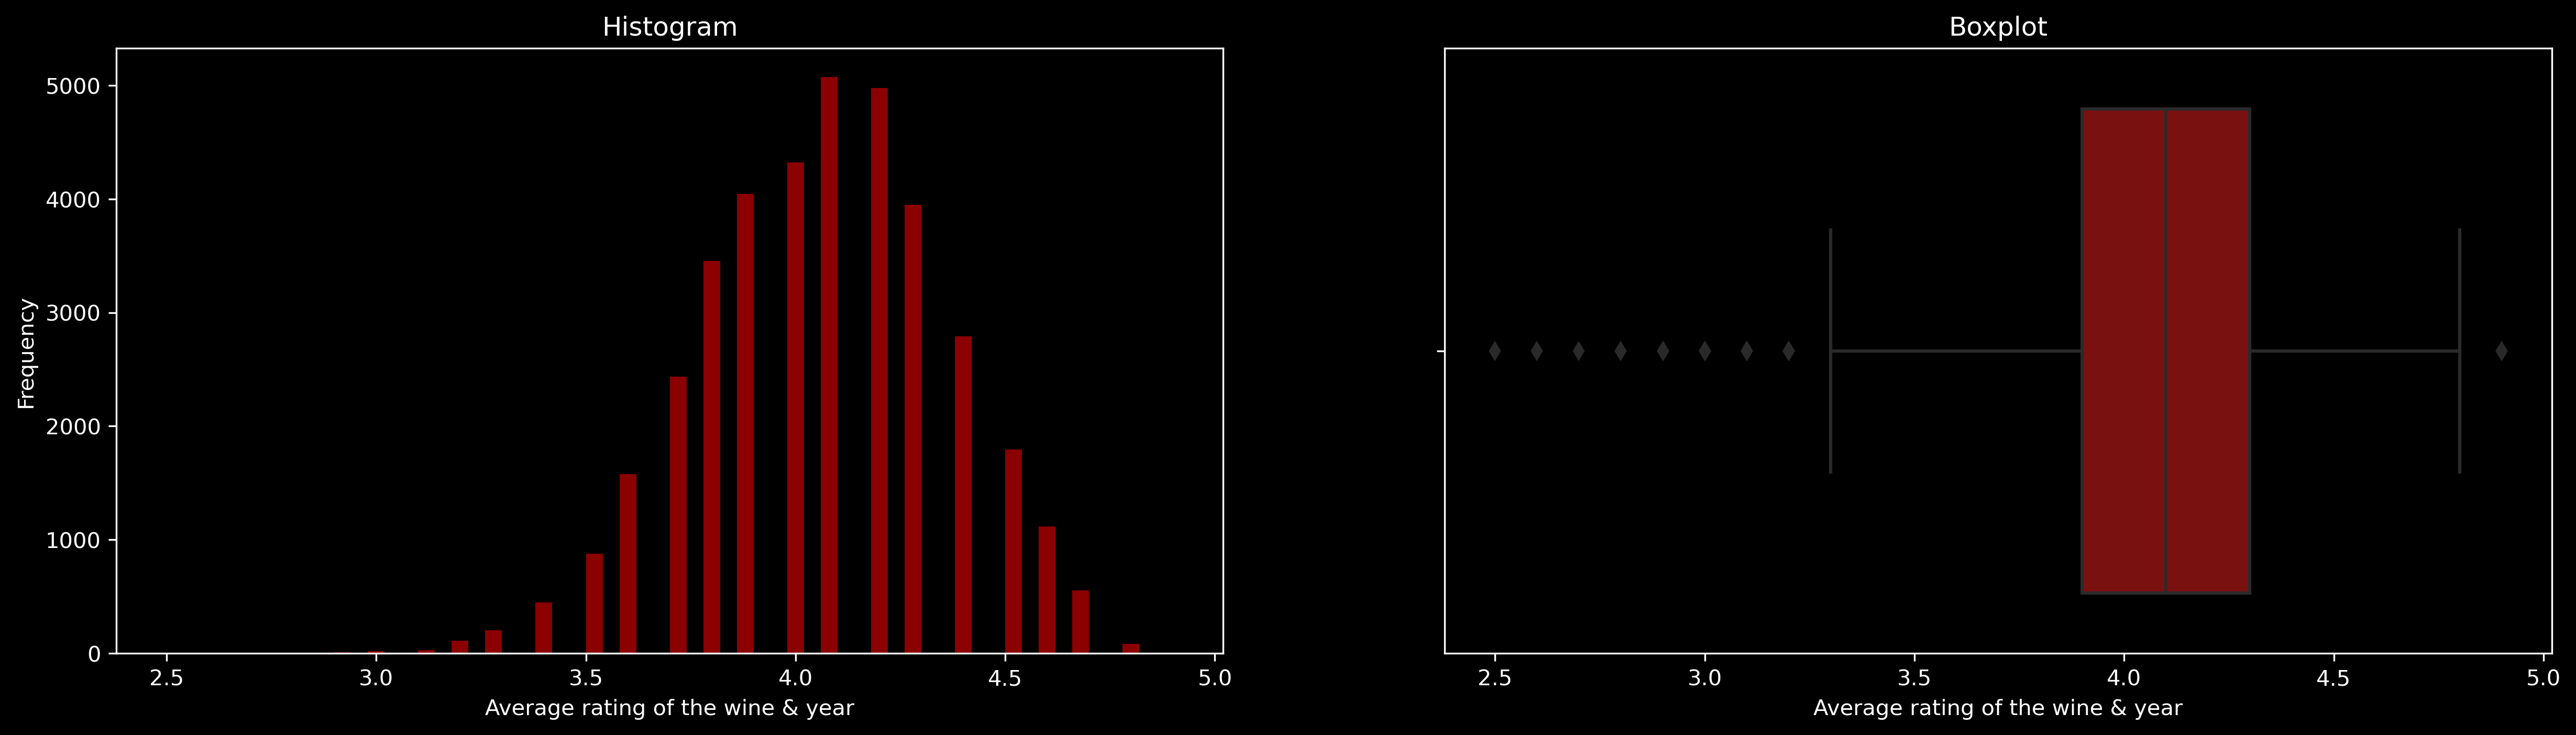

In [35]:
rating_50 = num_df_50['avg_rating_wine_year']

plt.subplots(1, 2, figsize=(20, 5), dpi=300)

# Plot out the histogram
plt.subplot(1, 2, 1)
plt.hist(rating_50, bins=60, color="darkred")
plt.title('Histogram')
plt.xlabel('Average rating of the wine & year')
plt.ylabel('Frequency')

# Plot the boxplot. We can use the seaborn boxplot code for this.
plt.subplot(1, 2, 2)
sns.boxplot(x=rating_50, color="darkred")
plt.xlabel('Average rating of the wine & year')
plt.title('Boxplot')


plt.show()

In [36]:
rating_50.describe()

count    37891.000000
mean         4.062374
std          0.297686
min          2.500000
25%          3.900000
50%          4.100000
75%          4.300000
max          4.900000
Name: avg_rating_wine_year, dtype: float64

**Analysis:**

`avg_rating_wine_year` with over 50 reviews:
- The distribution of the average rating from a specific wine with over 50 reviews is still slightly skwed to the left. However, the median and mean are closer together, therefore the standard deviation is smaller. The range is also only between 2.5 to 4.9.

***

# Advanced EDA <a id="b3"></a>

First, I am looking between correlations between numerical columns with a heatmap.

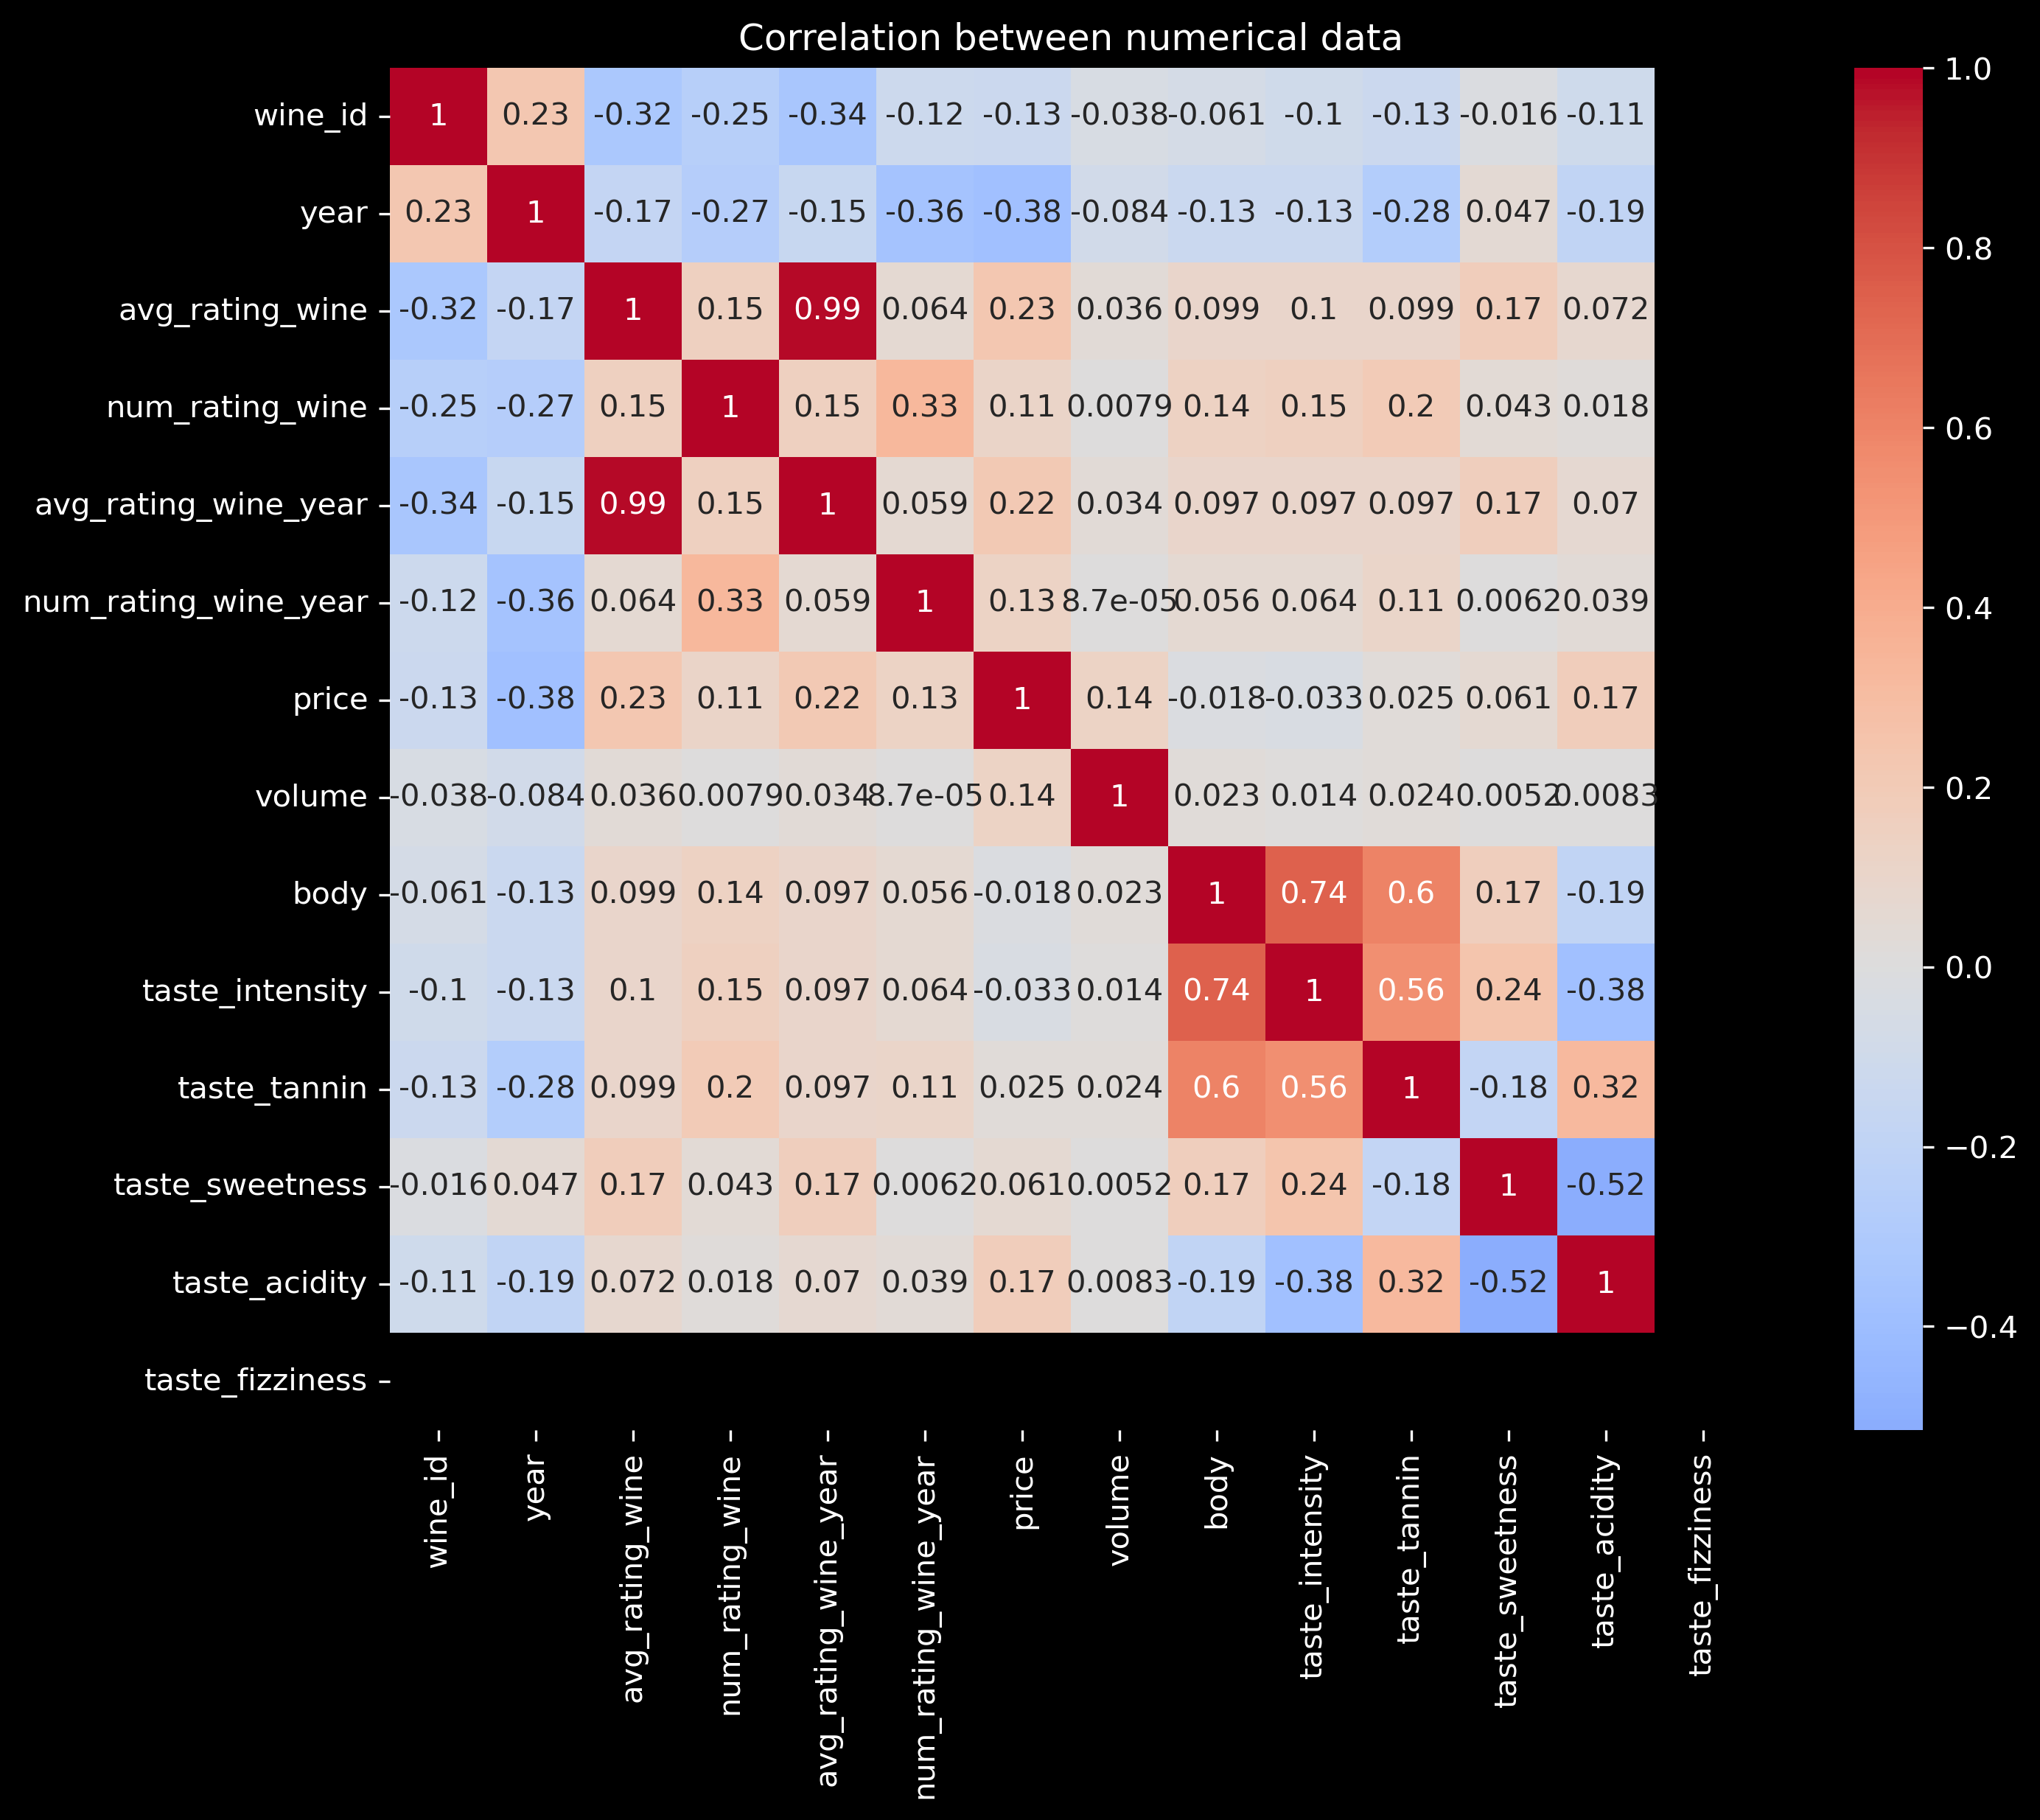

In [57]:
# Heatmap
plt.figure(figsize=(12,8), dpi=300)
sns.heatmap(df.corr(numeric_only = True), cmap='coolwarm', annot=True, square=True, center = 0)
plt.title('Correlation between numerical data')
plt.show()

- The taste data `body`, `taste_intensity` and `taste tannin` are strongly positive correlated. 
- The `num_rating_wine_year` and `num_rating_wine` are positive correlated, since the first one is part of the second one.
- Other positive correlations are: `taste_sweetness` and `avg_rating_wine`, `taste_tannin` and `num_rating_wine`
- Other negative correlations are:`num_ratin_wine` and `year`, `price` and `year`, `taste_intensity` and `taste_acidity`, `body` and `taste_acidity`

## Price vs. Year

One question to consider is whether older wine is more expensive.

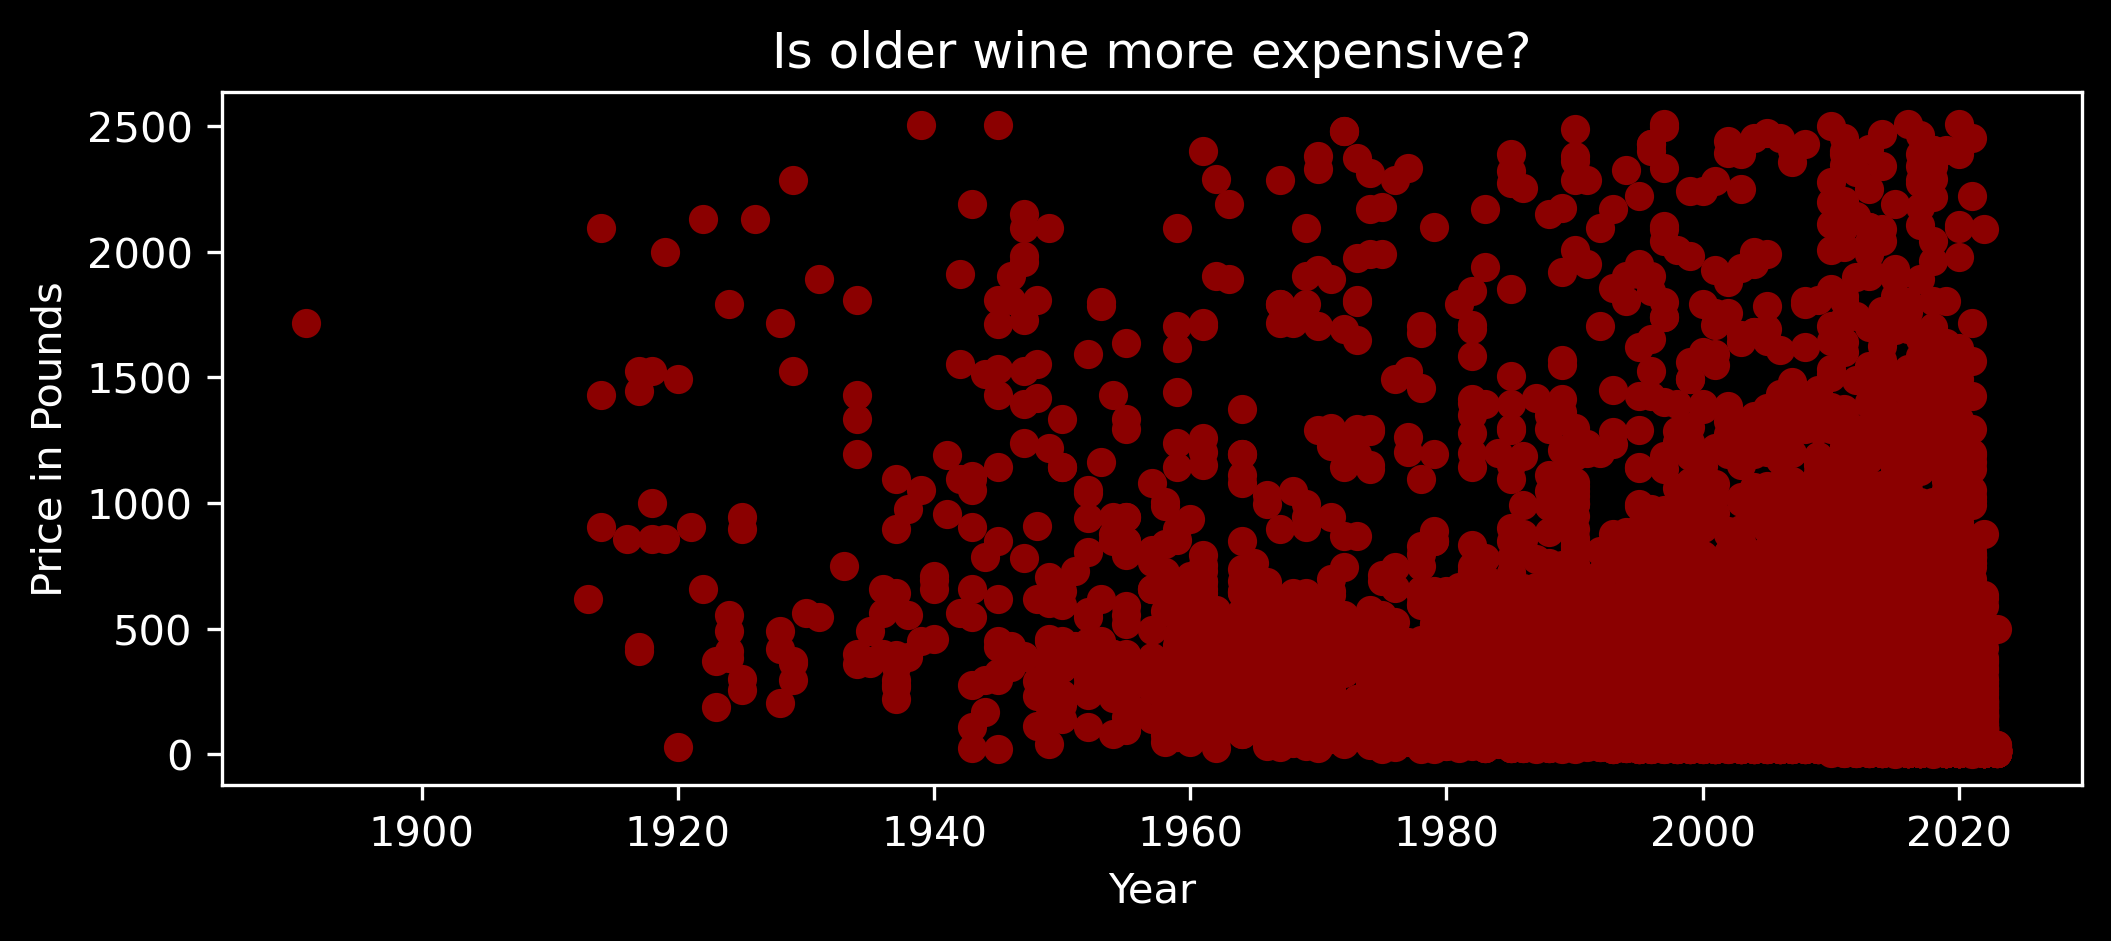

In [58]:
plt.figure()
plt.scatter(df['year'], df['price'], c = "darkred")
plt.title('Is older wine more expensive?')
plt.xlabel('Year')
plt.ylabel('Price in Pounds')
plt.show()

There appears to be a correlation between price and age of wine, but there are exceptions. Some expensive wines are not very old, and there 
are also some very cheap wines that appear to be older than 1940. This raises concerns about data quality, which requires further investigation.

In [47]:
df[(df['year'] < 2010) & (df['price'] < 10)]

wine_id                            wine_name  \
index                                                        
1101361_1992  1101361          Les Poyeux Saumur Champigny   
1186041_1959  1186041      Clos de Tart Grand Cru Monopole   
1099538_1929  1099538                              Pomerol   
79235_1993      79235                        Vosne-Romanée   
87560_1999      87560     La Pialade  Côtes du Rhône Rouge   
87560_1994      87560     La Pialade  Côtes du Rhône Rouge   
87560_1992      87560     La Pialade  Côtes du Rhône Rouge   
87560_1996      87560     La Pialade  Côtes du Rhône Rouge   
87560_1988      87560     La Pialade  Côtes du Rhône Rouge   
84732_1948      84732          Clos des Lambrays Grand Cru   
87560_1989      87560     La Pialade  Côtes du Rhône Rouge   
87560_1974      87560     La Pialade  Côtes du Rhône Rouge   
87560_1990      87560     La Pialade  Côtes du Rhône Rouge   
81849_1928      81849                              Pomerol   
1138012_1999  1138012                       Pessac-Léognan   
1457004_2007  1457004                        Reserva Tinto   
4291197_2008  4291197                              Reserva   
1186782_2005  1186782            Ferruggini Bolgheri Rosso   
1158925_2007  1158925  Le Haut-Médoc de Haut-Bages Liberal   
1141782_1908  1141782                           Pinot Noir   
1836142_2006  1836142                   Bordeaux Supérieur   
1111491_2000  1111491              Saint-Émilion Grand Cru   
1101459_2001  1101459           Francs - Côtes de Bordeaux   
83528_2004      83528                              Antares   
1105691_2006  1105691                           Haut-Médoc   
5232107_2008  5232107                            Bardolino   
2567810_2002  2567810                               Merlot   
78248_2009      78248                           Pinot Noir   
1644714_2009  1644714              Contra a Corrente Tinto   
1305053_1958  1305053                                Rouge   

                                  winery  year   country  \
index                                                      
1101361_1992               Clos Rougeard  1992    France   
1186041_1959     Domaine du Clos de Tart  1959    France   
1099538_1929    Château Latour à Pomerol  1929    France   
79235_1993                   Méo-Camuzet  1993    France   
87560_1999                 Château Rayas  1999    France   
87560_1994                 Château Rayas  1994    France   
87560_1992                 Château Rayas  1992    France   
87560_1996                 Château Rayas  1996    France   
87560_1988                 Château Rayas  1988    France   
84732_1948          Domaine des Lambrays  1948    France   
87560_1989                 Château Rayas  1989    France   
87560_1974                 Château Rayas  1974    France   
87560_1990                 Château Rayas  1990    France   
81849_1928          Vieux Château Certan  1928    France   
1138012_1999  Château Gazin Rocquencourt  1999    France   
1457004_2007                      Estopa  2007  Portugal   
4291197_2008                   Dom Dinis  2008  Portugal   
1186782_2005          Giovanni Chiappini  2005     Italy   
1158925_2007  Château Haut-Bages Libéral  2007    France   
1141782_1908               Cielo e Terra  1908     Italy   
1836142_2006              Château Vieira  2006    France   
1111491_2000        Château Haut-Plantey  2000    France   
1101459_2001              Château Marsau  2001    France   
83528_2004               Mercouri Estate  2004    Greece   
1105691_2006             Château Arnauld  2006    France   
5232107_2008            Cantina di Soave  2008     Italy   
2567810_2002               Nico Lazaridi  2002    Greece   
78248_2009                    Campolargo  2009  Portugal   
1644714_2009                  Campolargo  2009  Portugal   
1305053_1958           58 Guineas Claret  1958    France   

                                  region  avg_rating_wine  num_rating_wine  \
index                         

The Vivino app also displays a lower price. However, I suspect that this may be a data quality issue and I will delete the wines. I expect that there are no wines under 20 pounds that are older than 2010.

In [48]:
# set index
wine_index = df[(df['year'] < 2010) & (df['price'] < 20)].index

In [49]:
# Drop rows
df.drop(wine_index, inplace = True)

In [50]:
# Save csv
df.to_csv('data/data_clean.csv')

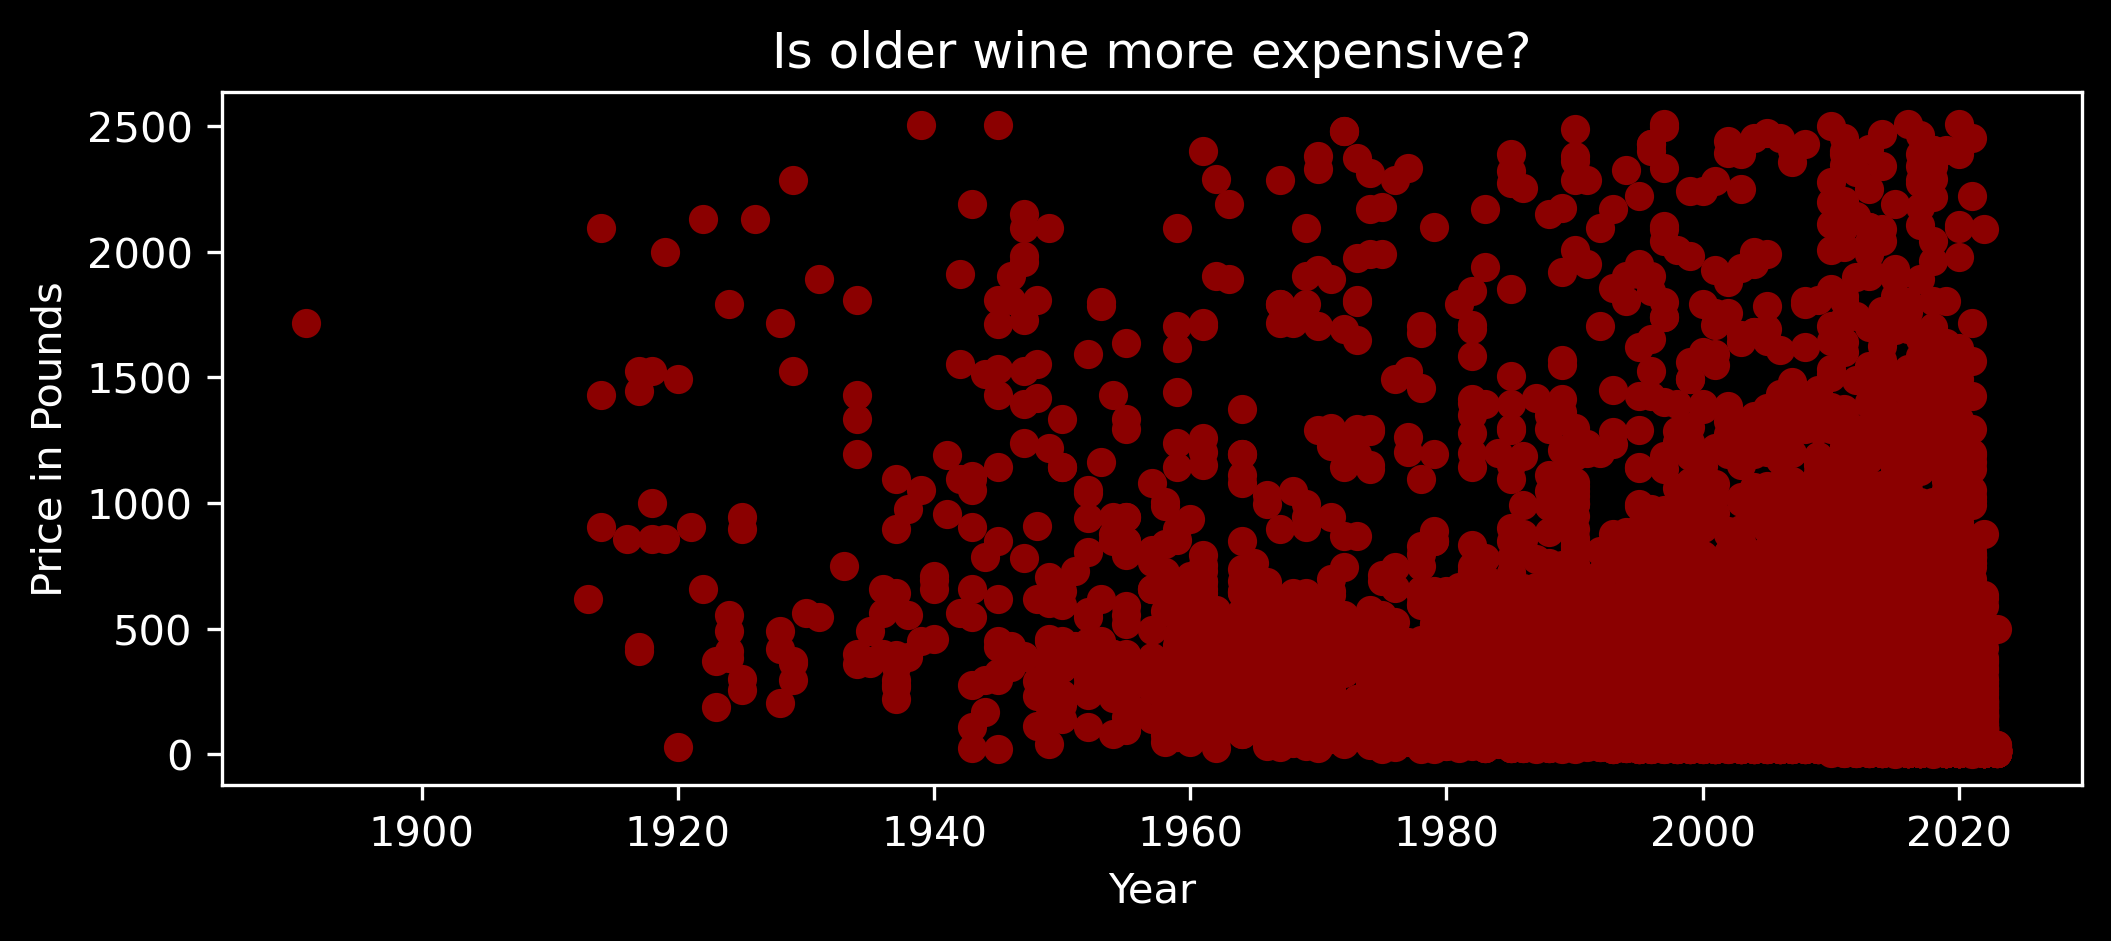

In [59]:
plt.figure()
plt.scatter(df['year'], df['price'], c = "darkred")
plt.title('Is older wine more expensive?')
plt.xlabel('Year')
plt.ylabel('Price in Pounds')
plt.show()

## Deep Dive Taste

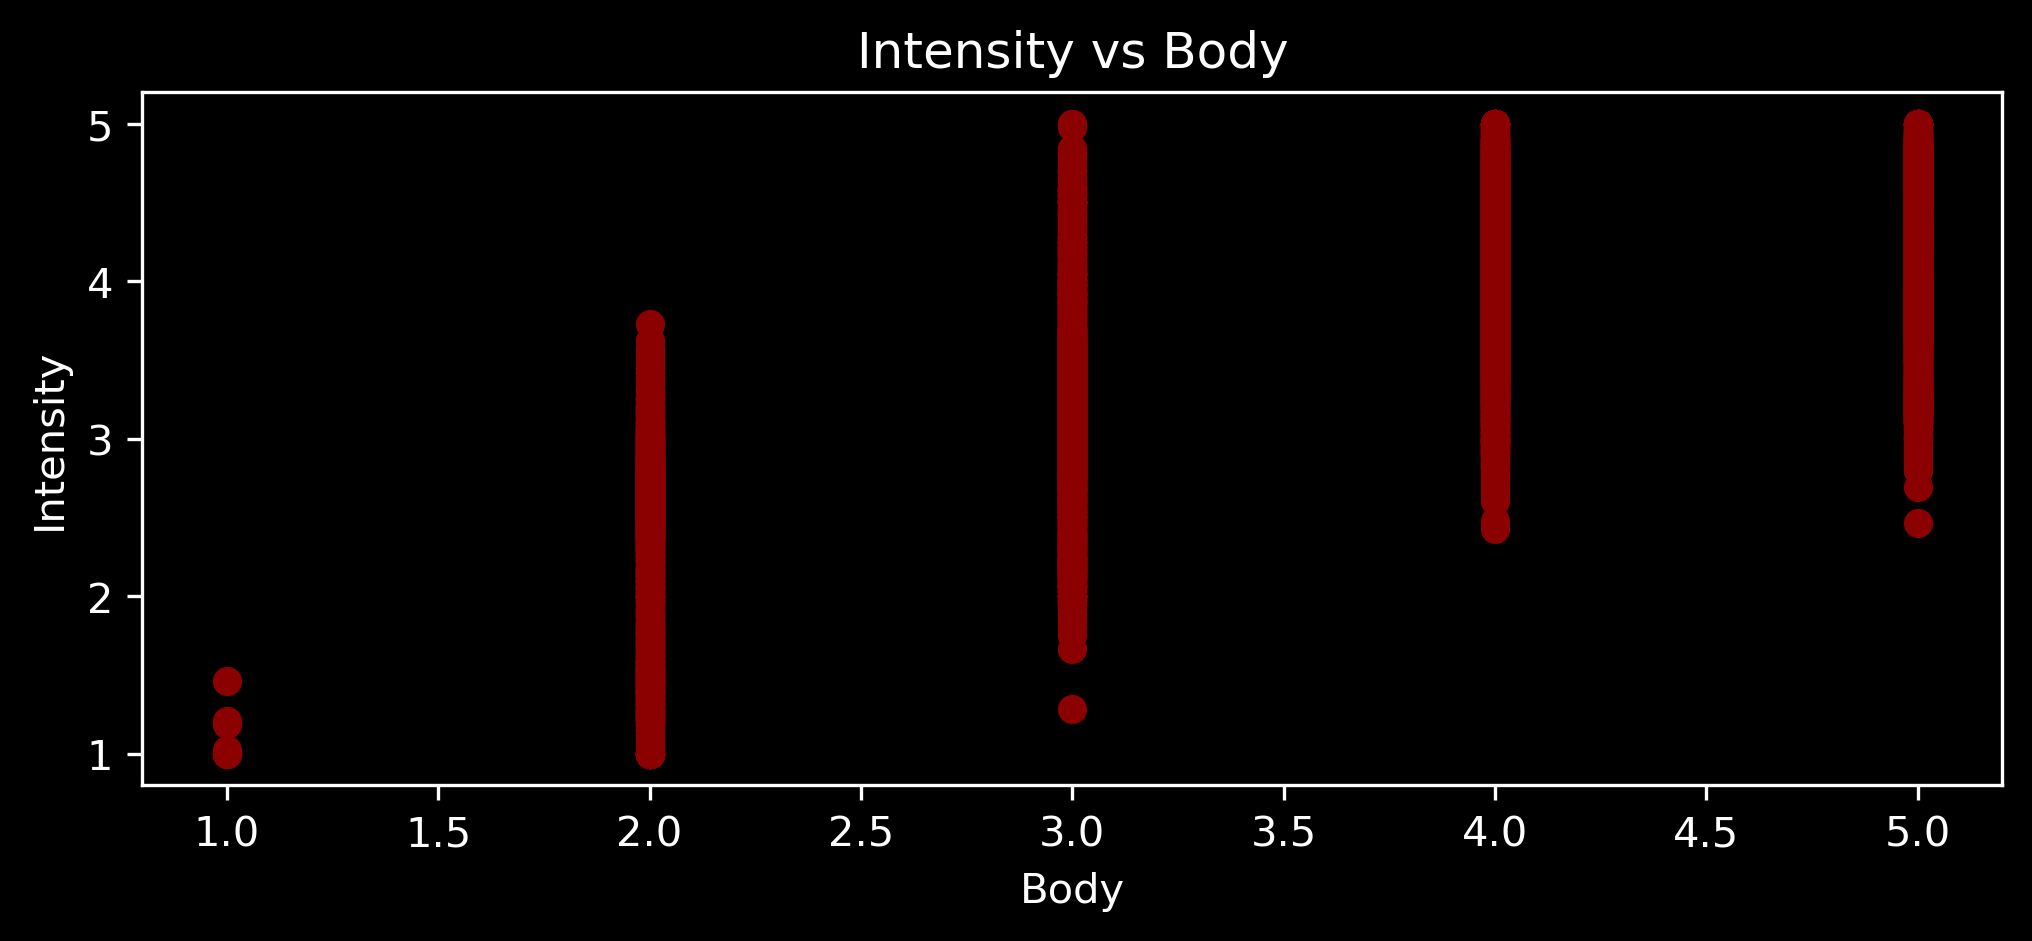

In [60]:
plt.scatter(num_df['body'], num_df['taste_intensity'], c = "darkred")
plt.title('Intensity vs Body')
plt.xlabel('Body')
plt.ylabel('Intensity')
plt.show()

**Key Findings:**
- There seem to be a linear relationship between body and intensity. As intensity increases, so does body.

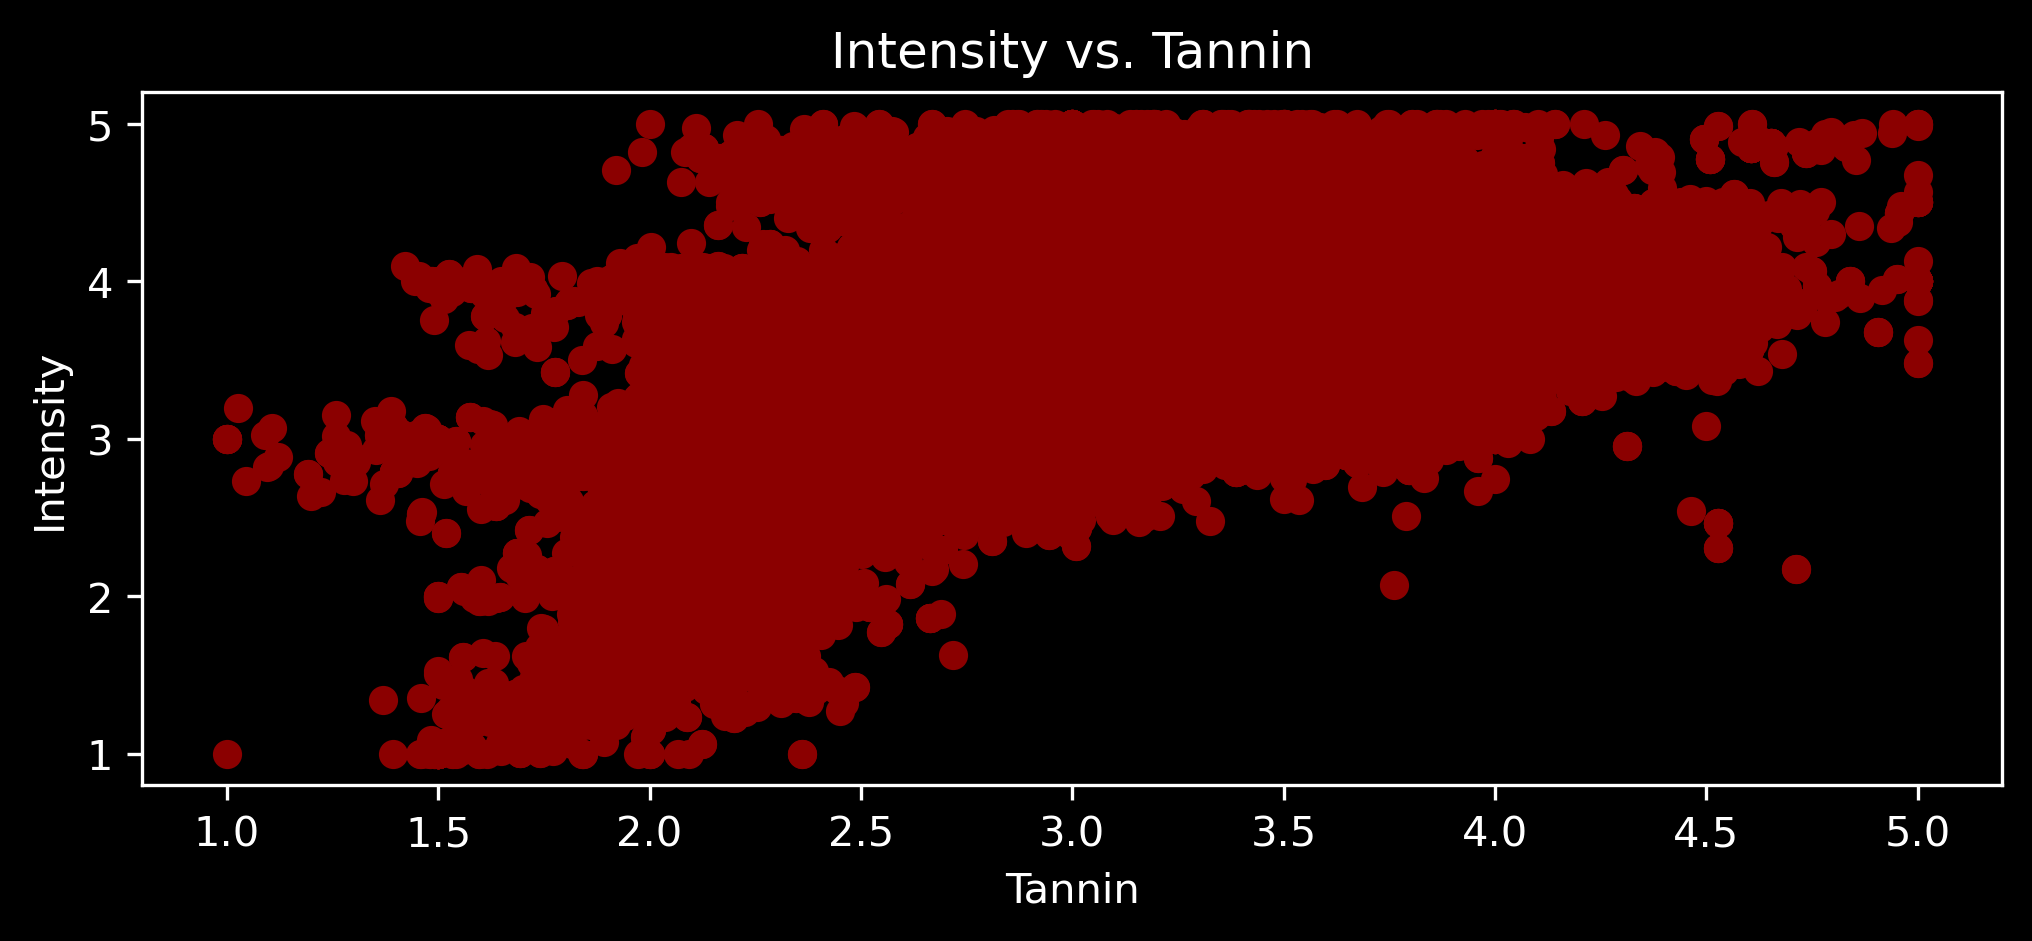

In [61]:
plt.scatter(num_df['taste_tannin'], num_df['taste_intensity'], c = "darkred")
plt.title('Intensity vs. Tannin')
plt.xlabel('Tannin')
plt.ylabel('Intensity')
plt.show()

**Key Findings:**
- There seem to be a linear relationship between tannin and intensity. As intensity increases, so does tannin.

In [103]:
# Average taste profil of a wine

taste_chart = pd.DataFrame(dict(
    r=[num_df['body'].mean(), num_df['taste_intensity'].mean(), num_df['taste_tannin'].mean(), num_df['taste_sweetness'].mean(), num_df['taste_acidity'].mean()],
    theta=['Body','Intensity','Tannin',
           'Sweetness', 'Acidity']))

# Create the polar chart
fig = px.line_polar(taste_chart, r='r', theta='theta', line_close=True, title='Average Taste Profile of Red Wine')

# Update traces with lighter red font color and line color
fig.update_traces(fill='toself', line=dict(color='darkred'))

# Update layout to change font color and inside color of the polar chart
fig.update_layout(
    font=dict(color="darkred", size=25),
    polar=dict(
        bgcolor='black',
          radialaxis=dict(
      visible=True,
      range=[1, 5],
      dtick=1 
    ))
)

fig.show()

In [104]:
#Save Figure
pio.write_image(fig, 'data/fig_taste.png', scale = 10)

**Key Findings:**
- The graph shows the average taste profile of the red wine. 
- Red wine is on average low in sweetness (less than 2) and high in acidity, body and intensity. Tannin is just over 3.

## Relations to `avg_rating_wine_year`

To analyse the target with other columns, I will plot them. Additionally, I will compare the results of including all wines versus only those with over 50 reviews.

In [107]:
num_df_50 = num_df[num_df['num_rating_wine_year'] > 50]

In [108]:
X = num_df_50.drop(columns='avg_rating_wine_year')
y = num_df_50['avg_rating_wine_year']

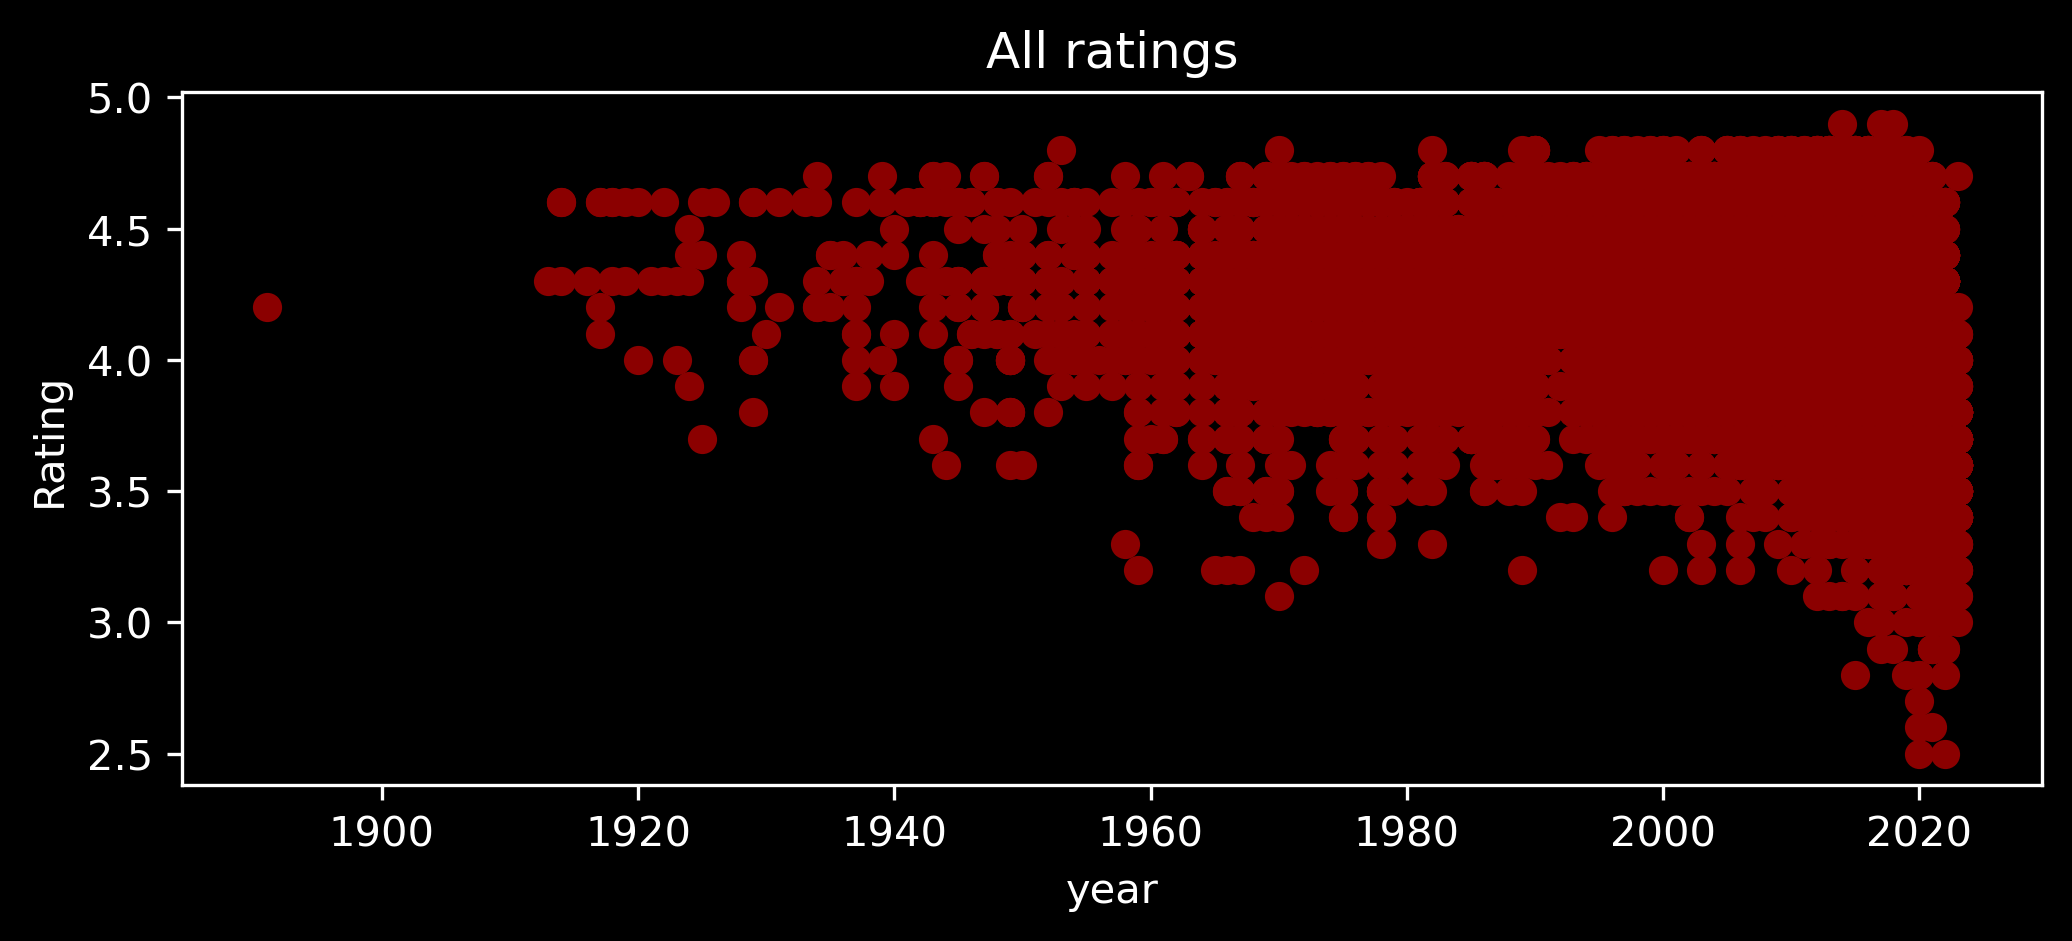

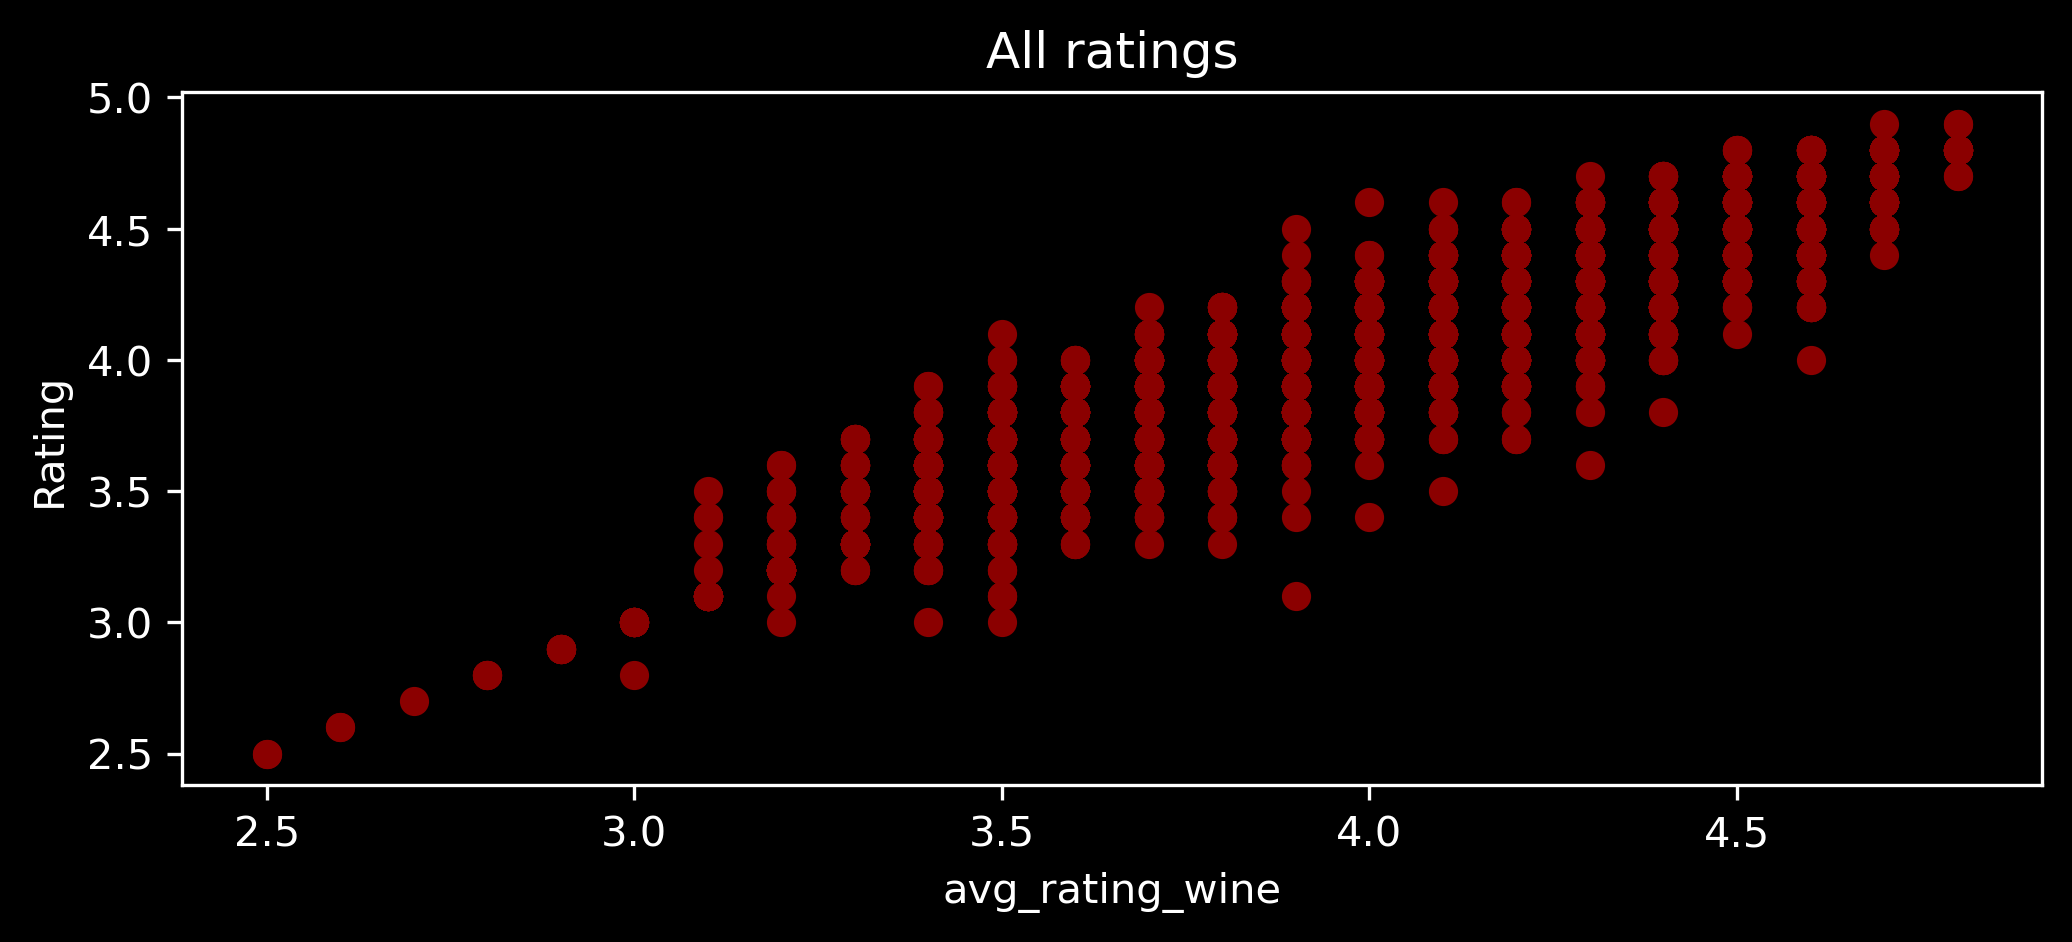

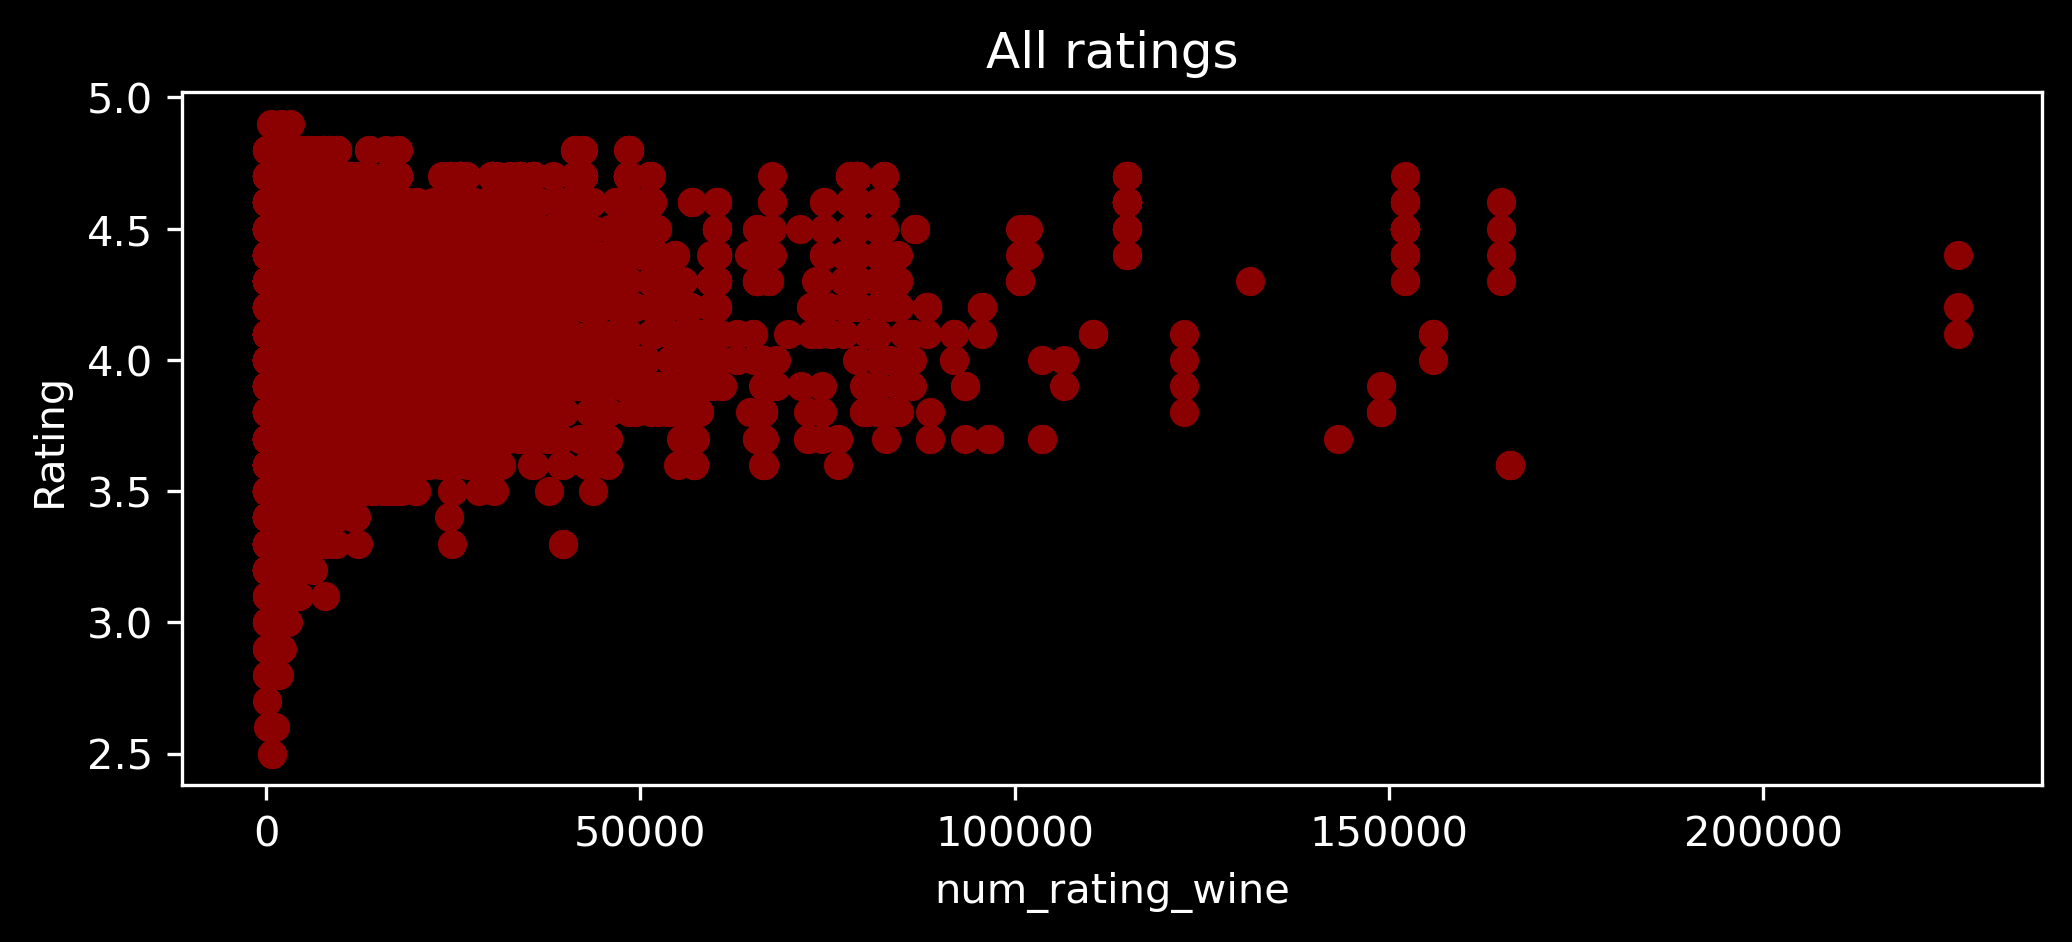

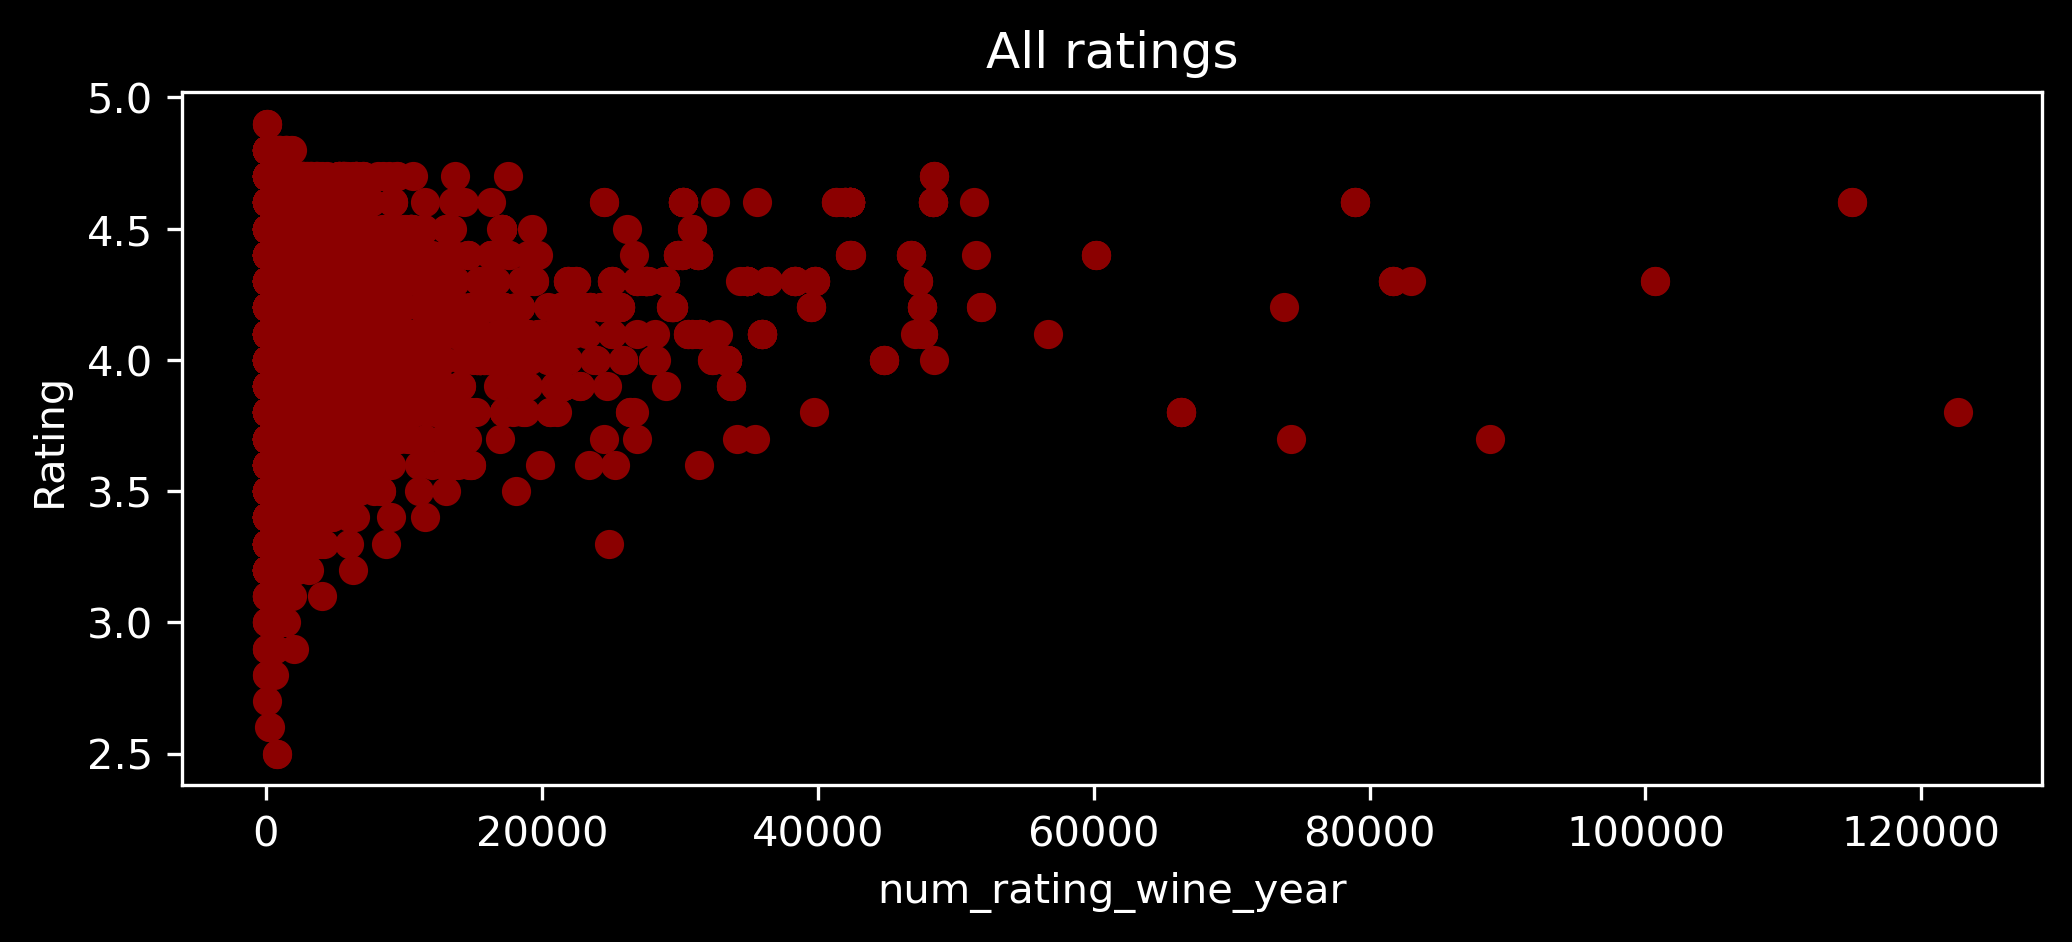

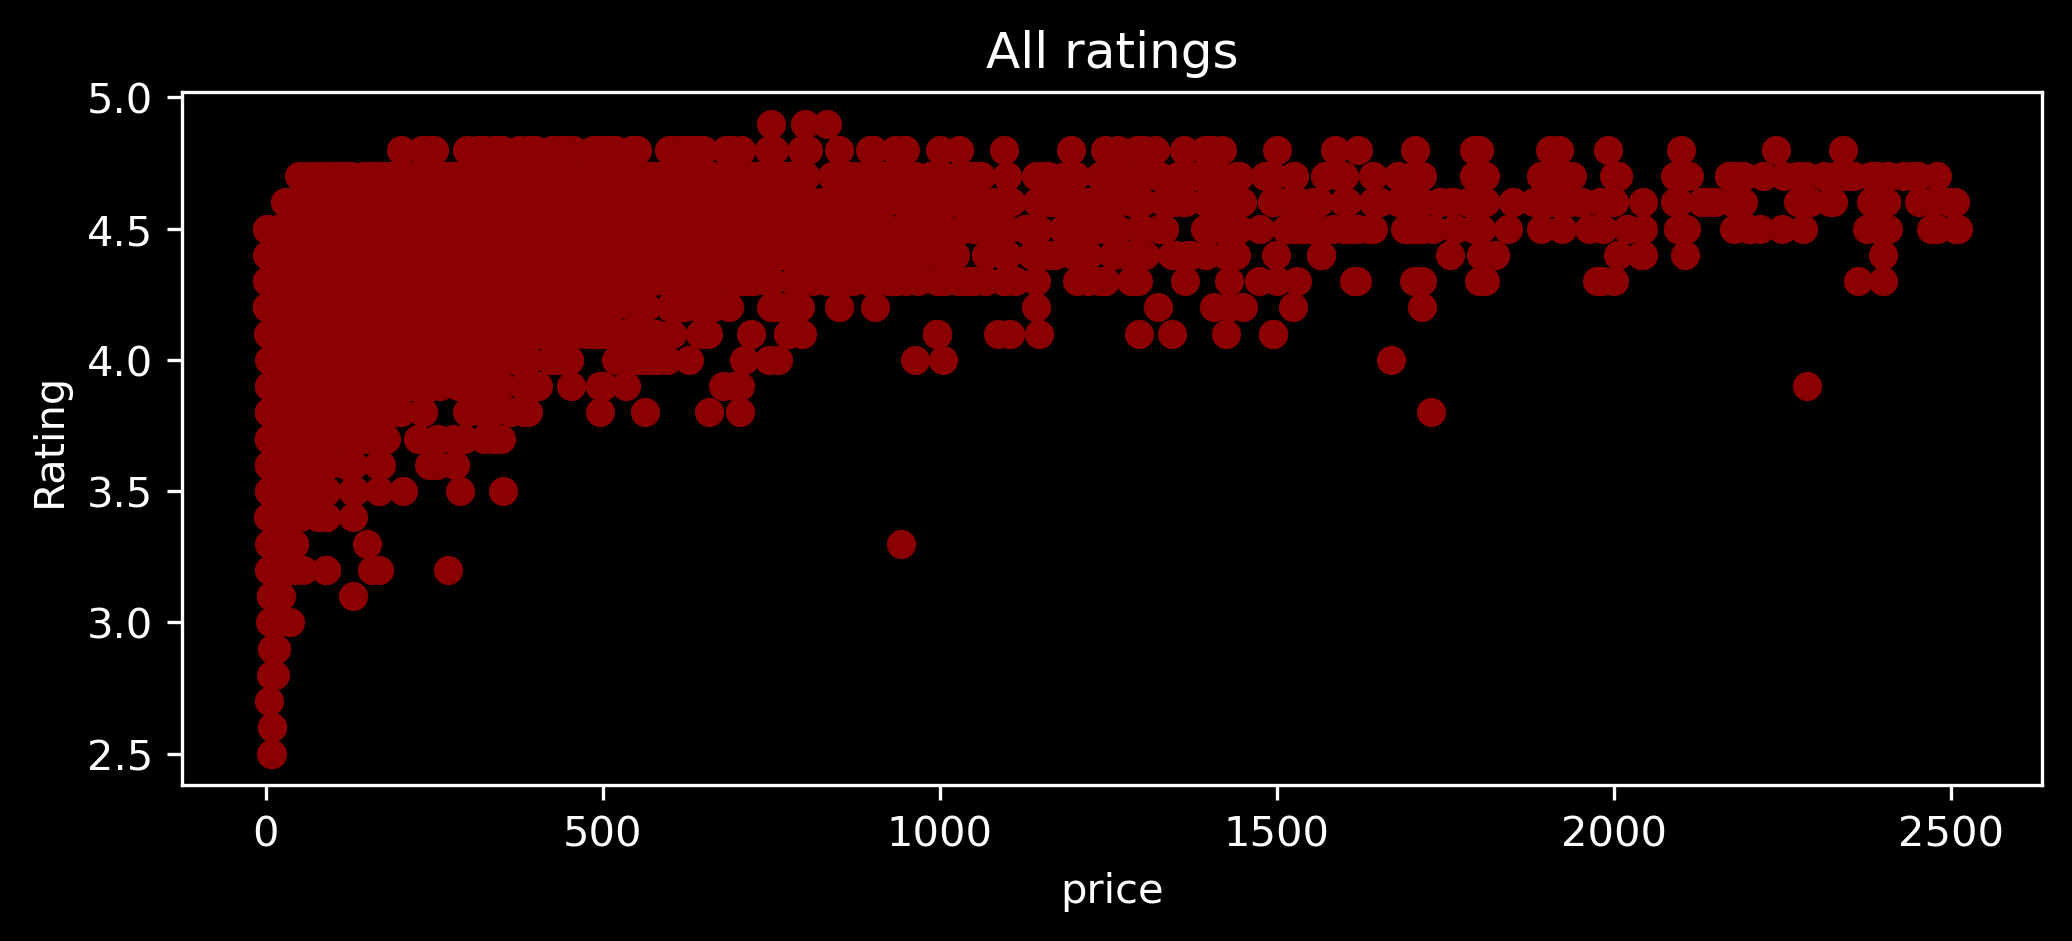

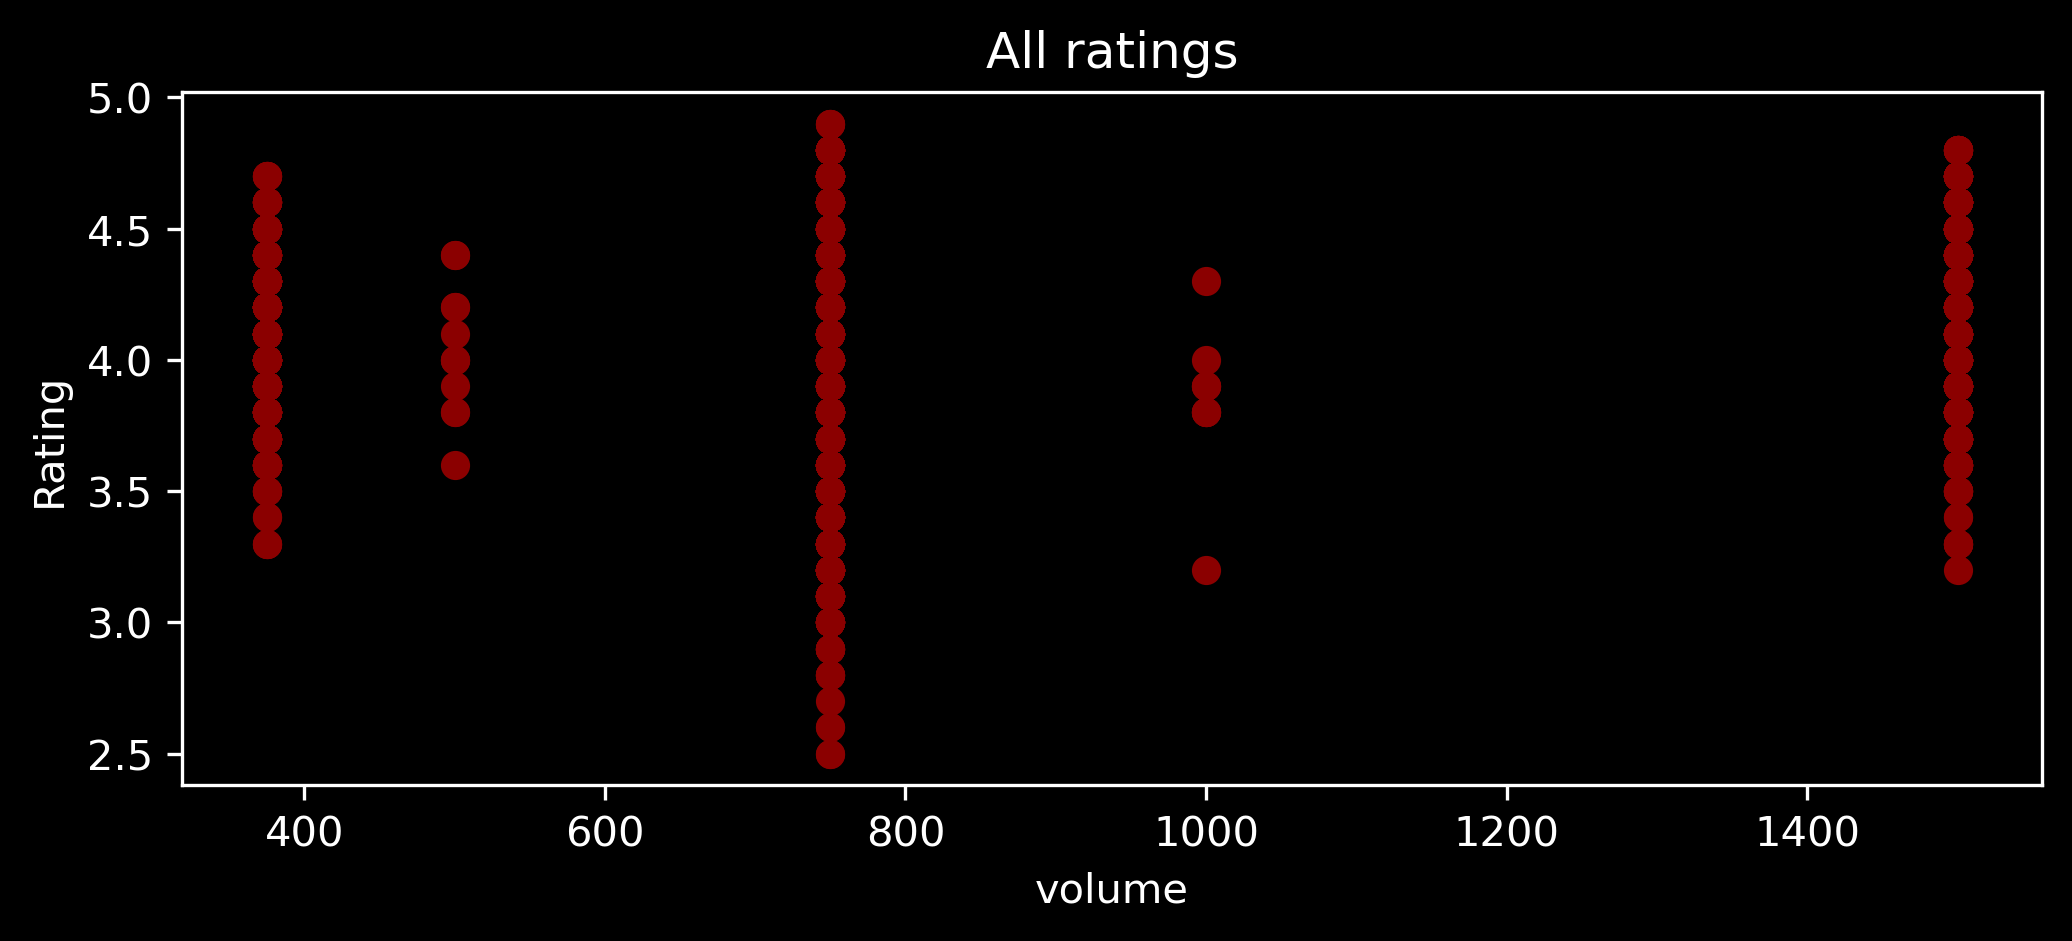

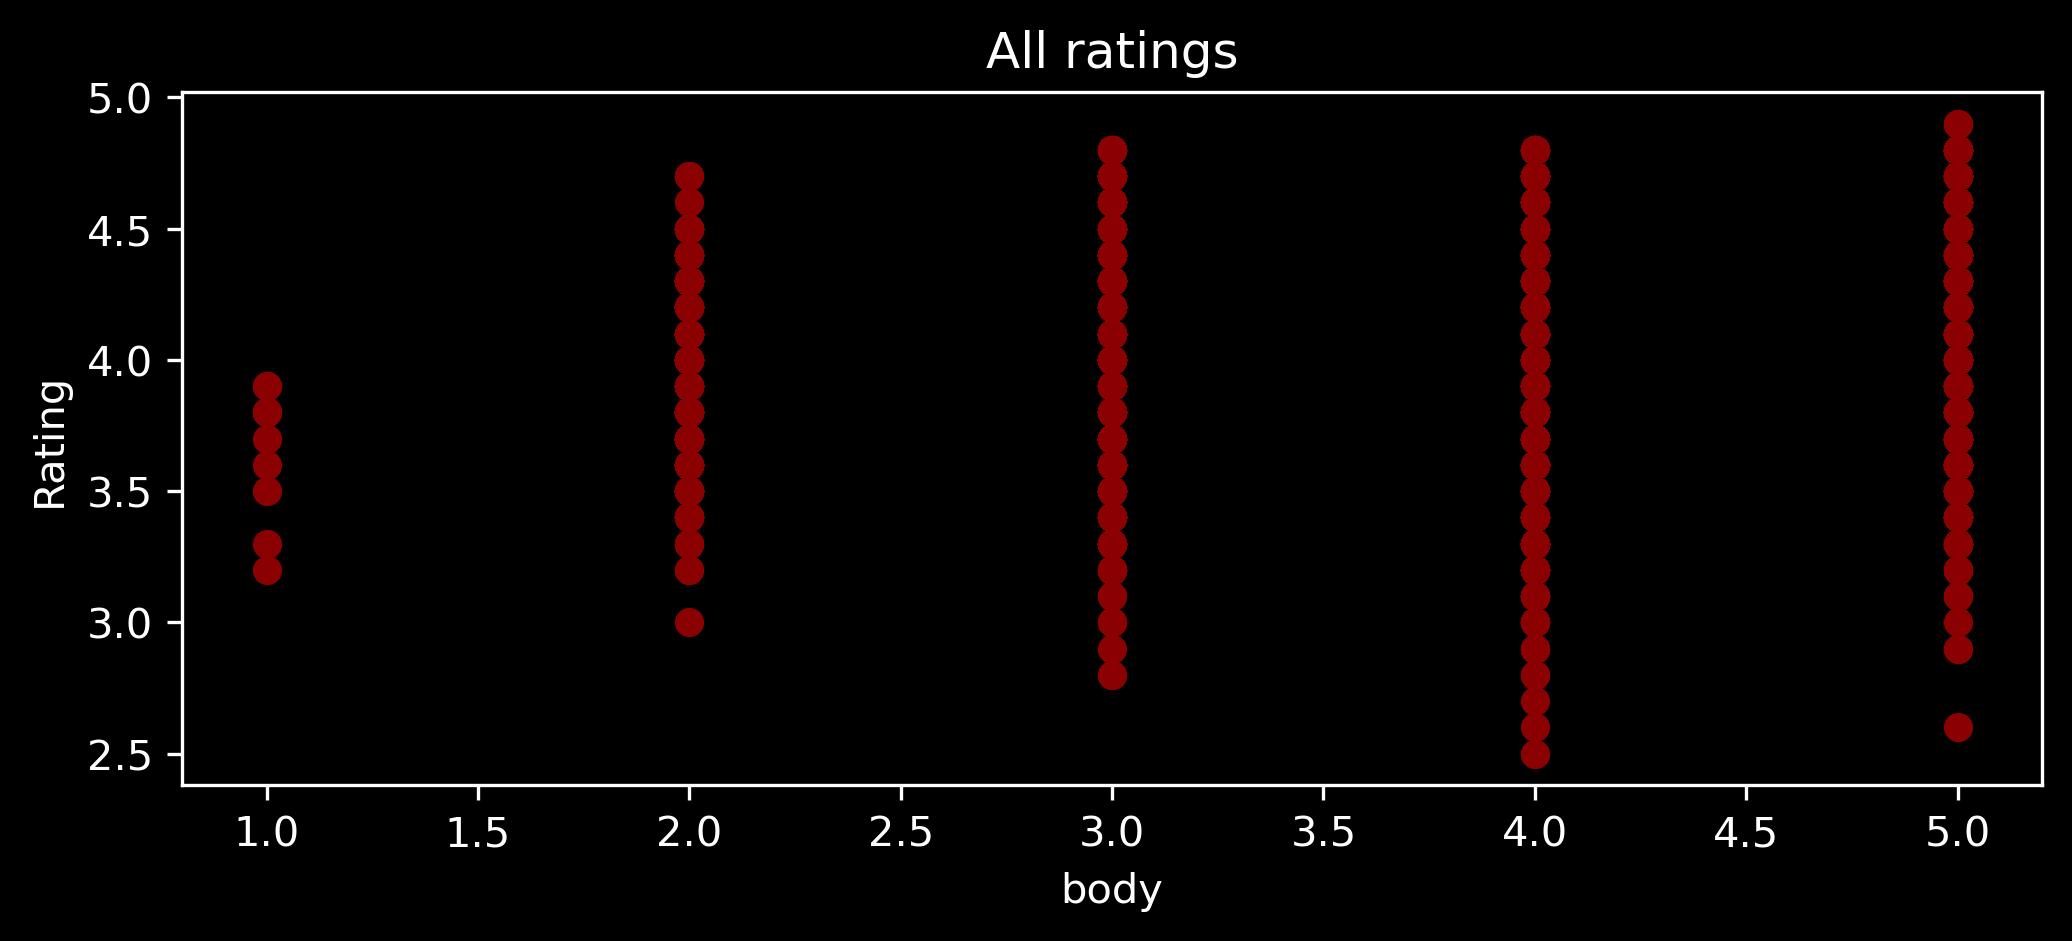

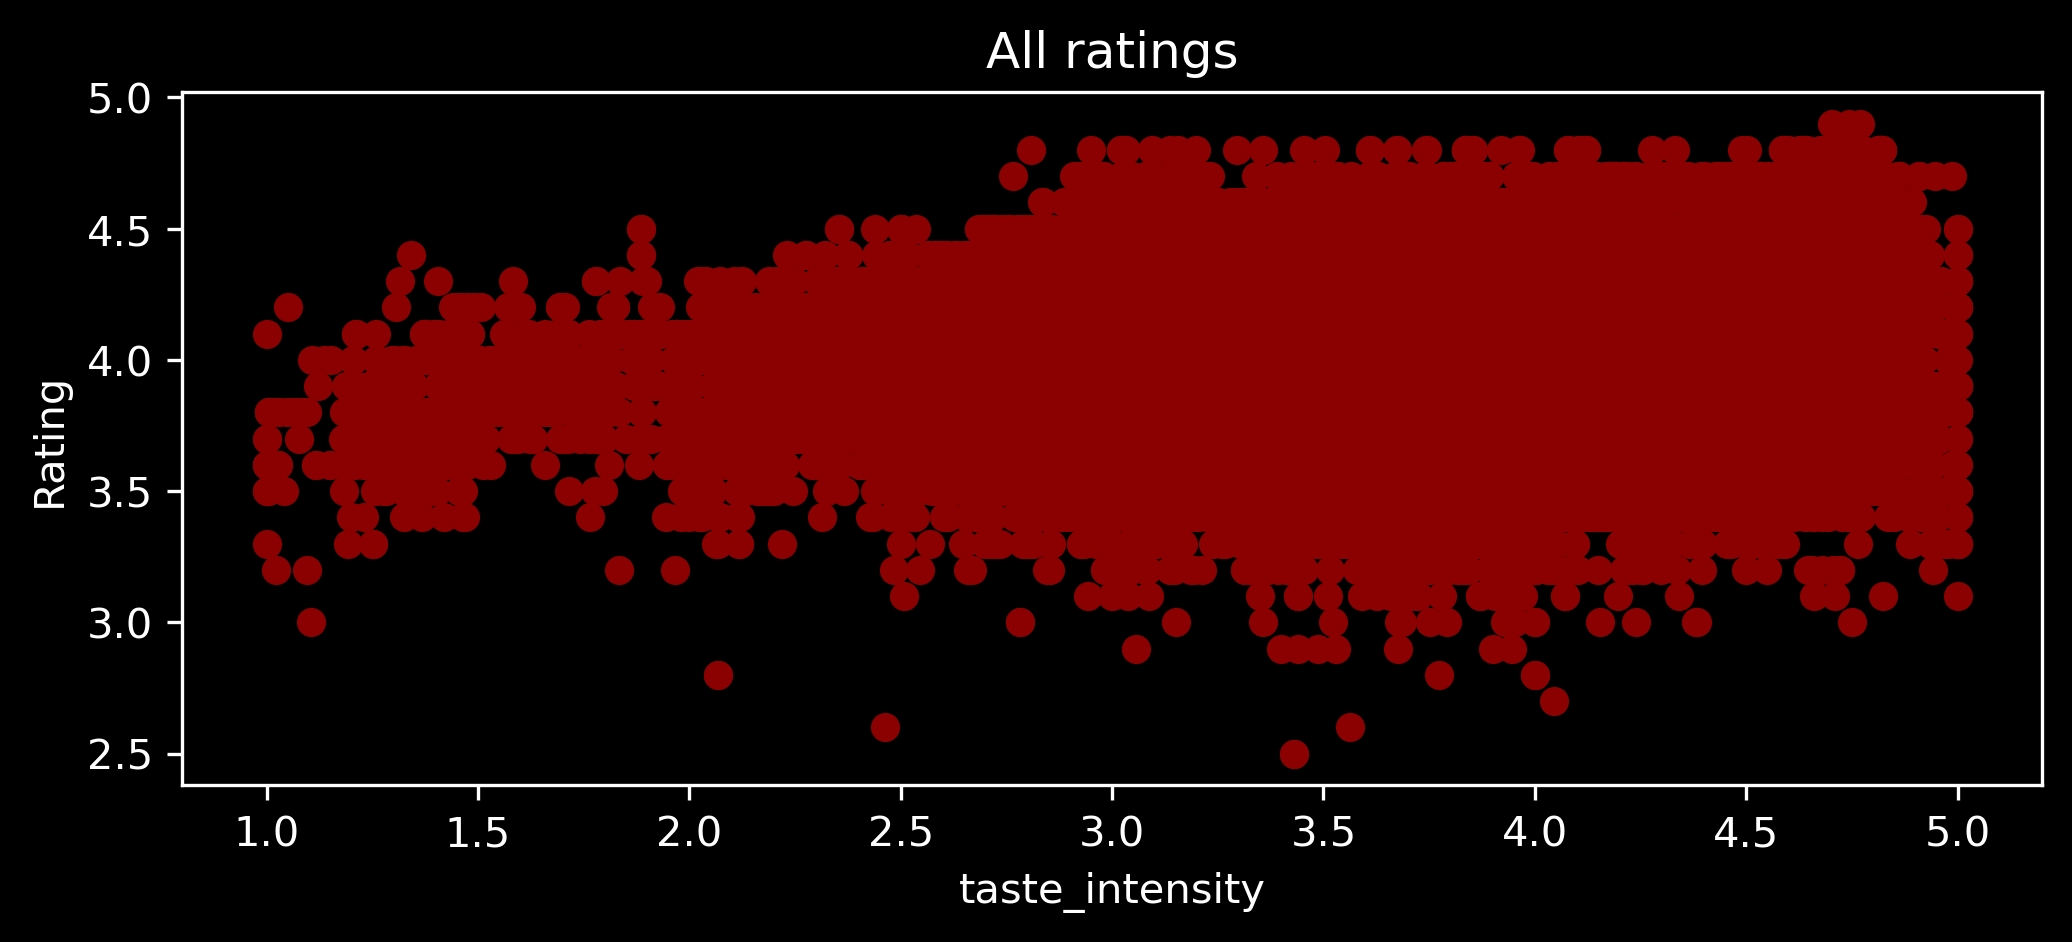

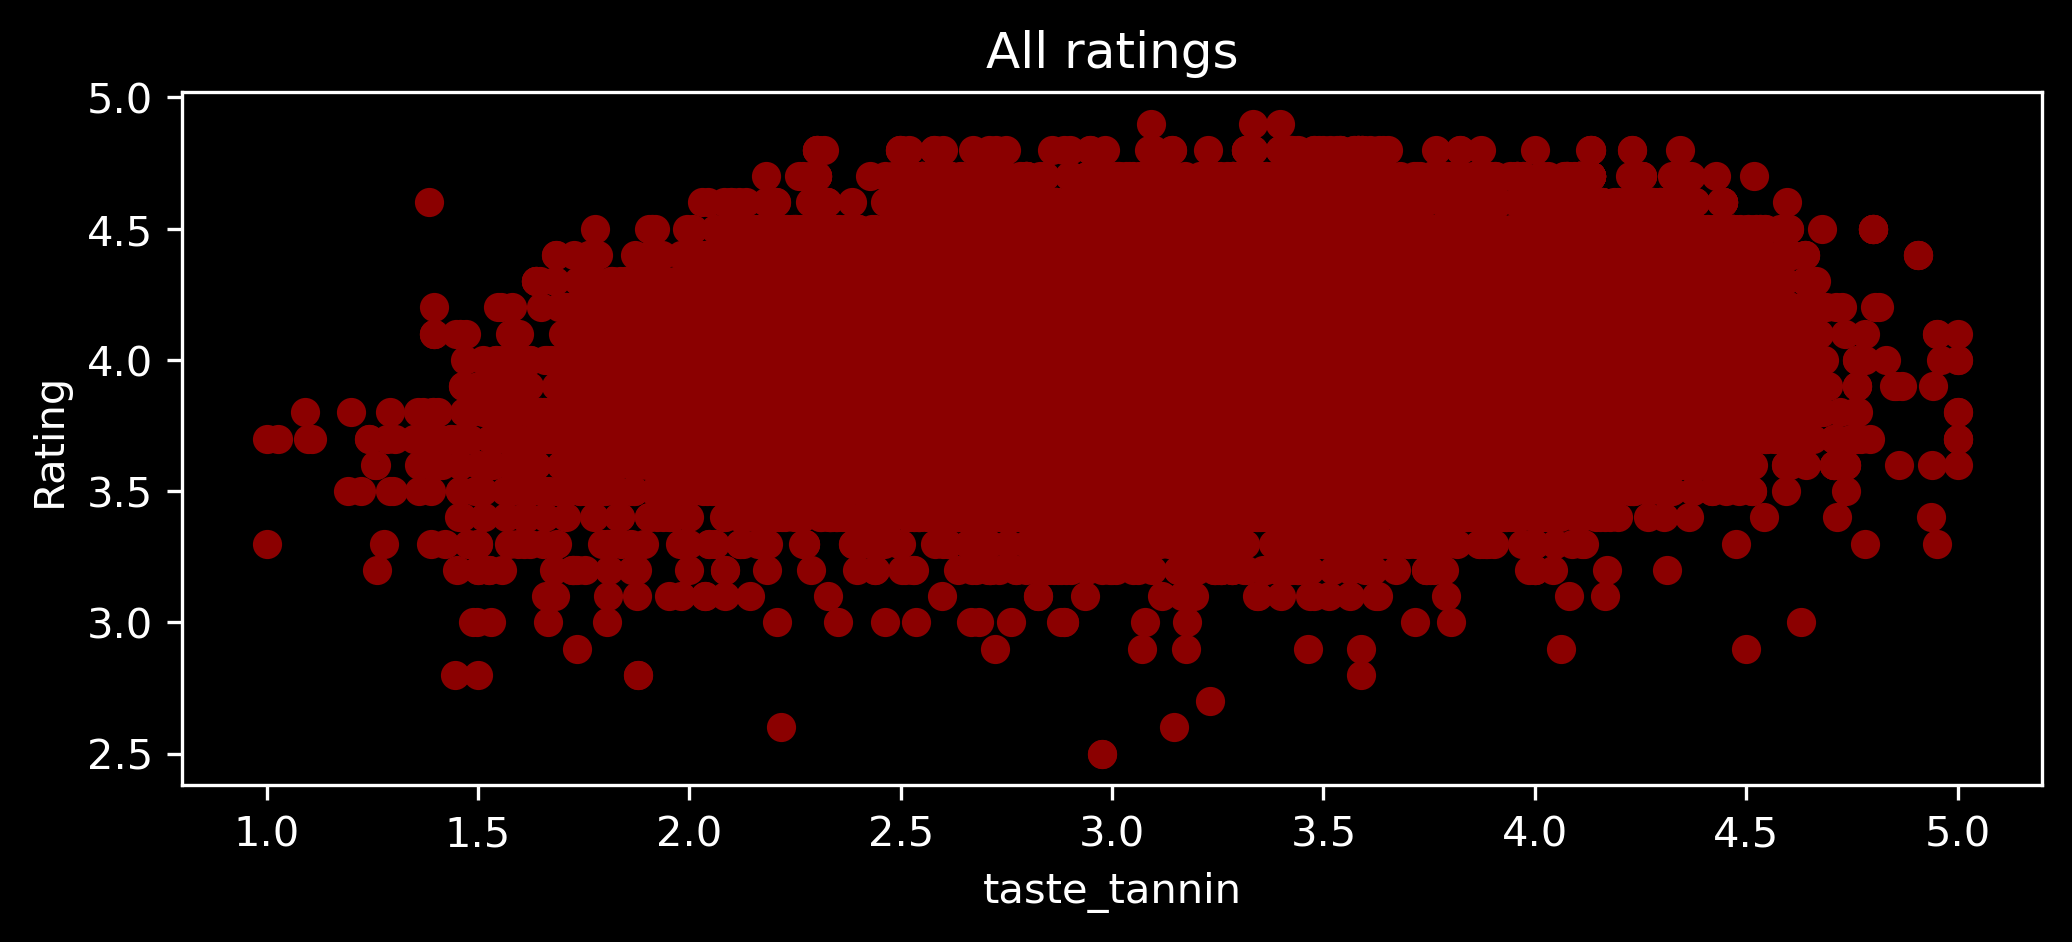

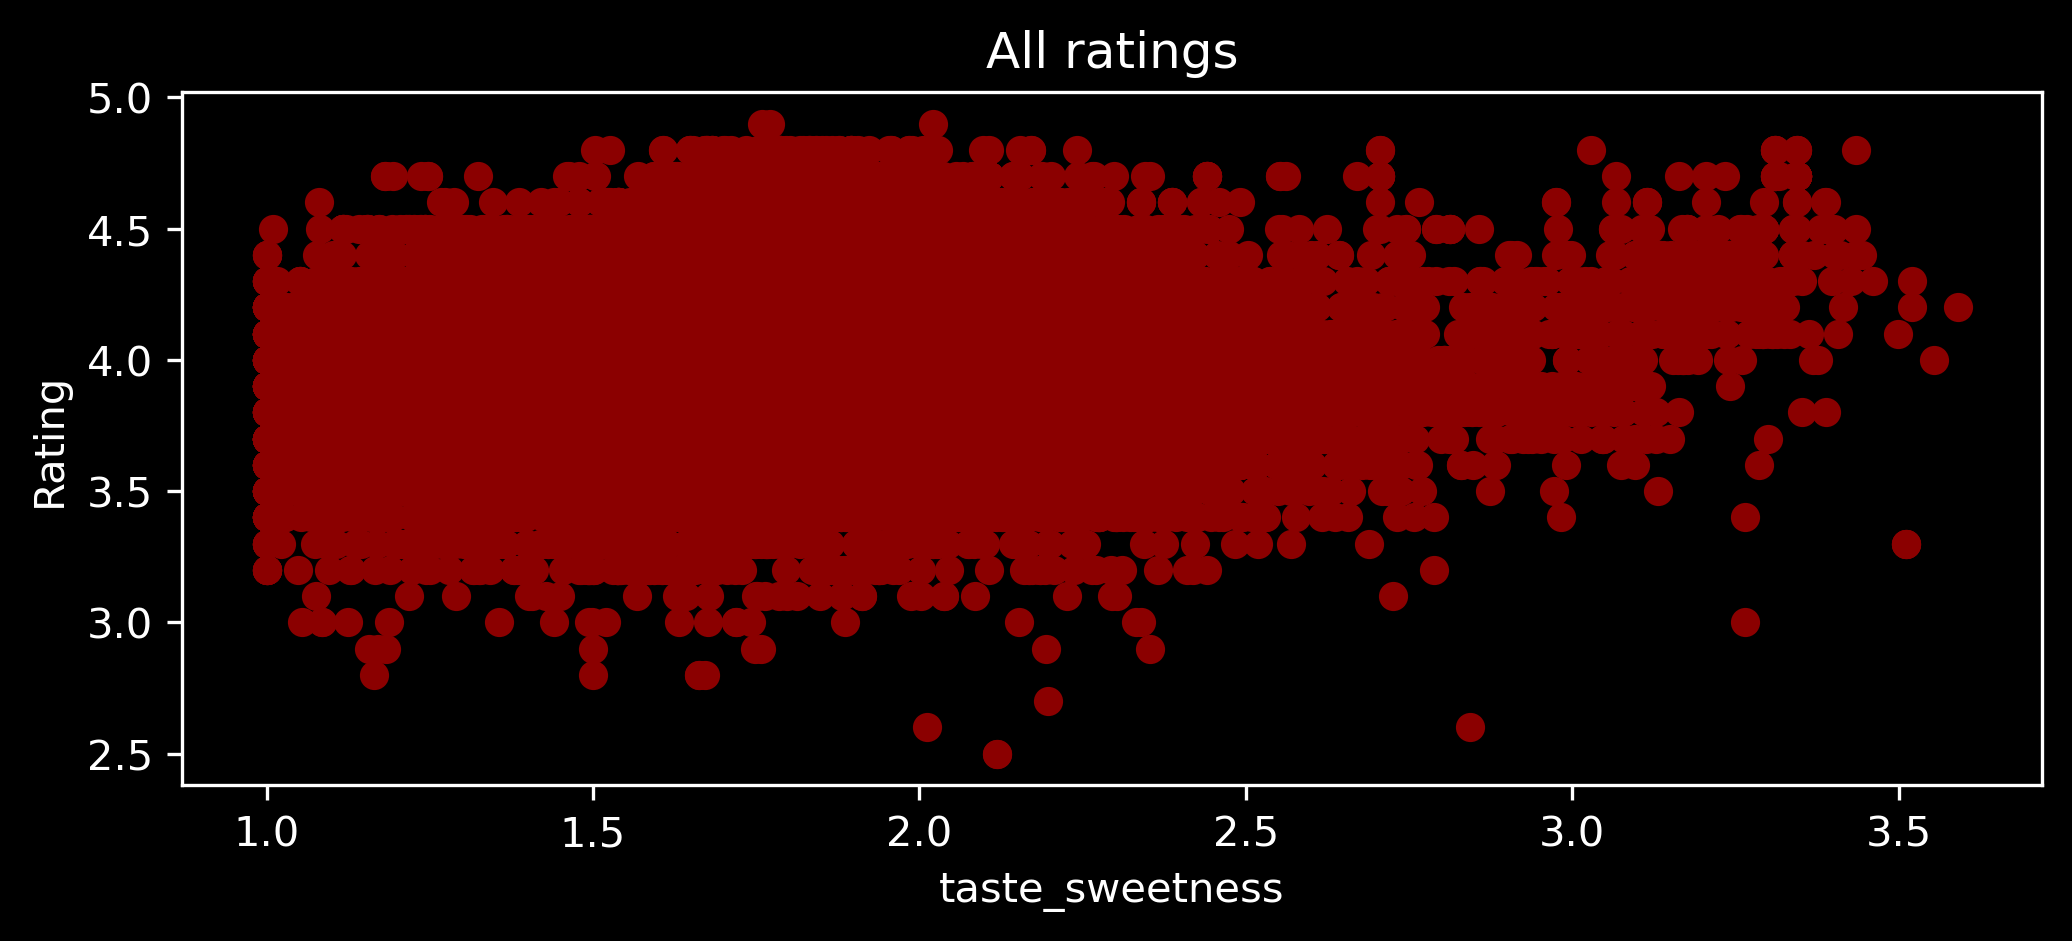

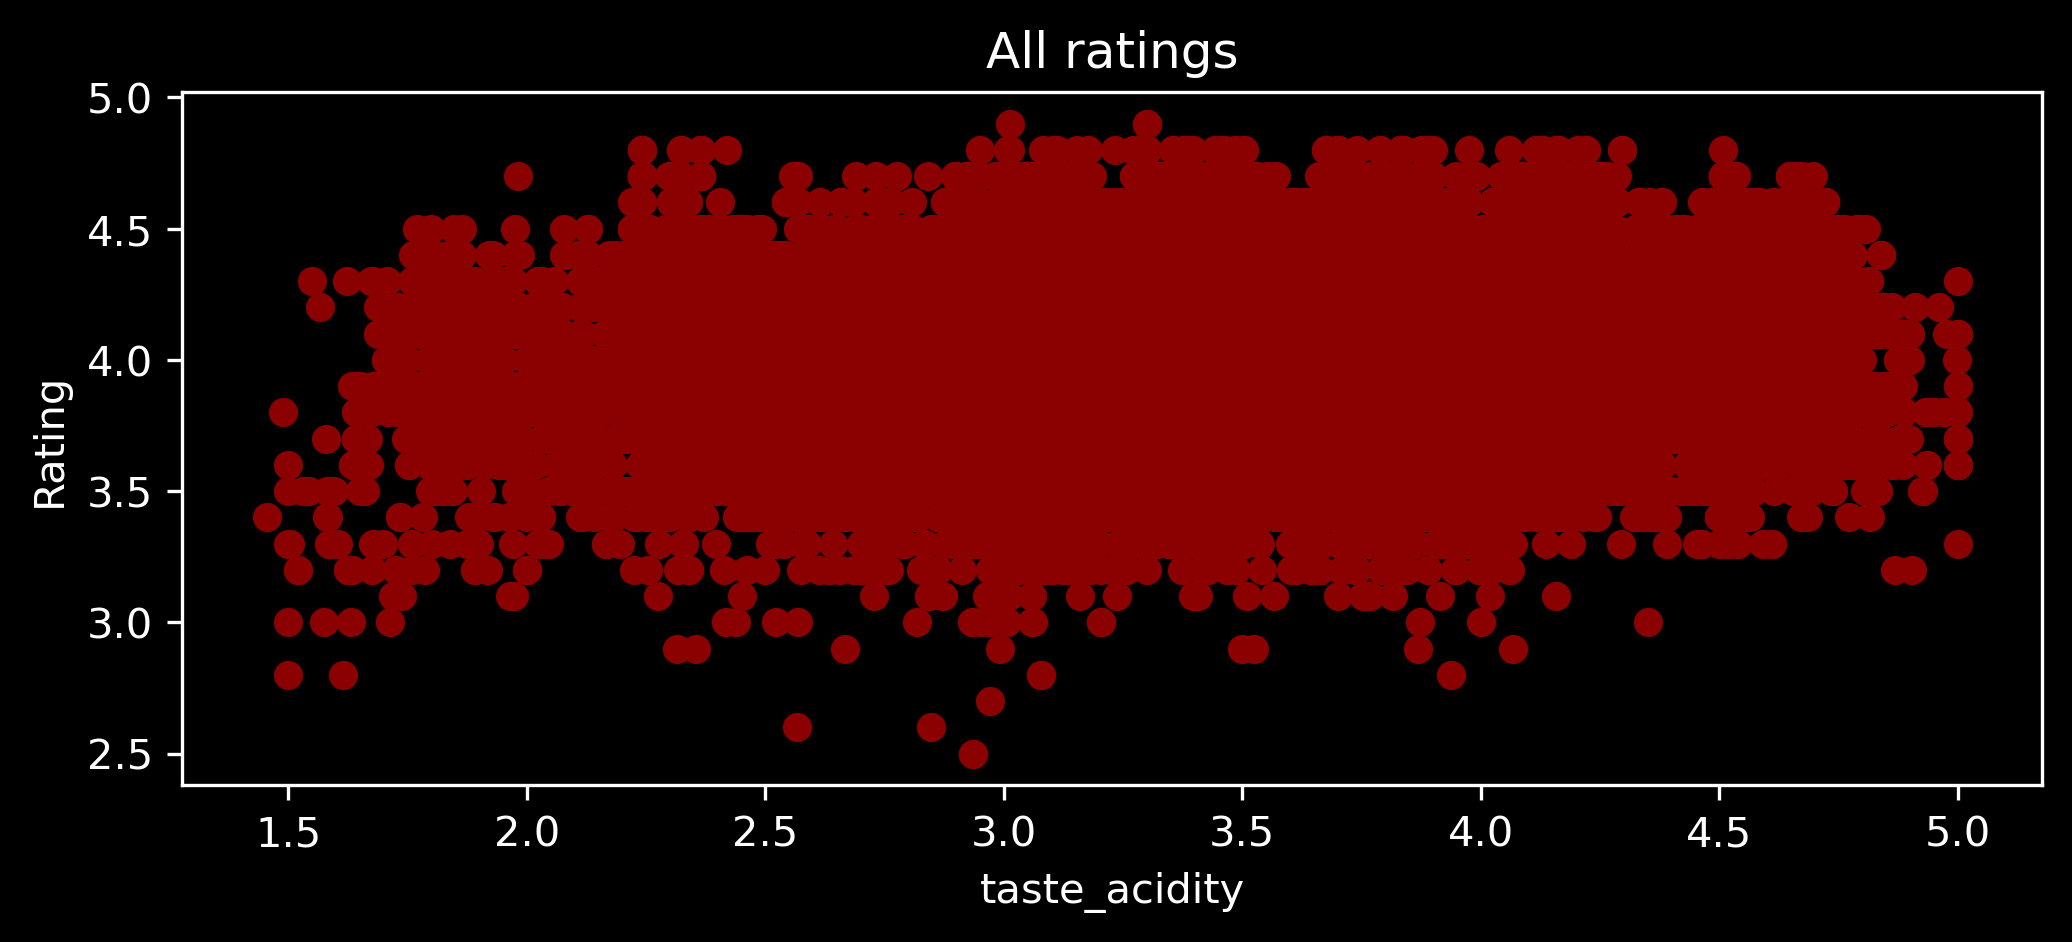

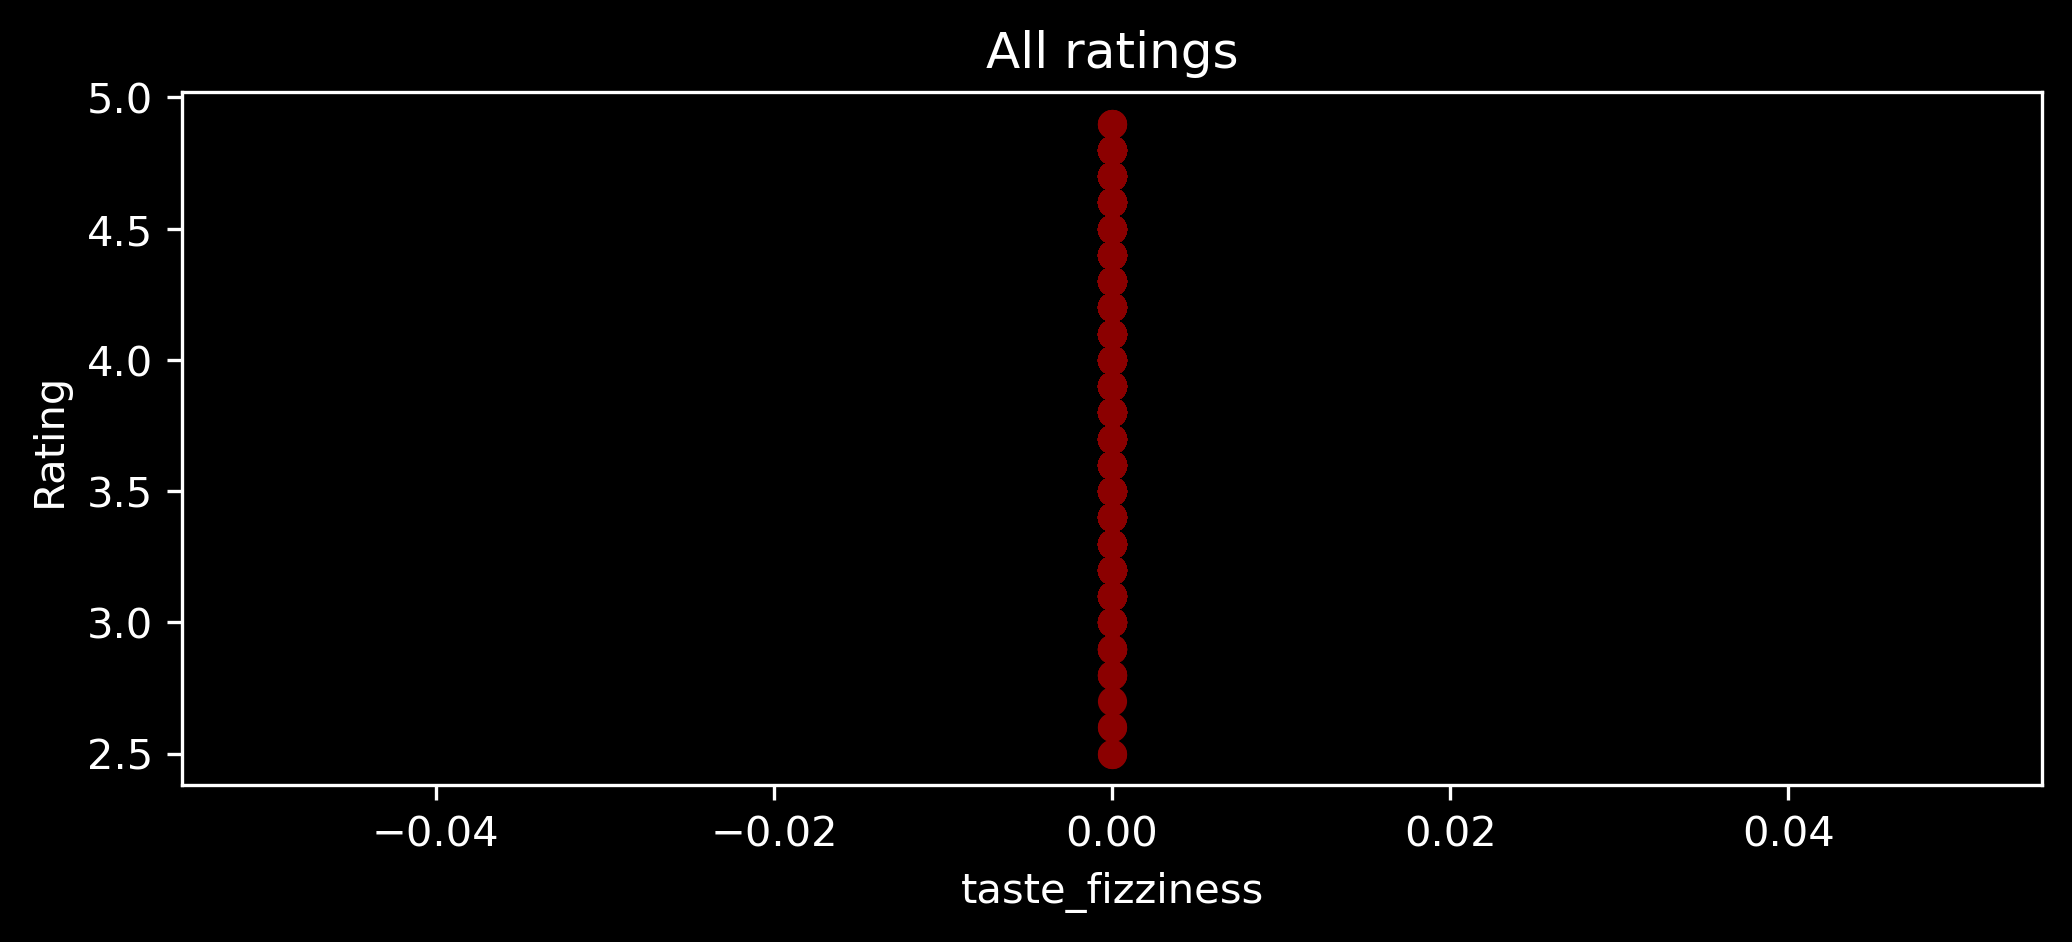

In [109]:
for col in X:
    plt.scatter(X[col], y, c = "darkred")
    plt.title('All ratings')
    plt.xlabel(f'{col}')
    plt.ylabel('Rating')
    plt.show()

The only real linear correlation is between the `avg_rating_wine` and `avg_rating_wine_year`.

***

# EDA Summary <a id="b4"></a>

**Target variable:**
`avg_rating_wine_year`
- The overall wine rating of the specific wine ranges from 0 to 4.9, with a mean of 3.98 and a median of 4.1.
- The distribution of ratings is skewed to the left, with a long tail on the left side and a high peak at 0. This peak is due to the fact that there are either zero or very few ratings for these specific wines.
- When considering scores with over 50 ratings, the range is only between 2.5 to 4.9, with a mean and median of 4.1. The distribution is still slightly skewed to the left.

**Other Rating Data:**
- `avg_rating_wine`: The distribution of ratings is skewed to the left, with a long tail on the left side and a peak at 0. This peak is due to the fact that the number of ratings for these wines is zero or very low.
- `num_rating_wine` & `num_rating_wine_year`: The number of wine ratings follow an exponential distribution, with a large number of wines having only a few ratings and a small number of wines having many ratings. This creates a long tail to the right.

**Metadata:**
- `wine_name`: There are over 15k different wine names in this dataset.
- `winery`: In total, there are over 9k different wineries in this dataset.
- `year`: The distribution of the years follows an almost exponential pattern, with a higher number of wines from recent years and a lower number of older wines (long tail on the left).

**Geographic Data:**
- `region`: There are 1421 different regions.
- `country`: There are 31 countries in the dataset where more red wines are from France and Italy.

**Monetary Data:**
- `price`: The pricing of wines follows an exponential distribution, with a majority of wines priced between 0 and around 50 pounds, and a small number of wines priced higher with the maximum at 2490 pounds.
- `volume`: 94% of the bottles have a volume of 750ml.
- `currency`: All prices are in the currency GBP (pounds).

**Taste Data:**
- `body`: The body range of the wines in this dataset is between 1 and 5, with a median score of 4. The average body score is slightly lower at 3.8.
- `taste_intensity`: The distribution of taste intensity has two big peaks. The higher peak is around 4.2 and the smaller peak is aound 3. Furthermore, there is a small peak around 4.6.
- `taste_tannin`: The distribution shows three peaks, with the largest at around 4.2, the second at around 3.4, and a small peak at 3.1.
- `taste_sweetness`: The distribution is slightly skewed to the right, with a peak between 1.5 and 1.75 and a longer tail on the right. There is also a high peak on the left at sweetness level 1.
- `taste_acidity`: The distribution shows four peaks, with the largest at around 4.2, the second and thrid at around 3.8 and 3.4, and a small peak at 3.1.
- `taste_fizziness`: The fizziness of all red wines in this dataset is 0.

- The **average taste profile** is low in sweetness (less than 2) and high in acidity, body, intensity and tannin. 


**Attribute Data:**
- `food`: Most red wines in this dataset go well with beef, poultry and game.

**Correlations:**
- The taste data `body`, `taste_intensity` and `taste tannin` are strongly positive correlated. 
- The `num_rating_wine_year` and `num_rating_wine` are positive correlated, since the first one is part of the second one.
- Other positive correlations are: `taste_sweetness` and `avg_rating_wine`, `taste_tannin` and `num_rating_wine`
- Other negative correlations are:`num_ratin_wine` and `year`, `price` and `year`, `taste_intensity` and `taste_acidity`, `body` and `taste_acidity`

***

# Conclusion <a id="b5"></a>

The EDA provides an initial overview of the data stored in each column of the dataset. In particular, the target column displays variations in scores based on the number of reviews. 

**Next steps:**

The next steps involve conducting an exploratory data analysis (EDA) on specific questions related to the target and other columns. Additionally, the data needs to be preprocessed for modelling purposes. Finally, a first model, such as linear regression, should be developed.